In [1]:
import os
import re
from collections import Counter

import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import umap
from sklearn.preprocessing import StandardScaler

/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica"

In [141]:
# d = pd.read_csv(
#     '/Volumes/timmy/ding/HTAN/imaging/data/object_results.csv',
#     sep=',')

# d

In [300]:
d = pd.read_csv('/Volumes/timmy/ding/HTAN/imaging/data/summary_export.csv',
               sep=',')
d = d.set_index('Image Tag')
# d['tumor Area (mm²)']
d.sort_values('tumor Area (mm²)')

Image Location  \
Image Tag                                                                             
HT055P1_PA_A1_A4_ROI_01.ome.tiff  D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   
HT056P1_PA_A1_A4_ROI_02.ome.tiff  D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   
HT061P1_PC_A1_A4_ROI_03.ome.tiff  D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   
HT064B1_H1_A1_A4_ROI_02.ome.tiff  D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   
HT055P1_PA_A1_A4_ROI_03.ome.tiff  D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   
...                                                                             ...   
HT068B1_H2_ROI_01.ome.tiff        D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   
HT061P1_PB_A1_A4_ROI_03.ome.tiff  D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   
HT061P1_PA_A1_A4_ROI_03.ome.tiff  D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   
HT081B1_H5_A1_ROI_01.ome.tiff     D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   
HT060P1_PA_A1_A4_ROI_01.ome.tiff  D:\erik\data\HTAN\ome_tiff_individual_32bit\HT...   

                                           Algorithm Name  \
Image Tag                                                   
HT055P1_PA_A1_A4_ROI_01.ome.tiff  htan_segmentation_b1_v1   
HT056P1_PA_A1_A4_ROI_02.ome.tiff  htan_segmentation_b1_v1   
HT061P1_PC_A1_A4_ROI_03.ome.tiff  htan_segmentation_b1_v1   
HT064B1_H1_A1_A4_ROI_02.ome.tiff  htan_segmentation_b1_v1   
HT055P1_PA_A1_A4_ROI_03.ome.tiff  htan_segmentation_b1_v1   
...                                                   ...   
HT068B1_H2_ROI_01.ome.tiff        htan_segmentation_b1_v1   
HT061P1_PB_A1_A4_ROI_03.ome.tiff  htan_segmentation_b1_v1   
HT061P1_PA_A1_A4_ROI_03.ome.tiff  htan_segmentation_b1_v1   
HT081B1_H5_A1_ROI_01.ome.tiff     htan_segmentation_b1_v1   
HT060P1_PA_A1_A4_ROI_01.ome.tiff  htan_segmentation_b1_v1   

                                            Start Time Analysis Region  \
Image Tag                                                                
HT055P1_PA_A1_A4_ROI_01.ome.tiff  7/13/2020 9:54:01 PM    entire image   
HT056P1_PA_A1_A4_ROI_02.ome.tiff  7/13/2020 9:54:47 PM    entire image   
HT061P1_PC_A1_A4_ROI_03.ome.tiff  7/13/2020 9:43:49 PM    entire image   
HT064B1_H1_A1_A4_ROI_02.ome.tiff  7/13/2020 9:30:43 PM    entire image   
HT055P1_PA_A1_A4_ROI_03.ome.tiff  7/13/2020 9:53:15 PM    entire image   
...                                                ...             ...   
HT068B1_H2_ROI_01.ome.tiff        7/13/2020 9:24:05 PM    entire image   
HT061P1_PB_A1_A4_ROI_03.ome.tiff  7/13/2020 9:38:26 PM    entire image   
HT061P1_PA_A1_A4_ROI_03.ome.tiff  7/13/2020 9:41:38 PM    entire image   
HT081B1_H5_A1_ROI_01.ome.tiff     7/13/2020 9:27:12 PM    entire image   
HT060P1_PA_A1_A4_ROI_01.ome.tiff  7/13/2020 9:49:59 PM    entire image   

                                  Classified Area (mm²)  tumor Area (mm²)  \
Image Tag                                                                   
HT055P1_PA_A1_A4_ROI_01.ome.tiff                0.13532           0.00000   
HT056P1_PA_A1_A4_ROI_02.ome.tiff                0.36125           0.00000   
HT061P1_PC_A1_A4_ROI_03.ome.tiff                0.10823           0.00000   
HT064B1_H1_A1_A4_ROI_02.ome.tiff                0.10304           0.00000   
HT055P1_PA_A1_A4_ROI_03.ome.tiff                0.20658           0.00023   
...                                                 ...               ...   
HT068B1_H2_ROI_01.ome.tiff                      0.48000           0.18516   
HT061P1_PB_A1_A4_ROI_03.ome.tiff                0.39606           0.20446   
HT061P1_PA_A1_A4_ROI_03.ome.tiff                0.49678           0.23339   
HT081B1_H5_A1_ROI_01.ome.tiff                   0.52222           0.23716   
HT060P1_PA_A1_A4_ROI_01.ome.tiff                0.80304           0.25014   

                                  stroma Area (mm²)  Total Cells  \
Image Tag                                                          
HT055P1_PA_A1_A4_ROI_01.ome.tiff          

In [140]:
list(d.columns)

['Image Location',
 'Analysis Region',
 'Analysis Inputs',
 'Object Id',
 'Distance (μm)',
 'XMin',
 'XMax',
 'YMin',
 'YMax',
 '141Pr-SMA(Pr141Di) Positive',
 '141Pr-SMA(Pr141Di) Positive Nucleus',
 '141Pr-SMA(Pr141Di) Nucleus Intensity',
 '141Pr-SMA(Pr141Di) Positive Cytoplasm',
 '141Pr-SMA(Pr141Di) Cytoplasm Intensity',
 '143Nd-Vimentin(Nd143Di) Positive',
 '143Nd-Vimentin(Nd143Di) Positive Nucleus',
 '143Nd-Vimentin(Nd143Di) Nucleus Intensity',
 '143Nd-Vimentin(Nd143Di) Positive Cytoplasm',
 '143Nd-Vimentin(Nd143Di) Cytoplasm Intensity',
 '147Sm-CD163(Sm147Di) Positive',
 '147Sm-CD163(Sm147Di) Positive Nucleus',
 '147Sm-CD163(Sm147Di) Nucleus Intensity',
 '147Sm-CD163(Sm147Di) Positive Cytoplasm',
 '147Sm-CD163(Sm147Di) Cytoplasm Intensity',
 '148Nd-PanK(Nd148Di) Positive',
 '148Nd-PanK(Nd148Di) Positive Nucleus',
 '148Nd-PanK(Nd148Di) Nucleus Intensity',
 '148Nd-PanK(Nd148Di) Positive Cytoplasm',
 '148Nd-PanK(Nd148Di) Cytoplasm Intensity',
 '149Sm-CD11b(Sm149Di) Positive',
 '149Sm

## preprocessing

In [3]:
cell_df = pd.read_csv(
    '/Volumes/timmy/ding/HTAN/imaging/data/Halo archive 2020-07-01 16-23 - v3.1.1076/obj_output_v3.csv',
    sep=',')

halo_df = cell_df.copy()
halo_df

Image Location Analysis Region  \
0       C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
1       C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
2       C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
3       C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
4       C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
...                                                   ...             ...   
174848  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
174849  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
174850  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
174851  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
174852  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   

                                          Analysis Inputs  Object Id  XMin  \
0       Class List:;Classifier:;Classifier Output Type...          0     8   
1       Class List:;Classifier:;Classifier Output Type...          1    42   
2       Class List:;Classifier:;Classifier Output Type...          2    65   
3       Class List:;Classifier:;Classifier Output Type...          3    73   
4       Class List:;Classifier:;Classifier Output Type...          4   109   
...                                                   ...        ...   ...   
174848  Class List:;Classifier:;Classifier Output Type...       4016   259   
174849  Class List:;Classifier:;Classifier Output Type...       4017    16   
174850  Class List:;Classifier:;Classifier Output Type...       4018   194   
174851  Class List:;Classifier:;Classifier Output Type...       4019   227   
174852  Class List:;Classifier:;Classifier Output Type...       4020   250   

        XMax  YMin  YMax  141Pr-SMA(Pr141Di) Positive  \
0         17    -2    10                            0   
1         49    -2     4                            0   
2         72    -2     4                            0   
3         81    -2     4                            0   
4        115    -2     4                            0   
...      ...   ...   ...                          ...   
174848   265   394   397                            0   
174849    27   394   404                            0   
174850   203   394   404                            0   
174851   236   396   401                            0   
174852   256   396   403                            0   

        141Pr-SMA(Pr141Di) Positive Nucleus  ...  190BCKG(BCKG190Di) Positive  \
0                                         0  ...                            0   
1                                         0  ...                            0   
2                                         0  ...                            0   
3                                         0  ...                            0   
4                                         0  ...                            0   
...                                     ...  ...                          ...   
174848                                    0  ...                            0   
174849                                    0  ...                            0   
174850                                    0  ...                            0   
174851                                    0  ...                            0   
174852                                    0  ...                            0   

        190BCKG(BCKG190Di) Positive Nucleus  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
174848                                    0   
174849                                    0   
174850                                    0   
174851                                    0   
174852

In [4]:
list(halo_df.columns)

['Image Location',
 'Analysis Region',
 'Analysis Inputs',
 'Object Id',
 'XMin',
 'XMax',
 'YMin',
 'YMax',
 '141Pr-SMA(Pr141Di) Positive',
 '141Pr-SMA(Pr141Di) Positive Nucleus',
 '141Pr-SMA(Pr141Di) Nucleus Intensity',
 '141Pr-SMA(Pr141Di) Positive Cytoplasm',
 '141Pr-SMA(Pr141Di) Cytoplasm Intensity',
 '143Nd-Vimentin(Nd143Di) Positive',
 '143Nd-Vimentin(Nd143Di) Positive Nucleus',
 '143Nd-Vimentin(Nd143Di) Nucleus Intensity',
 '143Nd-Vimentin(Nd143Di) Positive Cytoplasm',
 '143Nd-Vimentin(Nd143Di) Cytoplasm Intensity',
 '147Sm-CD163(Sm147Di) Positive',
 '147Sm-CD163(Sm147Di) Positive Nucleus',
 '147Sm-CD163(Sm147Di) Nucleus Intensity',
 '147Sm-CD163(Sm147Di) Positive Cytoplasm',
 '147Sm-CD163(Sm147Di) Cytoplasm Intensity',
 '148Nd-PanKeratin(Nd148Di) Positive',
 '148Nd-PanKeratin(Nd148Di) Positive Nucleus',
 '148Nd-PanKeratin(Nd148Di) Nucleus Intensity',
 '148Nd-PanKeratin(Nd148Di) Positive Cytoplasm',
 '148Nd-PanKeratin(Nd148Di) Cytoplasm Intensity',
 '149Sm-CD11b(Sm149Di) Positi

In [5]:
set(halo_df['176YbHistoneH3(Yb176Di) Positive'])

{0, 1}

In [6]:
halo_df['image_id'] = [fp.split('\\')[-1].split('.')[0] for fp in halo_df['Image Location']]
halo_df['sample_id'] = ['_'.join(x.split('_')[:2]) for x in halo_df['image_id']]
halo_df['cell_id'] = [f'{s_id}_{c}' for s_id, c in zip(halo_df['image_id'], halo_df['Object Id'])]
halo_df['case_id'] = [x.split('_')[0] for x in halo_df['sample_id']]
halo_df['roi'] = [int(x.split('_')[-1]) for x in halo_df['image_id']]
halo_df = halo_df[halo_df['case_id']!='HT069B1']
halo_df = halo_df[halo_df['176YbHistoneH3(Yb176Di) Positive']==1]
halo_df

Image Location Analysis Region  \
1       C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
11      C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
23      C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
25      C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
27      C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
...                                                   ...             ...   
166793  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
166794  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
166804  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
166809  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   
166811  C:\Users\halo\Documents\halo_imaging\data\HTAN...    entire image   

                                          Analysis Inputs  Object Id  XMin  \
1       Class List:;Classifier:;Classifier Output Type...          1    42   
11      Class List:;Classifier:;Classifier Output Type...         11   222   
23      Class List:;Classifier:;Classifier Output Type...         23    90   
25      Class List:;Classifier:;Classifier Output Type...         25   300   
27      Class List:;Classifier:;Classifier Output Type...         27   306   
...                                                   ...        ...   ...   
166793  Class List:;Classifier:;Classifier Output Type...        926    67   
166794  Class List:;Classifier:;Classifier Output Type...        927   221   
166804  Class List:;Classifier:;Classifier Output Type...        937   183   
166809  Class List:;Classifier:;Classifier Output Type...        942   101   
166811  Class List:;Classifier:;Classifier Output Type...        944   109   

        XMax  YMin  YMax  141Pr-SMA(Pr141Di) Positive  \
1         49    -2     4                            0   
11       231    -2     4                            0   
23       105    -1     8                            0   
25       305     0     6                            0   
27       314     0     7                            0   
...      ...   ...   ...                          ...   
166793    80   372   382                            0   
166794   237   373   382                            0   
166804   198   374   382                            0   
166809   108   376   382                            0   
166811   115   376   382                            0   

        141Pr-SMA(Pr141Di) Positive Nucleus  ...  Cell Area (µm²)  \
1                                         0  ...            35.75   
11                                        0  ...            51.25   
23                                        0  ...           109.00   
25                                        0  ...            28.50   
27                                        0  ...            44.00   
...                                     ...  ...              ...   
166793                                    0  ...            82.25   
166794                                    0  ...           124.25   
166804                                    0  ...            96.50   
166809                                    0  ...            42.25   
166811                                    0  ...            32.75   

        Cytoplasm Area (µm²)  Nucleus Area (µm²)  Nucleus Perimeter (µm)  \
1                      28.50                7.25                    10.0   
11                     37.25               14.00                    15.0   
23                     65.50               43.50                    33.0   
25                     21.25                7.25                    10.0   
27                     30.75               13.25                    15.5   
...                      ...                 ...                     ...   
166793                 32.00               50.25                    34.5   
166794                 56.50               67.75           

In [7]:
halo_df.columns[-20:]

Index(['193Ir-DNA(Ir193Di) Positive', '193Ir-DNA(Ir193Di) Positive Nucleus',
       '193Ir-DNA(Ir193Di) Nucleus Intensity',
       '193Ir-DNA(Ir193Di) Positive Cytoplasm',
       '193Ir-DNA(Ir193Di) Cytoplasm Intensity', '190BCKG(BCKG190Di) Positive',
       '190BCKG(BCKG190Di) Positive Nucleus',
       '190BCKG(BCKG190Di) Nucleus Intensity',
       '190BCKG(BCKG190Di) Positive Cytoplasm',
       '190BCKG(BCKG190Di) Cytoplasm Intensity', 'Cell Area (µm²)',
       'Cytoplasm Area (µm²)', 'Nucleus Area (µm²)', 'Nucleus Perimeter (µm)',
       'Nucleus Roundness', 'image_id', 'sample_id', 'cell_id', 'case_id',
       'roi'],
      dtype='object')

In [8]:
cols = ['cell_id', 'image_id', 'sample_id', 'case_id', 'roi']
cols += [c for c in halo_df.columns if 'Intensity' in c]
cols += [c for c in halo_df.columns if 'Area' in c]
halo_df = halo_df[cols]
halo_df

cell_id                   image_id  \
1           HT055P1_PA_A1_A4_ROI_01_1    HT055P1_PA_A1_A4_ROI_01   
11         HT055P1_PA_A1_A4_ROI_01_11    HT055P1_PA_A1_A4_ROI_01   
23         HT055P1_PA_A1_A4_ROI_01_23    HT055P1_PA_A1_A4_ROI_01   
25         HT055P1_PA_A1_A4_ROI_01_25    HT055P1_PA_A1_A4_ROI_01   
27         HT055P1_PA_A1_A4_ROI_01_27    HT055P1_PA_A1_A4_ROI_01   
...                               ...                        ...   
166793  human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03   
166794  human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03   
166804  human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03   
166809  human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03   
166811  human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03   

           sample_id  case_id  roi  141Pr-SMA(Pr141Di) Nucleus Intensity  \
1         HT055P1_PA  HT055P1    1                              6.403570   
11        HT055P1_PA  HT055P1    1                             14.909850   
23        HT055P1_PA  HT055P1    1                             21.500220   
25        HT055P1_PA  HT055P1    1                             71.632680   
27        HT055P1_PA  HT055P1    1                             52.072690   
...              ...      ...  ...                                   ...   
166793  human_spleen    human    3                              1.119782   
166794  human_spleen    human    3                              1.366629   
166804  human_spleen    human    3                             13.901140   
166809  human_spleen    human    3                             26.687220   
166811  human_spleen    human    3                             18.416410   

        141Pr-SMA(Pr141Di) Cytoplasm Intensity  \
1                                     4.543435   
11                                    6.987315   
23                                   19.073460   
25                                   71.746290   
27                                   75.179260   
...                                        ...   
166793                                1.096080   
166794                                1.548098   
166804                               11.870430   
166809                               20.446090   
166811                               28.638010   

        143Nd-Vimentin(Nd143Di) Nucleus Intensity  \
1                                       16.583200   
11                                       1.155844   
23                                       4.217257   
25                                       4.689572   
27                                       4.495397   
...                                           ...   
166793                                   2.408358   
166794                                   1.645077   
166804                                   2.165029   
166809                                   1.876014   
166811                                   3.426915   

        143Nd-Vimentin(Nd143Di) Cytoplasm Intensity  \
1                                          4.391902   
11                                         0.387833   
23                                         4.564402   
25                                         3.930701   
27                                         2.995556   
...                                             ...   
166793                                     3.049494   
166794                                     3.088500   
166804                                     0.770255   
166809                                     2.098816   
166811                                     1.293253   

        147Sm-CD163(Sm147Di) Nucleus Intensity  ...  \
1                                     0.665879  ...   
11                                    0.169790  ...   
23                                    0.179997  ...   
25                                    0.008621  ...   
27                                    0.173680  ...   
...                                        ...  ...   
166793          

In [9]:
halo_df

cell_id                   image_id  \
1           HT055P1_PA_A1_A4_ROI_01_1    HT055P1_PA_A1_A4_ROI_01   
11         HT055P1_PA_A1_A4_ROI_01_11    HT055P1_PA_A1_A4_ROI_01   
23         HT055P1_PA_A1_A4_ROI_01_23    HT055P1_PA_A1_A4_ROI_01   
25         HT055P1_PA_A1_A4_ROI_01_25    HT055P1_PA_A1_A4_ROI_01   
27         HT055P1_PA_A1_A4_ROI_01_27    HT055P1_PA_A1_A4_ROI_01   
...                               ...                        ...   
166793  human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03   
166794  human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03   
166804  human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03   
166809  human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03   
166811  human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03   

           sample_id  case_id  roi  141Pr-SMA(Pr141Di) Nucleus Intensity  \
1         HT055P1_PA  HT055P1    1                              6.403570   
11        HT055P1_PA  HT055P1    1                             14.909850   
23        HT055P1_PA  HT055P1    1                             21.500220   
25        HT055P1_PA  HT055P1    1                             71.632680   
27        HT055P1_PA  HT055P1    1                             52.072690   
...              ...      ...  ...                                   ...   
166793  human_spleen    human    3                              1.119782   
166794  human_spleen    human    3                              1.366629   
166804  human_spleen    human    3                             13.901140   
166809  human_spleen    human    3                             26.687220   
166811  human_spleen    human    3                             18.416410   

        141Pr-SMA(Pr141Di) Cytoplasm Intensity  \
1                                     4.543435   
11                                    6.987315   
23                                   19.073460   
25                                   71.746290   
27                                   75.179260   
...                                        ...   
166793                                1.096080   
166794                                1.548098   
166804                               11.870430   
166809                               20.446090   
166811                               28.638010   

        143Nd-Vimentin(Nd143Di) Nucleus Intensity  \
1                                       16.583200   
11                                       1.155844   
23                                       4.217257   
25                                       4.689572   
27                                       4.495397   
...                                           ...   
166793                                   2.408358   
166794                                   1.645077   
166804                                   2.165029   
166809                                   1.876014   
166811                                   3.426915   

        143Nd-Vimentin(Nd143Di) Cytoplasm Intensity  \
1                                          4.391902   
11                                         0.387833   
23                                         4.564402   
25                                         3.930701   
27                                         2.995556   
...                                             ...   
166793                                     3.049494   
166794                                     3.088500   
166804                                     0.770255   
166809                                     2.098816   
166811                                     1.293253   

        147Sm-CD163(Sm147Di) Nucleus Intensity  ...  \
1                                     0.665879  ...   
11                                    0.169790  ...   
23                                    0.179997  ...   
25                                    0.008621  ...   
27                                    0.173680  ...   
...                                        ...  ...   
166793          

In [10]:
def rename_column(c):
    if 'Intensity' in c:
        if '-DNA(' in c: return re.sub(r'^(.*)\(.*\)(.*)$', r'\1\2', c)
        if 'Histone' in c: return 'HistoneH3 ' + ' '.join(c.split(' ')[1:])
        return re.sub(r'^[^-]*-(.+)\(.*\)(.*) Intensity$', r'\1\2 intensity', c)
    return c

halo_df.columns = [rename_column(c) for c in halo_df.columns]
halo_df

cell_id                   image_id  \
1           HT055P1_PA_A1_A4_ROI_01_1    HT055P1_PA_A1_A4_ROI_01   
11         HT055P1_PA_A1_A4_ROI_01_11    HT055P1_PA_A1_A4_ROI_01   
23         HT055P1_PA_A1_A4_ROI_01_23    HT055P1_PA_A1_A4_ROI_01   
25         HT055P1_PA_A1_A4_ROI_01_25    HT055P1_PA_A1_A4_ROI_01   
27         HT055P1_PA_A1_A4_ROI_01_27    HT055P1_PA_A1_A4_ROI_01   
...                               ...                        ...   
166793  human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03   
166794  human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03   
166804  human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03   
166809  human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03   
166811  human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03   

           sample_id  case_id  roi  SMA Nucleus intensity  \
1         HT055P1_PA  HT055P1    1               6.403570   
11        HT055P1_PA  HT055P1    1              14.909850   
23        HT055P1_PA  HT055P1    1              21.500220   
25        HT055P1_PA  HT055P1    1              71.632680   
27        HT055P1_PA  HT055P1    1              52.072690   
...              ...      ...  ...                    ...   
166793  human_spleen    human    3               1.119782   
166794  human_spleen    human    3               1.366629   
166804  human_spleen    human    3              13.901140   
166809  human_spleen    human    3              26.687220   
166811  human_spleen    human    3              18.416410   

        SMA Cytoplasm intensity  Vimentin Nucleus intensity  \
1                      4.543435                   16.583200   
11                     6.987315                    1.155844   
23                    19.073460                    4.217257   
25                    71.746290                    4.689572   
27                    75.179260                    4.495397   
...                         ...                         ...   
166793                 1.096080                    2.408358   
166794                 1.548098                    1.645077   
166804                11.870430                    2.165029   
166809                20.446090                    1.876014   
166811                28.638010                    3.426915   

        Vimentin Cytoplasm intensity  CD163 Nucleus intensity  ...  \
1                           4.391902                 0.665879  ...   
11                          0.387833                 0.169790  ...   
23                          4.564402                 0.179997  ...   
25                          3.930701                 0.008621  ...   
27                          2.995556                 0.173680  ...   
...                              ...                      ...  ...   
166793                      3.049494                12.486850  ...   
166794                      3.088500                 3.998127  ...   
166804                      0.770255                10.315180  ...   
166809                      2.098816                 7.817215  ...   
166811                      1.293253                16.739320  ...   

        HistoneH3 Cytoplasm Intensity  191Ir-DNA Nucleus Intensity  \
1                            3.749325                     0.000000   
11                          48.098730                     0.000000   
23                          93.820110                     0.020474   
25                           7.434125                     0.000000   
27                           9.384941                     0.034243   
...                               ...                          ...   
166793                      14.023080                    12.127600   
166794                      14.986190                    15.591660   
166804                      10.067540                    12.775070   
166809                      18.449170                    22.096080   
166811                      22.793390                    14.557150   

        191Ir-DNA Cytoplasm Intensity  19

In [11]:
halo_df = halo_df[[c for c in halo_df if '190BCKG' not in c]]
halo_df

cell_id                   image_id  \
1           HT055P1_PA_A1_A4_ROI_01_1    HT055P1_PA_A1_A4_ROI_01   
11         HT055P1_PA_A1_A4_ROI_01_11    HT055P1_PA_A1_A4_ROI_01   
23         HT055P1_PA_A1_A4_ROI_01_23    HT055P1_PA_A1_A4_ROI_01   
25         HT055P1_PA_A1_A4_ROI_01_25    HT055P1_PA_A1_A4_ROI_01   
27         HT055P1_PA_A1_A4_ROI_01_27    HT055P1_PA_A1_A4_ROI_01   
...                               ...                        ...   
166793  human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03   
166794  human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03   
166804  human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03   
166809  human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03   
166811  human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03   

           sample_id  case_id  roi  SMA Nucleus intensity  \
1         HT055P1_PA  HT055P1    1               6.403570   
11        HT055P1_PA  HT055P1    1              14.909850   
23        HT055P1_PA  HT055P1    1              21.500220   
25        HT055P1_PA  HT055P1    1              71.632680   
27        HT055P1_PA  HT055P1    1              52.072690   
...              ...      ...  ...                    ...   
166793  human_spleen    human    3               1.119782   
166794  human_spleen    human    3               1.366629   
166804  human_spleen    human    3              13.901140   
166809  human_spleen    human    3              26.687220   
166811  human_spleen    human    3              18.416410   

        SMA Cytoplasm intensity  Vimentin Nucleus intensity  \
1                      4.543435                   16.583200   
11                     6.987315                    1.155844   
23                    19.073460                    4.217257   
25                    71.746290                    4.689572   
27                    75.179260                    4.495397   
...                         ...                         ...   
166793                 1.096080                    2.408358   
166794                 1.548098                    1.645077   
166804                11.870430                    2.165029   
166809                20.446090                    1.876014   
166811                28.638010                    3.426915   

        Vimentin Cytoplasm intensity  CD163 Nucleus intensity  ...  \
1                           4.391902                 0.665879  ...   
11                          0.387833                 0.169790  ...   
23                          4.564402                 0.179997  ...   
25                          3.930701                 0.008621  ...   
27                          2.995556                 0.173680  ...   
...                              ...                      ...  ...   
166793                      3.049494                12.486850  ...   
166794                      3.088500                 3.998127  ...   
166804                      0.770255                10.315180  ...   
166809                      2.098816                 7.817215  ...   
166811                      1.293253                16.739320  ...   

        HLADR Cytoplasm intensity  HistoneH3 Nucleus Intensity  \
1                        0.622647                     65.45551   
11                       1.560243                    605.31270   
23                       2.859791                    479.26100   
25                       1.735097                     40.23854   
27                       1.783661                     56.89388   
...                           ...                          ...   
166793                   1.064942                     41.22742   
166794                   1.103818                     49.70633   
166804                   2.165647                     44.46844   
166809                   2.428982                     59.74281   
166811                   1.976697                     62.50924   

        HistoneH3 Cytoplasm Intensity  191Ir-DNA Nucleus Intensity  \
1                  

In [12]:
channels = [c.replace(' Nucleus intensity', '') for c in halo_df.columns if ' Nucleus intensity' in c]
for channel in channels:
    mini = halo_df[[c for c in halo_df.columns if channel in c]]
    values = np.sum(mini.values, axis=1)
    halo_df[f'{channel} Cell intensity'] = values.flatten()
halo_df

/Users/erikstorrs/miniconda3/envs/scanpy/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


cell_id                   image_id  \
1           HT055P1_PA_A1_A4_ROI_01_1    HT055P1_PA_A1_A4_ROI_01   
11         HT055P1_PA_A1_A4_ROI_01_11    HT055P1_PA_A1_A4_ROI_01   
23         HT055P1_PA_A1_A4_ROI_01_23    HT055P1_PA_A1_A4_ROI_01   
25         HT055P1_PA_A1_A4_ROI_01_25    HT055P1_PA_A1_A4_ROI_01   
27         HT055P1_PA_A1_A4_ROI_01_27    HT055P1_PA_A1_A4_ROI_01   
...                               ...                        ...   
166793  human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03   
166794  human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03   
166804  human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03   
166809  human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03   
166811  human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03   

           sample_id  case_id  roi  SMA Nucleus intensity  \
1         HT055P1_PA  HT055P1    1               6.403570   
11        HT055P1_PA  HT055P1    1              14.909850   
23        HT055P1_PA  HT055P1    1              21.500220   
25        HT055P1_PA  HT055P1    1              71.632680   
27        HT055P1_PA  HT055P1    1              52.072690   
...              ...      ...  ...                    ...   
166793  human_spleen    human    3               1.119782   
166794  human_spleen    human    3               1.366629   
166804  human_spleen    human    3              13.901140   
166809  human_spleen    human    3              26.687220   
166811  human_spleen    human    3              18.416410   

        SMA Cytoplasm intensity  Vimentin Nucleus intensity  \
1                      4.543435                   16.583200   
11                     6.987315                    1.155844   
23                    19.073460                    4.217257   
25                    71.746290                    4.689572   
27                    75.179260                    4.495397   
...                         ...                         ...   
166793                 1.096080                    2.408358   
166794                 1.548098                    1.645077   
166804                11.870430                    2.165029   
166809                20.446090                    1.876014   
166811                28.638010                    3.426915   

        Vimentin Cytoplasm intensity  CD163 Nucleus intensity  ...  \
1                           4.391902                 0.665879  ...   
11                          0.387833                 0.169790  ...   
23                          4.564402                 0.179997  ...   
25                          3.930701                 0.008621  ...   
27                          2.995556                 0.173680  ...   
...                              ...                      ...  ...   
166793                      3.049494                12.486850  ...   
166794                      3.088500                 3.998127  ...   
166804                      0.770255                10.315180  ...   
166809                      2.098816                 7.817215  ...   
166811                      1.293253                16.739320  ...   

        CD8a Cell intensity  PD1 Cell intensity  CD45RA Cell intensity  \
1                  0.931766            0.153996               0.088703   
11                 0.519264            0.533126               0.120888   
23                 0.591998            0.192576               0.109658   
25                 0.766350            0.164234               0.000000   
27                 0.800231            0.308924               0.000000   
...                     ...                 ...                    ...   
166793            11.674428            0.171583               0.225952   
166794            14.145708            0.337706               0.286218   
166804             0.782620            0.067252               0.193662   
166809            66.806030            0.747559               0.580358   
166811             5.286091            0.255646               0.2204

In [13]:
halo_df = halo_df[[c for c in halo_df.columns if 'Nucleus' not in c and 'Cytoplasm' not in c]]
halo_df.columns = [c.replace(' Cell intensity', '') if 'intensity' in c else c for c in halo_df.columns]
halo_df

cell_id                   image_id  \
1           HT055P1_PA_A1_A4_ROI_01_1    HT055P1_PA_A1_A4_ROI_01   
11         HT055P1_PA_A1_A4_ROI_01_11    HT055P1_PA_A1_A4_ROI_01   
23         HT055P1_PA_A1_A4_ROI_01_23    HT055P1_PA_A1_A4_ROI_01   
25         HT055P1_PA_A1_A4_ROI_01_25    HT055P1_PA_A1_A4_ROI_01   
27         HT055P1_PA_A1_A4_ROI_01_27    HT055P1_PA_A1_A4_ROI_01   
...                               ...                        ...   
166793  human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03   
166794  human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03   
166804  human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03   
166809  human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03   
166811  human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03   

           sample_id  case_id  roi  Cell Area (µm²)         SMA   Vimentin  \
1         HT055P1_PA  HT055P1    1            35.75   10.947005  20.975102   
11        HT055P1_PA  HT055P1    1            51.25   21.897165   1.543677   
23        HT055P1_PA  HT055P1    1           109.00   40.573680   8.781659   
25        HT055P1_PA  HT055P1    1            28.50  143.378970   8.620273   
27        HT055P1_PA  HT055P1    1            44.00  127.251950   7.490953   
...              ...      ...  ...              ...         ...        ...   
166793  human_spleen    human    3            82.25    2.215862   5.457852   
166794  human_spleen    human    3           124.25    2.914727   4.733577   
166804  human_spleen    human    3            96.50   25.771570   2.935284   
166809  human_spleen    human    3            42.25   47.133310   3.974830   
166811  human_spleen    human    3            32.75   47.054420   4.720168   

            CD163  PanKeratin  ...       CD8a       PD1    CD45RA  Granzyme B  \
1        0.959847    0.300006  ...   0.931766  0.153996  0.088703    4.431119   
11       0.219022    0.282760  ...   0.519264  0.533126  0.120888    1.345072   
23       0.306088    0.382445  ...   0.591998  0.192576  0.109658    3.832648   
25       0.258705    0.301234  ...   0.766350  0.164234  0.000000    3.809020   
27       0.420897    0.471035  ...   0.800231  0.308924  0.000000    3.106642   
...           ...         ...  ...        ...       ...       ...         ...   
166793  17.131916    0.750774  ...  11.674428  0.171583  0.225952   11.804005   
166794  12.684397    0.405721  ...  14.145708  0.337706  0.286218   15.344846   
166804  13.143654    0.518519  ...   0.782620  0.067252  0.193662    5.905921   
166809  10.696279    0.375620  ...  66.806030  0.747559  0.580358   17.504985   
166811  21.608408    0.437936  ...   5.286091  0.255646  0.220419   11.722851   

        T1 Collagen     PD-L2        CD3      Ki67     CD45RO      HLADR  
1         23.488361  0.375540  10.801119  0.026057   4.041874   2.818273  
11        65.871980  1.588488   6.786641  1.156501  14.351645  11.219168  
23        63.109940  1.138569   8.321293  0.390683   6.862375  12.651519  
25        42.340140  0.318915   1.507989  0.466824   0.786676   7.033992  
27        53.824300  0.754668   0.986588  0.084115   0.863272   7.322184  
...             ...       ...        ...       ...        ...        ...  
166793     0.984600  0.623072  16.598638  0.441306   0.783348   2.819327  
166794     1.137397  0.777151  18.259641  0.749366   0.986684   2.754996  
166804     6.417359  0.424288   4.981383  0.374682   6.772446   6.338983  
166809     8.191511  1.639798  39.888253  0.862199  19.216931   7.654354  
166811    22.944360  1.226707  15.104995  0.492810   3.213524   6.052520  

[92881 rows x 31 columns]

In [14]:
halo_df = halo_df.set_index('cell_id')
halo_df

image_id     sample_id  \
cell_id                                                                  
HT055P1_PA_A1_A4_ROI_01_1        HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_11       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_23       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_25       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_27       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
...                                                  ...           ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03  human_spleen   

                               case_id  roi  Cell Area (µm²)         SMA  \
cell_id                                                                    
HT055P1_PA_A1_A4_ROI_01_1      HT055P1    1            35.75   10.947005   
HT055P1_PA_A1_A4_ROI_01_11     HT055P1    1            51.25   21.897165   
HT055P1_PA_A1_A4_ROI_01_23     HT055P1    1           109.00   40.573680   
HT055P1_PA_A1_A4_ROI_01_25     HT055P1    1            28.50  143.378970   
HT055P1_PA_A1_A4_ROI_01_27     HT055P1    1            44.00  127.251950   
...                                ...  ...              ...         ...   
human_spleen_HT093_ROI_03_926    human    3            82.25    2.215862   
human_spleen_HT093_ROI_03_927    human    3           124.25    2.914727   
human_spleen_HT093_ROI_03_937    human    3            96.50   25.771570   
human_spleen_HT093_ROI_03_942    human    3            42.25   47.133310   
human_spleen_HT093_ROI_03_944    human    3            32.75   47.054420   

                                Vimentin      CD163  PanKeratin      CD11b  \
cell_id                                                                      
HT055P1_PA_A1_A4_ROI_01_1      20.975102   0.959847    0.300006  21.245348   
HT055P1_PA_A1_A4_ROI_01_11      1.543677   0.219022    0.282760   0.856686   
HT055P1_PA_A1_A4_ROI_01_23      8.781659   0.306088    0.382445  14.234669   
HT055P1_PA_A1_A4_ROI_01_25      8.620273   0.258705    0.301234   1.122589   
HT055P1_PA_A1_A4_ROI_01_27      7.490953   0.420897    0.471035   1.404479   
...                                  ...        ...         ...        ...   
human_spleen_HT093_ROI_03_926   5.457852  17.131916    0.750774   1.257459   
human_spleen_HT093_ROI_03_927   4.733577  12.684397    0.405721   1.931615   
human_spleen_HT093_ROI_03_937   2.935284  13.143654    0.518519   0.695535   
human_spleen_HT093_ROI_03_942   3.974830  10.696279    0.375620   0.814712   
human_spleen_HT093_ROI_03_944   4.720168  21.608408    0.437936   1.221458   

                               ...       CD8a       PD1    CD45RA  Granzyme B  \
cell_id                        ...                                              
HT055P1_PA_A1_A4_ROI_01_1      ...   0.931766  0.153996  0.088703    4.431119   
HT055P1_PA_A1_A4_ROI_01_11     ...   0.519264  0.533126  0.120888    1.345072   
HT055P1_PA_A1_A4_ROI_01_23     ...   0.591998  0.192576  0.109658    3.832648   
HT055P1_PA_A1_A4_ROI_01_25     ...   0.766350  0.164234  0.000000    3.809020   
HT055P1_PA_A1_A4_ROI_01_27     ...   0.800231  0.308924  0.000000    3.106642   
...                            ...        ...       ...       ...         ...   
human_spleen_HT093_ROI_03_926  ...  11.674428  0.171583  0.225952   11.804005   
human_spleen_HT093_ROI_03_927  ...  14.145708  0.337706  0.286218   15.344846   
human_spleen_HT093_ROI_03_937  ...   0.782620  0.067252  0.193662    5.905921   
human_spleen_HT093_ROI_03_942  ...  66.806030  0.747559  0.580358   17.504985   
human_spleen_HT093_ROI_03_944  ...   5.286091  0.255646  0.220419   11.722851   

                           

In [15]:
obs_columns = ['image_id', 'sample_id', 'case_id', 'roi', 'Cell Area (µm²)']
variables = [c for c in halo_df.columns if c not in obs_columns]
adata = anndata.AnnData(X=halo_df[variables],
                       obs=halo_df[obs_columns])
adata.var.index = variables
adata

AnnData object with n_obs × n_vars = 92881 × 25 
    obs: 'image_id', 'sample_id', 'case_id', 'roi', 'Cell Area (µm²)'

In [16]:
## log and normalize intensity by cell area
sc.pp.log1p(adata)
adata.X = adata.X / adata.obs['Cell Area (µm²)'].to_numpy().reshape(-1, 1)
adata.raw = adata

/Users/erikstorrs/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:291: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [17]:
## scale
adata.X = StandardScaler().fit_transform(adata.X)

In [18]:
np.count_nonzero(np.isnan(adata.X))

83

In [19]:
adata.X = np.nan_to_num(adata.X, nan=0.)

## analysis

In [20]:
adata.obs

image_id     sample_id  \
cell_id                                                                  
HT055P1_PA_A1_A4_ROI_01_1        HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_11       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_23       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_25       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_27       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
...                                                  ...           ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03  human_spleen   

                               case_id  roi  Cell Area (µm²)  
cell_id                                                       
HT055P1_PA_A1_A4_ROI_01_1      HT055P1    1            35.75  
HT055P1_PA_A1_A4_ROI_01_11     HT055P1    1            51.25  
HT055P1_PA_A1_A4_ROI_01_23     HT055P1    1           109.00  
HT055P1_PA_A1_A4_ROI_01_25     HT055P1    1            28.50  
HT055P1_PA_A1_A4_ROI_01_27     HT055P1    1            44.00  
...                                ...  ...              ...  
human_spleen_HT093_ROI_03_926    human    3            82.25  
human_spleen_HT093_ROI_03_927    human    3           124.25  
human_spleen_HT093_ROI_03_937    human    3            96.50  
human_spleen_HT093_ROI_03_942    human    3            42.25  
human_spleen_HT093_ROI_03_944    human    3            32.75  

[92881 rows x 5 columns]

In [21]:
adata.X

array([[ 0.31058012,  1.90254032,  0.07143146, ..., -0.66964922,
         0.52882678, -0.1306277 ],
       [ 0.07528176, -0.84231946, -0.68334606, ...,  0.07610359,
         0.92737594,  0.43205993],
       [-0.68801332, -0.73346106, -0.75472555, ..., -0.54917657,
        -0.7766457 , -0.79901252],
       ...,
       [-0.69173796, -1.00408256,  0.5070323 , ..., -0.53496714,
        -0.66107387, -0.96369251],
       [ 0.94365961, -0.04732298,  2.05897213, ...,  0.061544  ,
         1.8131534 ,  0.54295391],
       [ 1.69706505,  0.56744925,  3.92652163, ..., -0.06813118,
         0.46264731,  0.96721025]])

In [22]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# X = umap.UMAP().fit_transform(adata.X)
# adata.obsm['X_umap'] = X
# adata

/Users/erikstorrs/miniconda3/envs/scanpy/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/erikstorrs/miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../mini

... storing 'image_id' as categorical
... storing 'sample_id' as categorical
... storing 'case_id' as categorical


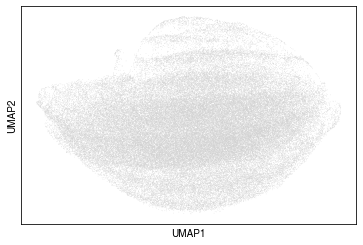

In [23]:
sc.pl.umap(adata)

In [24]:
adata.var

Empty DataFrame
Columns: []
Index: [SMA, Vimentin, CD163, PanKeratin, CD11b, PD-L1, CD31, CD45, Lag3, CD11c, FoxP3, CD4, Ecadherin, CD68, CD20, CD8a, PD1, CD45RA, Granzyme B, T1 Collagen, PD-L2, CD3, Ki67, CD45RO, HLADR]

In [25]:
adata.obs

image_id     sample_id  \
cell_id                                                                  
HT055P1_PA_A1_A4_ROI_01_1        HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_11       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_23       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_25       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_27       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
...                                                  ...           ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03  human_spleen   

                               case_id  roi  Cell Area (µm²)  
cell_id                                                       
HT055P1_PA_A1_A4_ROI_01_1      HT055P1    1            35.75  
HT055P1_PA_A1_A4_ROI_01_11     HT055P1    1            51.25  
HT055P1_PA_A1_A4_ROI_01_23     HT055P1    1           109.00  
HT055P1_PA_A1_A4_ROI_01_25     HT055P1    1            28.50  
HT055P1_PA_A1_A4_ROI_01_27     HT055P1    1            44.00  
...                                ...  ...              ...  
human_spleen_HT093_ROI_03_926    human    3            82.25  
human_spleen_HT093_ROI_03_927    human    3           124.25  
human_spleen_HT093_ROI_03_937    human    3            96.50  
human_spleen_HT093_ROI_03_942    human    3            42.25  
human_spleen_HT093_ROI_03_944    human    3            32.75  

[92881 rows x 5 columns]

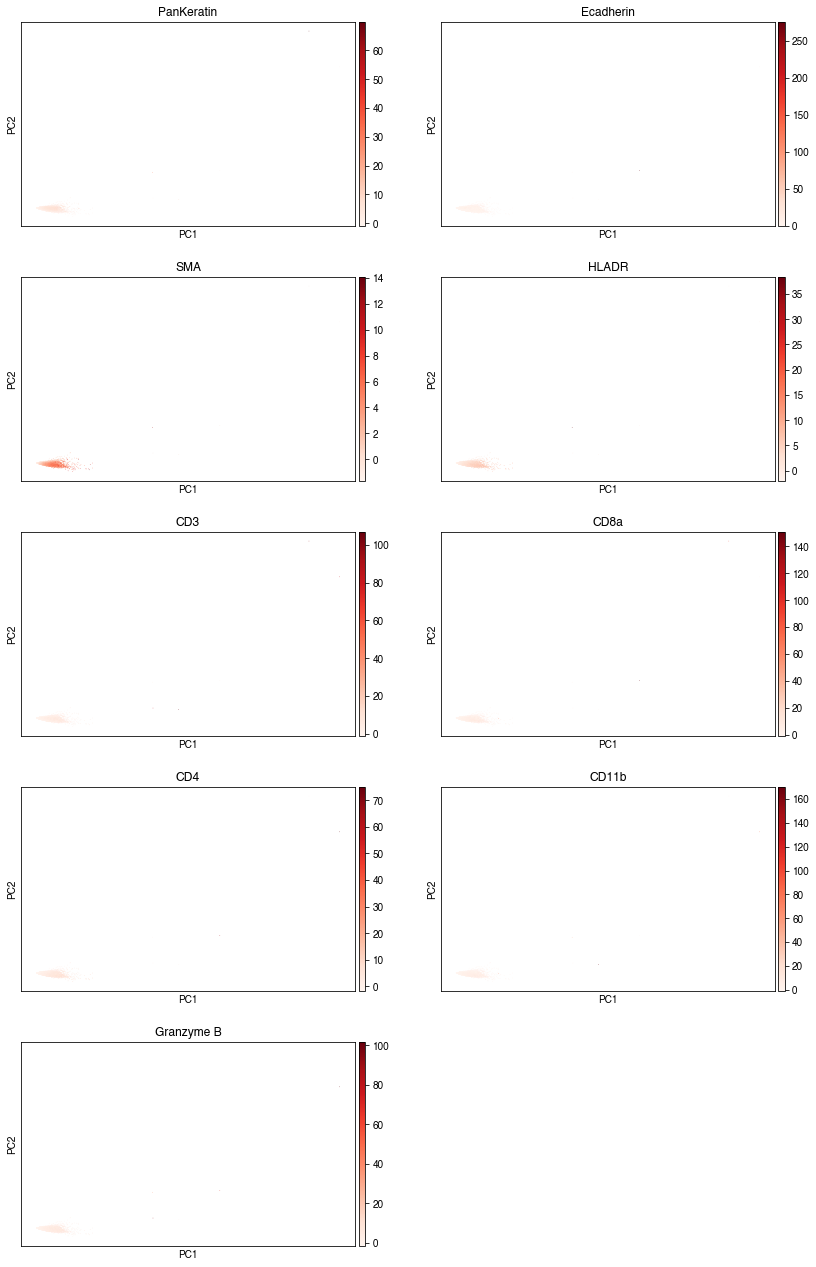

In [26]:
markers = ['PanKeratin', 'Ecadherin', 'SMA', 'HLADR', 'CD3', 'CD8a', 'CD4', 'CD11b', 'Granzyme B']
sc.pl.pca(adata, color=markers,
           ncols=2, color_map='Reds', use_raw=False)

/Users/erikstorrs/miniconda3/envs/scanpy/lib/python3.6/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


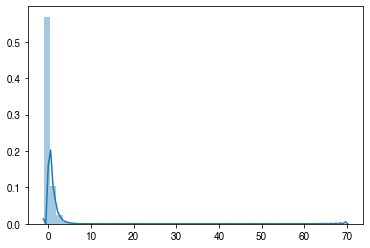

In [27]:
sns.distplot(adata[:, 'PanKeratin'].X)

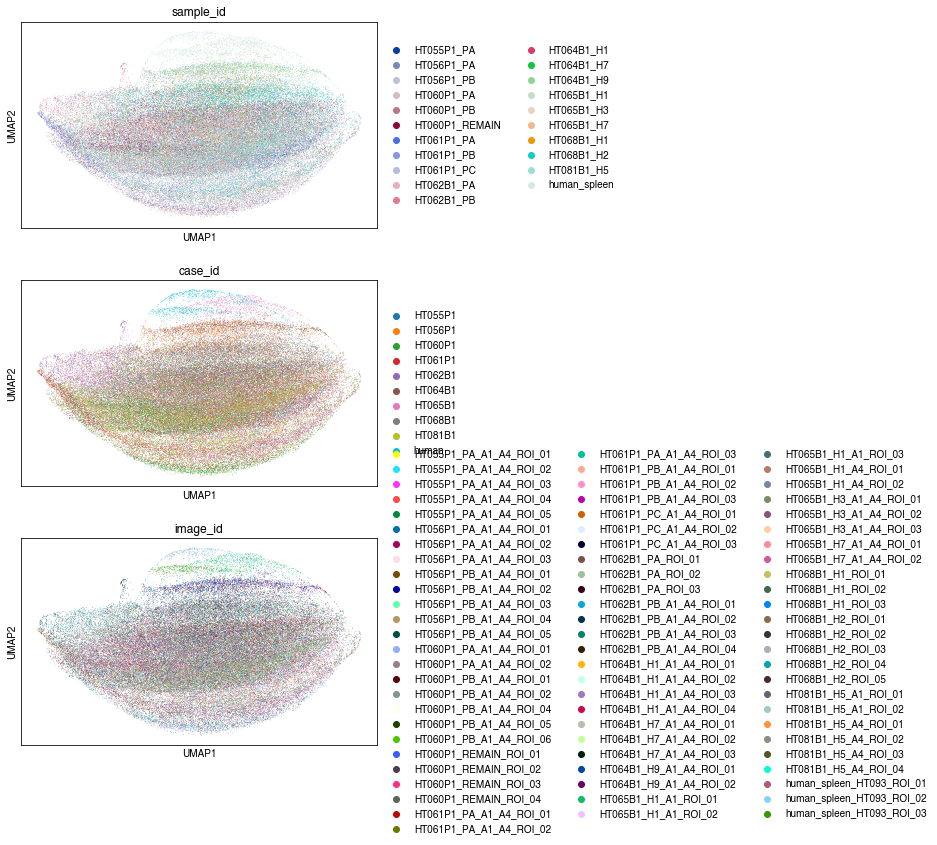

In [28]:
sc.pl.umap(adata, color=['sample_id', 'case_id', 'image_id'], ncols=1, color_map='Reds', use_raw=False)

In [29]:
# X = umap.UMAP().fit_transform(adata.raw.X)
# X

In [30]:
# adata.raw.X.shape

In [31]:
# adata.obsm['raw_umap'] = X
# adata.obs['raw_umap1'] = X[:, 0].flatten()
# adata.obs['raw_umap2'] = X[:, 1].flatten()

In [32]:
# sc.pl.scatter(adata, x='raw_umap1',
#               y='raw_umap2', )

In [33]:
# sc.pl.scatter(adata, x='raw_umap1',
#               y='raw_umap2', color='CD3', color_map='Reds')

In [34]:
# sc.pl.scatter(adata, x='raw_umap1',
#               y='raw_umap2', color='sample_id', color_map='Reds')

In [35]:
# !pip install git+https://github.com/jacoblevine/phenograph.git

In [36]:
import phenograph
communities, graph, Q = phenograph.cluster(adata.X)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 94.71001195907593 seconds
Jaccard graph constructed in 17.955528020858765 seconds
Wrote graph to binary file in 11.993673086166382 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.827286
After 3 runs, maximum modularity is Q = 0.828668
After 15 runs, maximum modularity is Q = 0.829974
Louvain completed 35 runs in 234.87280297279358 seconds
PhenoGraph complete in 360.07716393470764 seconds


In [37]:
communities

array([13, 20,  5, ...,  5, 26,  1])

In [38]:
graph

<92881x92881 sparse matrix of type '<class 'numpy.float64'>'
	with 2125426 stored elements in COOrdinate format>

In [39]:
Q

0.829974

In [40]:
adata.obs['community'] = [str(c) for c in communities]

... storing 'community' as categorical


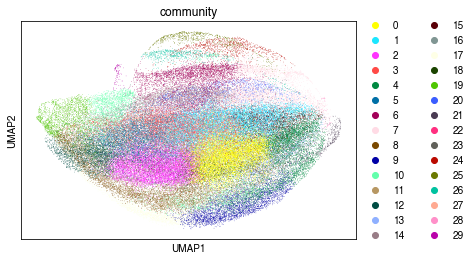

In [41]:
sc.pl.umap(adata, color=['community'],
           ncols=2, use_raw=False)

In [42]:
# sc.tl.filter_rank_genes_groups(adata, key='community', )
# adata

In [43]:
sc.tl.rank_genes_groups(adata, 'community', method='wilcoxon')

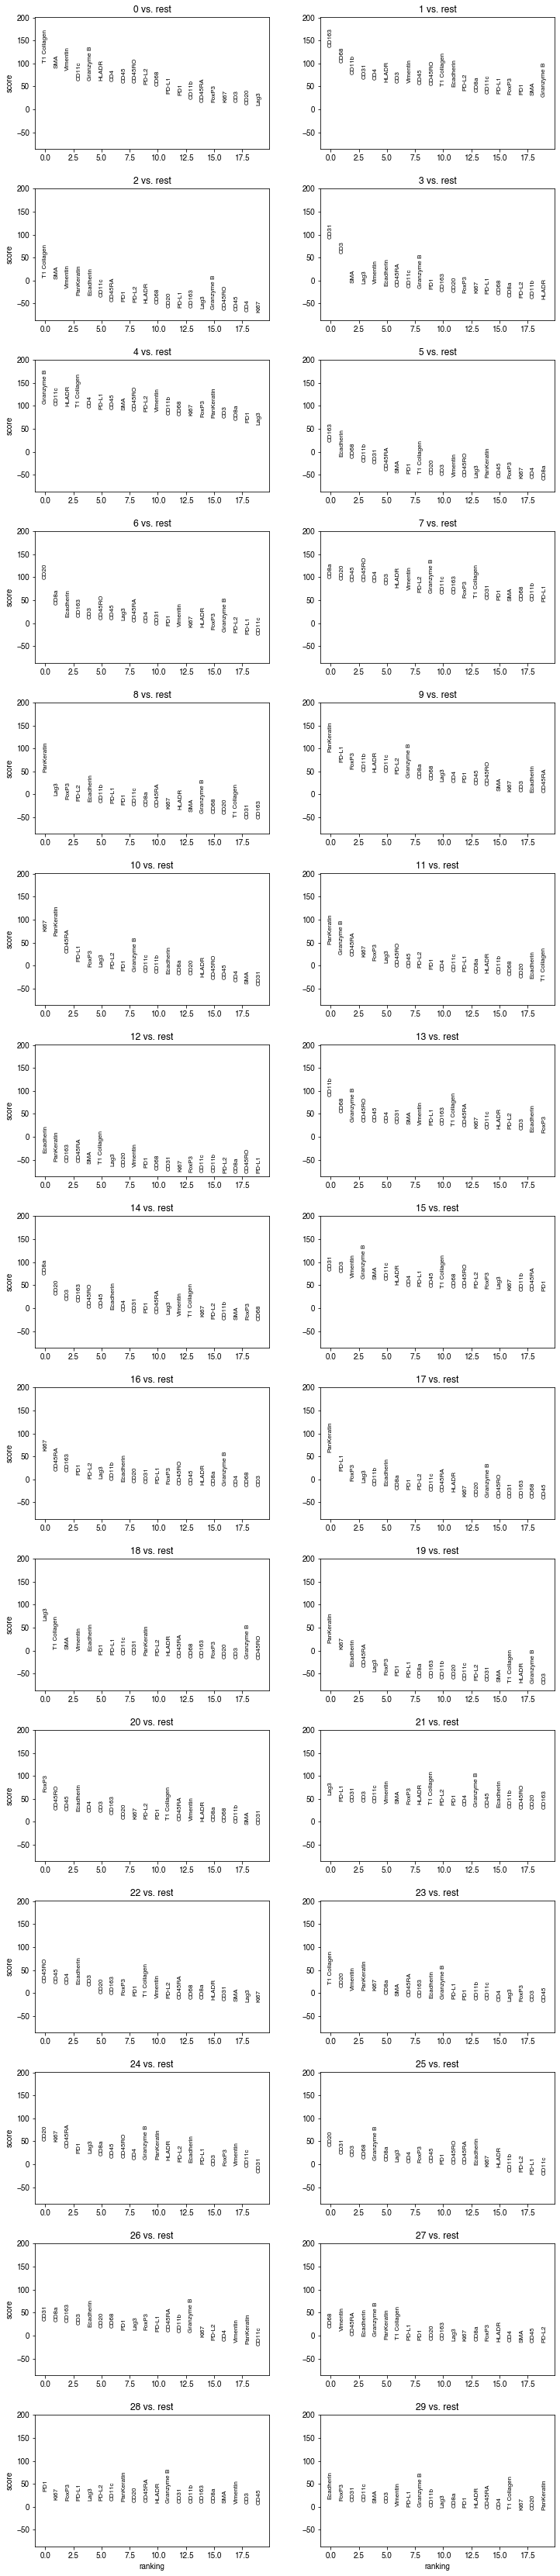

In [45]:
sc.pl.rank_genes_groups(adata, ncols=2)

In [ ]:
## CD163: macrophage

In [48]:
cell_type_specific_to_community = {
    'monocyte/macrophage': [1, 5, 13, 27],
    'monocyte/macrophage_ki67+': [16],
    'cd8_t_cell': [14],
    'cd4_t_cell': [22],
    't_cell': [7],
    'treg': [20],
    'tumor': [8, 11, 12],
    'tumor_pdl1+': [9, 17],
    'tumor_ki67+': [10, 19],
    'CAF': [0, 2, 23],
    'endothelial': [3, 15],
    'b_cell': [6, 25],
    'b_cell_ki67+': [24],
    'lag3+': [18, 21],
    'pd1+': [28],
    'unknown': [4, 26, 29]
}
cell_type_specific_to_community = {str(c):t for t, cs in cell_type_specific_to_community.items() for c in cs}
adata.obs['cell_type_specific'] = [cell_type_specific_to_community[c] for c in adata.obs['community']]

In [49]:
adata.obs['cell_type_specific']

cell_id
HT055P1_PA_A1_A4_ROI_01_1        monocyte/macrophage
HT055P1_PA_A1_A4_ROI_01_11                      treg
HT055P1_PA_A1_A4_ROI_01_23       monocyte/macrophage
HT055P1_PA_A1_A4_ROI_01_25                       CAF
HT055P1_PA_A1_A4_ROI_01_27                       CAF
                                        ...         
human_spleen_HT093_ROI_03_926                unknown
human_spleen_HT093_ROI_03_927                unknown
human_spleen_HT093_ROI_03_937    monocyte/macrophage
human_spleen_HT093_ROI_03_942                unknown
human_spleen_HT093_ROI_03_944    monocyte/macrophage
Name: cell_type_specific, Length: 92881, dtype: object

In [51]:
cafs = adata[adata.obs['cell_type_specific']=='CAF']
communities, graph, Q = phenograph.cluster(cafs.X)
cafs.obs['community'] = [str(c) for c in communities]
cafs

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.7720470428466797 seconds
Jaccard graph constructed in 1.784682035446167 seconds
Wrote graph to binary file in 3.088920831680298 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.719103
After 5 runs, maximum modularity is Q = 0.723207
Louvain completed 25 runs in 18.647441148757935 seconds
PhenoGraph complete in 26.37846803665161 seconds


Trying to set attribute `.obs` of view, making a copy.


AnnData object with n_obs × n_vars = 19124 × 25 
    obs: 'image_id', 'sample_id', 'case_id', 'roi', 'Cell Area (µm²)', 'community', 'cell_type_specific'
    uns: 'pca', 'neighbors', 'sample_id_colors', 'case_id_colors', 'image_id_colors', 'community_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

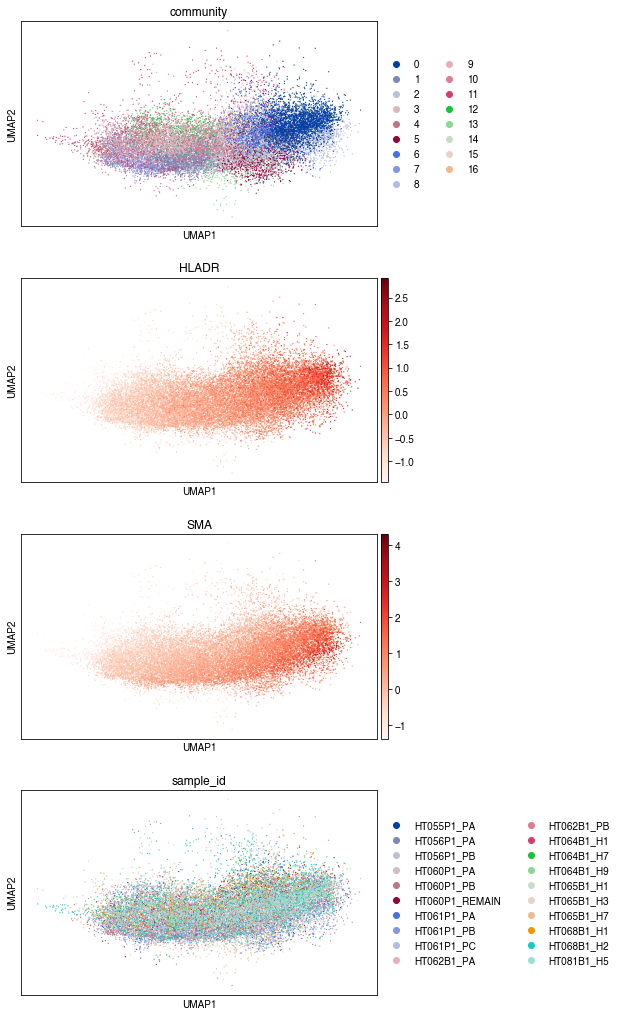

In [59]:
sc.pl.umap(cafs, color=['community', 'HLADR', 'SMA', 'sample_id'],
           ncols=1, use_raw=False, color_map='Reds')

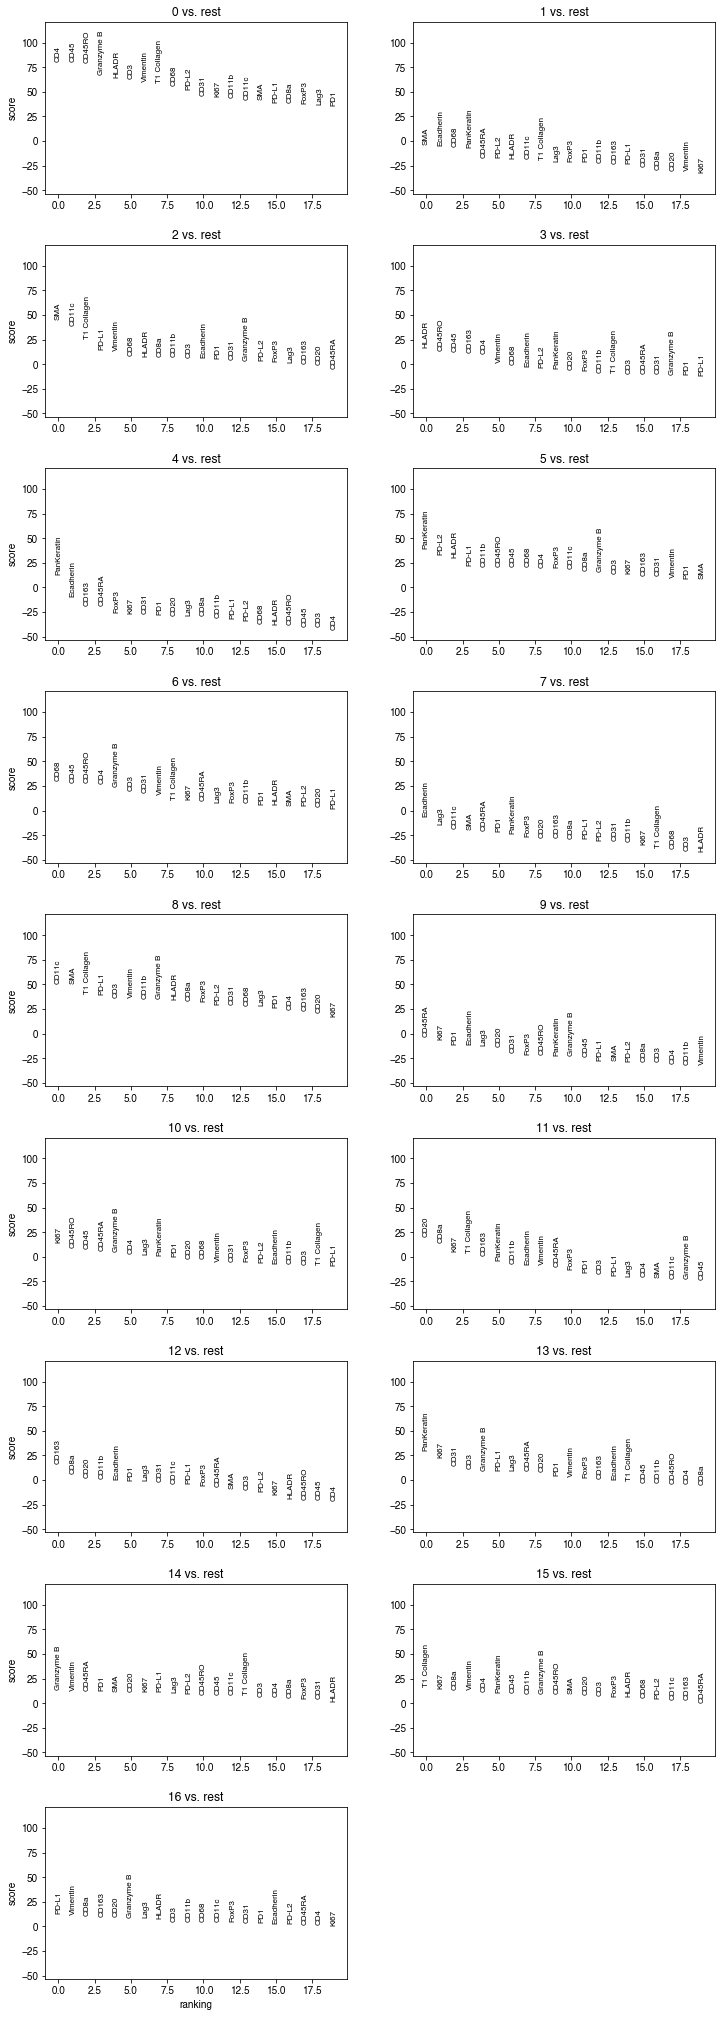

In [53]:
sc.tl.rank_genes_groups(cafs, 'community', method='wilcoxon')
sc.pl.rank_genes_groups(cafs, ncols=2)

In [61]:
caf_specific_to_community = {
    'apCAF': [3],
    'myCAF': [1, 2, 8],
    'otherCAF': [0, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16],
}
caf_specific_to_community = {str(c):t for t, cs in caf_specific_to_community.items() for c in cs}
cafs.obs['caf_specific'] = [caf_specific_to_community[c] for c in cafs.obs['community']]

In [62]:
caf_id_to_type = {c_id:ct for c_id, ct in zip(cafs.obs.index, cafs.obs['caf_specific'])}
adata.obs['caf_subtype'] = [caf_id_to_type.get(c_id, np.nan) for c_id in adata.obs.index]
Counter(adata.obs['caf_subtype']).most_common()

[(nan, 73757), ('otherCAF', 12622), ('myCAF', 5045), ('apCAF', 1457)]

In [ ]:
# cell_type_to_community = {
#     'immune': [1, 2, 3, 7, 9, 12, 21, 25],
#     'tumor': [5, 11, 13, 14, 19],
#     'stromal': [0, 4 ],
#     'unknown': [6, 8, 10, 15, 16, 17, 18, 20, 22, 23, 24, 26, 27, 28]
# }
# community_to_cell_type = {str(c):t for t, cs in cell_type_to_community.items() for c in cs}

In [ ]:
# community_to_cell_type

In [63]:


specific_to_general = {
    'monocyte/macrophage': 'Macrophage',
    'monocyte/macrophage_ki67+': 'Macrophage',
    'cd8_t_cell': 'CD8_T',
    'cd4_t_cell': 'CD4_T',
    't_cell': 'T',
    'treg': 'Treg',
    'tumor': 'Tumor',
    'tumor_pdl1+': 'Tumor',
    'tumor_ki67+': 'Tumor',
    'CAF': 'Fibroblast',
    'endothelial': 'Endothelial',
    'b_cell': 'B',
    'b_cell_ki67+': 'B',
}
adata.obs['cell_type'] = [specific_to_general.get(c, 'unknown') for c in adata.obs['cell_type_specific']]
adata.obs['cell_type']

cell_id
HT055P1_PA_A1_A4_ROI_01_1        Macrophage
HT055P1_PA_A1_A4_ROI_01_11             Treg
HT055P1_PA_A1_A4_ROI_01_23       Macrophage
HT055P1_PA_A1_A4_ROI_01_25       Fibroblast
HT055P1_PA_A1_A4_ROI_01_27       Fibroblast
                                    ...    
human_spleen_HT093_ROI_03_926       unknown
human_spleen_HT093_ROI_03_927       unknown
human_spleen_HT093_ROI_03_937    Macrophage
human_spleen_HT093_ROI_03_942       unknown
human_spleen_HT093_ROI_03_944    Macrophage
Name: cell_type, Length: 92881, dtype: object

In [68]:
# add caf subtypes to general classifications

adata.obs['cell_type'] = [caf if c == 'Fibroblast' else c for c, caf in zip(adata.obs['cell_type'],
                                                                   adata.obs['caf_subtype'])]

In [70]:
adata.write_h5ad('halo_adata_backup.h5ad')

... storing 'cell_type_specific' as categorical
... storing 'caf_subtype' as categorical
... storing 'cell_type' as categorical


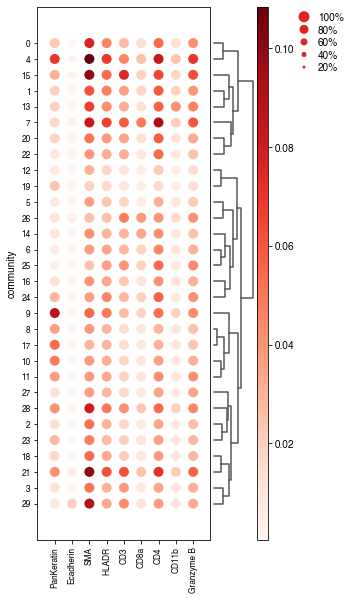

In [71]:

ax = sc.pl.dotplot(adata, markers, groupby='community', dendrogram=True, log=True)

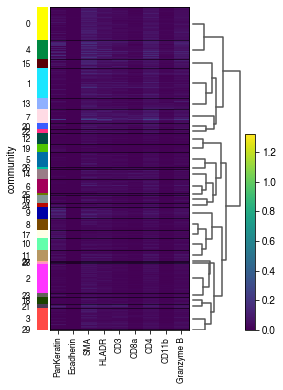

In [72]:

ax = sc.pl.heatmap(adata, markers, groupby='community', dendrogram=True, log=True)

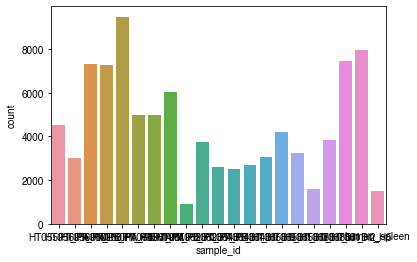

In [73]:
sns.countplot(x='sample_id', data=adata.obs)

In [74]:
set(adata.obs['image_id'])

{'HT055P1_PA_A1_A4_ROI_01',
 'HT055P1_PA_A1_A4_ROI_02',
 'HT055P1_PA_A1_A4_ROI_03',
 'HT055P1_PA_A1_A4_ROI_04',
 'HT055P1_PA_A1_A4_ROI_05',
 'HT056P1_PA_A1_A4_ROI_01',
 'HT056P1_PA_A1_A4_ROI_02',
 'HT056P1_PA_A1_A4_ROI_03',
 'HT056P1_PB_A1_A4_ROI_01',
 'HT056P1_PB_A1_A4_ROI_02',
 'HT056P1_PB_A1_A4_ROI_03',
 'HT056P1_PB_A1_A4_ROI_04',
 'HT056P1_PB_A1_A4_ROI_05',
 'HT060P1_PA_A1_A4_ROI_01',
 'HT060P1_PA_A1_A4_ROI_02',
 'HT060P1_PB_A1_A4_ROI_01',
 'HT060P1_PB_A1_A4_ROI_02',
 'HT060P1_PB_A1_A4_ROI_04',
 'HT060P1_PB_A1_A4_ROI_05',
 'HT060P1_PB_A1_A4_ROI_06',
 'HT060P1_REMAIN_ROI_01',
 'HT060P1_REMAIN_ROI_02',
 'HT060P1_REMAIN_ROI_03',
 'HT060P1_REMAIN_ROI_04',
 'HT061P1_PA_A1_A4_ROI_01',
 'HT061P1_PA_A1_A4_ROI_02',
 'HT061P1_PA_A1_A4_ROI_03',
 'HT061P1_PB_A1_A4_ROI_01',
 'HT061P1_PB_A1_A4_ROI_02',
 'HT061P1_PB_A1_A4_ROI_03',
 'HT061P1_PC_A1_A4_ROI_01',
 'HT061P1_PC_A1_A4_ROI_02',
 'HT061P1_PC_A1_A4_ROI_03',
 'HT062B1_PA_ROI_01',
 'HT062B1_PA_ROI_02',
 'HT062B1_PA_ROI_03',
 'HT062B1_PB_A1_A4

In [75]:
df = cell_df.copy()
df['image_id'] = [fp.split('\\')[-1].split('.')[0] for fp in df['Image Location']]

df['cell_id'] = [f'{s_id}_{c}' for s_id, c in zip(df['image_id'], df['Object Id'])]
df = df.set_index('cell_id')
df = df[['XMin', 'XMax', 'YMin', 'YMax']]
df

XMin  XMax  YMin  YMax
cell_id                                             
HT055P1_PA_A1_A4_ROI_01_0        8    17    -2    10
HT055P1_PA_A1_A4_ROI_01_1       42    49    -2     4
HT055P1_PA_A1_A4_ROI_01_2       65    72    -2     4
HT055P1_PA_A1_A4_ROI_01_3       73    81    -2     4
HT055P1_PA_A1_A4_ROI_01_4      109   115    -2     4
...                            ...   ...   ...   ...
HT069B1_H9_A1_A4_ROI_03_4016   259   265   394   397
HT069B1_H9_A1_A4_ROI_03_4017    16    27   394   404
HT069B1_H9_A1_A4_ROI_03_4018   194   203   394   404
HT069B1_H9_A1_A4_ROI_03_4019   227   236   396   401
HT069B1_H9_A1_A4_ROI_03_4020   250   256   396   403

[174853 rows x 4 columns]

In [76]:
adata.obs = pd.merge(adata.obs, df, right_index=True, left_index=True)

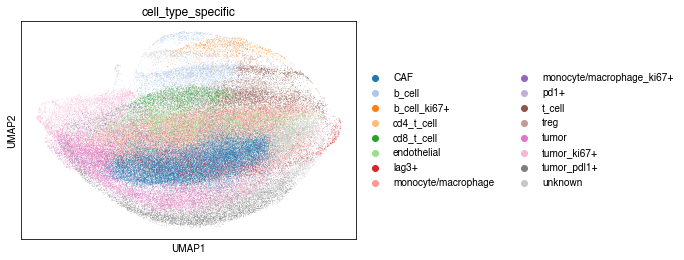

In [77]:
sc.pl.umap(adata, color=['cell_type_specific'],
           ncols=2, use_raw=False, palette=sns.color_palette("tab20"),
          save='_cell_type.pdf')

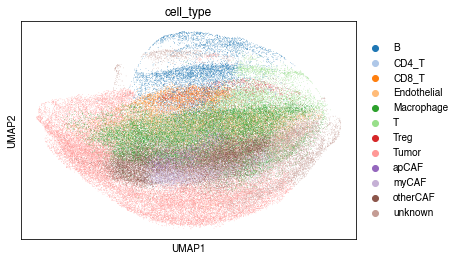

In [78]:
sc.pl.umap(adata, color=['cell_type'],
           ncols=2, use_raw=False, palette=sns.color_palette("tab20"),
          save='_cell_type.pdf')

In [ ]:
sc.pl.umap(adata, color=['cell_type', 'HLADR', 'CD4'],
           ncols=2, use_raw=False, palette=sns.color_palette("tab20"),
          color_map='Reds', save='_cell_type.pdf')

##### calculate distance to nearest tumor cell

In [79]:
adata.obs['X'] = [x1 + ((x2-x2)/2) for x1, x2 in zip(adata.obs['XMin'], adata.obs['XMax'])]
adata.obs['Y'] = [y1 + ((y2-y2)/2) for y1, y2 in zip(adata.obs['YMin'], adata.obs['YMax'])]

In [206]:
def closest_node(node, nodes, tree=None):
    tree = scipy.spatial.KDTree(nodes)
    return tree.query(node, k=1)
#     nodes = np.asarray(nodes)
#     dist_2 = np.sqrt(np.sum((nodes - node)**2, axis=1))
#     return np.argmin(dist_2), dist_2[np.argmin(dist_2)]

def calculate_distance_to_nearest(adata, cell_type_key='cell_type'):
    cell_types = sorted(set(adata.obs[cell_type_key]))
    image_ids = set(adata.obs['image_id'])
    cell_id_to_neighbor = {c:{} for c in adata.obs.index}
    for image_id in image_ids:
        print(image_id)
        filtered = adata[adata.obs['image_id']==image_id]
        for cell_type in cell_types:
            cells = filtered[filtered.obs[cell_type_key]==cell_type]
            xy = cells.obs[['X', 'Y']].values
            if xy.shape[0]: tree = scipy.spatial.cKDTree(xy)
            
            for cell_id, x, y in zip(filtered.obs.index, filtered.obs['X'], filtered.obs['Y']):
                if cells.shape[0]:
                    dist, closest = tree.query((x, y), k=1)
#                     closest, dist = closest_node(np.asarray([x, y]), xy)
#                     print(closest, dist)
                    cell_id_to_neighbor[cell_id][cell_type] = {
                        'cell_id': cells.obs.iloc[[closest]].index[0],
                        'distance': dist
                    }
                else:
                    cell_id_to_neighbor[cell_id][cell_type] = {
                        'cell_id': np.nan,
                        'distance': np.nan
                    }
    
    data = []
    cols = [[f'nearest_{ct}', f'nearest_{ct}_distance'] for ct in cell_types]
    cols = [x for xs in cols for x in xs]
    for cell_id in adata.obs.index:
        row = []
        for ct in cell_types:
            row.append(cell_id_to_neighbor[cell_id][ct]['cell_id'])
            row.append(cell_id_to_neighbor[cell_id][ct]['distance'])
        data.append(row)
            
    return pd.DataFrame(data=data, index=adata.obs.index,
                        columns=cols)
    
    return cell_id_to_neighbor
        
            
            

In [81]:
distance_dict = calculate_distance_to_nearest(adata.copy())
distance_dict

HT061P1_PA_A1_A4_ROI_03
HT056P1_PA_A1_A4_ROI_01
HT056P1_PA_A1_A4_ROI_03
HT081B1_H5_A1_ROI_02
HT060P1_PB_A1_A4_ROI_01
HT056P1_PB_A1_A4_ROI_03
HT055P1_PA_A1_A4_ROI_02
HT068B1_H1_ROI_02
HT068B1_H2_ROI_04
HT065B1_H3_A1_A4_ROI_01
human_spleen_HT093_ROI_02
HT081B1_H5_A4_ROI_02
HT060P1_PA_A1_A4_ROI_02
HT062B1_PB_A1_A4_ROI_01
HT068B1_H2_ROI_05
HT062B1_PB_A1_A4_ROI_02
HT065B1_H3_A1_A4_ROI_02
HT064B1_H9_A1_A4_ROI_02
HT060P1_REMAIN_ROI_02
HT081B1_H5_A4_ROI_03
HT061P1_PC_A1_A4_ROI_01
HT068B1_H2_ROI_01
HT065B1_H1_A4_ROI_02
HT065B1_H1_A4_ROI_01
HT064B1_H1_A1_A4_ROI_01
HT055P1_PA_A1_A4_ROI_05
HT061P1_PB_A1_A4_ROI_03
HT068B1_H1_ROI_01
HT064B1_H7_A1_A4_ROI_02
HT055P1_PA_A1_A4_ROI_04
HT064B1_H1_A1_A4_ROI_03
HT065B1_H1_A1_ROI_01
HT061P1_PC_A1_A4_ROI_03
HT056P1_PA_A1_A4_ROI_02
HT056P1_PB_A1_A4_ROI_01
HT060P1_PB_A1_A4_ROI_04
HT061P1_PB_A1_A4_ROI_02
HT068B1_H2_ROI_02
HT065B1_H7_A1_A4_ROI_01
human_spleen_HT093_ROI_03
HT060P1_PB_A1_A4_ROI_05
HT060P1_REMAIN_ROI_03
HT081B1_H5_A4_ROI_01
HT056P1_PB_A1_A4_ROI_02
H

nearest_B  \
cell_id                                                        
HT055P1_PA_A1_A4_ROI_01_1       HT055P1_PA_A1_A4_ROI_01_1155   
HT055P1_PA_A1_A4_ROI_01_11      HT055P1_PA_A1_A4_ROI_01_1155   
HT055P1_PA_A1_A4_ROI_01_23      HT055P1_PA_A1_A4_ROI_01_1155   
HT055P1_PA_A1_A4_ROI_01_25      HT055P1_PA_A1_A4_ROI_01_1155   
HT055P1_PA_A1_A4_ROI_01_27      HT055P1_PA_A1_A4_ROI_01_1155   
...                                                      ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03_763   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03_755   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03_755   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03_763   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03_763   

                               nearest_B_distance  \
cell_id                                             
HT055P1_PA_A1_A4_ROI_01_1              412.603926   
HT055P1_PA_A1_A4_ROI_01_11             336.157701   
HT055P1_PA_A1_A4_ROI_01_23             384.688185   
HT055P1_PA_A1_A4_ROI_01_25             327.123830   
HT055P1_PA_A1_A4_ROI_01_27             327.343856   
...                                           ...   
human_spleen_HT093_ROI_03_926           82.462113   
human_spleen_HT093_ROI_03_927           75.133215   
human_spleen_HT093_ROI_03_937           68.117545   
human_spleen_HT093_ROI_03_942           70.342022   
human_spleen_HT093_ROI_03_944           68.731361   

                                              nearest_CD4_T  \
cell_id                                                       
HT055P1_PA_A1_A4_ROI_01_1                               NaN   
HT055P1_PA_A1_A4_ROI_01_11                              NaN   
HT055P1_PA_A1_A4_ROI_01_23                              NaN   
HT055P1_PA_A1_A4_ROI_01_25                              NaN   
HT055P1_PA_A1_A4_ROI_01_27                              NaN   
...                                                     ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03_60   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03_60   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03_60   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03_60   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03_60   

                               nearest_CD4_T_distance  \
cell_id                                                 
HT055P1_PA_A1_A4_ROI_01_1                         NaN   
HT055P1_PA_A1_A4_ROI_01_11                        NaN   
HT055P1_PA_A1_A4_ROI_01_23                        NaN   
HT055P1_PA_A1_A4_ROI_01_25                        NaN   
HT055P1_PA_A1_A4_ROI_01_27                        NaN   
...                                               ...   
human_spleen_HT093_ROI_03_926              354.114388   
human_spleen_HT093_ROI_03_927              383.470990   
human_spleen_HT093_ROI_03_937              371.732431   
human_spleen_HT093_ROI_03_942              358.871843   
human_spleen_HT093_ROI_03_944              359.517733   

                                               nearest_CD8_T  \
cell_id                                                        
HT055P1_PA_A1_A4_ROI_01_1        HT055P1_PA_A1_A4_ROI_01_108   
HT055P1_PA_A1_A4_ROI_01_11       HT055P1_PA_A1_A4_ROI_01_108   
HT055P1_PA_A1_A4_ROI_01_23       HT055P1_PA_A1_A4_ROI_01_108   
HT055P1_PA_A1_A4_ROI_01_25       HT055P1_PA_A1_A4_ROI_01_108   
HT055P1_PA_A1_A4_ROI_01_27       HT055P1_PA_A1_A4_ROI_01_108   
...                                                      ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03_746   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03_891   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03_891   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03_895   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03_895   

                               nearest_CD8_T_distance  \
cell_id                                                 
HT055P1_PA_A1_A4_RO

In [82]:
adata.obs = pd.merge(adata.obs, distance_dict, left_index=True, right_index=True)
adata.obs

image_id     sample_id  \
cell_id                                                                  
HT055P1_PA_A1_A4_ROI_01_1        HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_11       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_23       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_25       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_27       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
...                                                  ...           ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03  human_spleen   

                               case_id  roi  Cell Area (µm²) community  \
cell_id                                                                  
HT055P1_PA_A1_A4_ROI_01_1      HT055P1    1            35.75        13   
HT055P1_PA_A1_A4_ROI_01_11     HT055P1    1            51.25        20   
HT055P1_PA_A1_A4_ROI_01_23     HT055P1    1           109.00         5   
HT055P1_PA_A1_A4_ROI_01_25     HT055P1    1            28.50         0   
HT055P1_PA_A1_A4_ROI_01_27     HT055P1    1            44.00         0   
...                                ...  ...              ...       ...   
human_spleen_HT093_ROI_03_926    human    3            82.25        26   
human_spleen_HT093_ROI_03_927    human    3           124.25        26   
human_spleen_HT093_ROI_03_937    human    3            96.50         5   
human_spleen_HT093_ROI_03_942    human    3            42.25        26   
human_spleen_HT093_ROI_03_944    human    3            32.75         1   

                                cell_type_specific caf_subtype   cell_type  \
cell_id                                                                      
HT055P1_PA_A1_A4_ROI_01_1      monocyte/macrophage         nan  Macrophage   
HT055P1_PA_A1_A4_ROI_01_11                    treg         nan        Treg   
HT055P1_PA_A1_A4_ROI_01_23     monocyte/macrophage         nan  Macrophage   
HT055P1_PA_A1_A4_ROI_01_25                     CAF       myCAF       myCAF   
HT055P1_PA_A1_A4_ROI_01_27                     CAF       myCAF       myCAF   
...                                            ...         ...         ...   
human_spleen_HT093_ROI_03_926              unknown         nan     unknown   
human_spleen_HT093_ROI_03_927              unknown         nan     unknown   
human_spleen_HT093_ROI_03_937  monocyte/macrophage         nan  Macrophage   
human_spleen_HT093_ROI_03_942              unknown         nan     unknown   
human_spleen_HT093_ROI_03_944  monocyte/macrophage         nan  Macrophage   

                               XMin  ...                  nearest_Tumor  \
cell_id                              ...                                  
HT055P1_PA_A1_A4_ROI_01_1        42  ...     HT055P1_PA_A1_A4_ROI_01_76   
HT055P1_PA_A1_A4_ROI_01_11      222  ...     HT055P1_PA_A1_A4_ROI_01_71   
HT055P1_PA_A1_A4_ROI_01_23       90  ...    HT055P1_PA_A1_A4_ROI_01_100   
HT055P1_PA_A1_A4_ROI_01_25      300  ...    HT055P1_PA_A1_A4_ROI_01_469   
HT055P1_PA_A1_A4_ROI_01_27      306  ...    HT055P1_PA_A1_A4_ROI_01_469   
...                             ...  ...                            ...   
human_spleen_HT093_ROI_03_926    67  ...  human_spleen_HT093_ROI_03_905   
human_spleen_HT093_ROI_03_927   221  ...  human_spleen_HT093_ROI_03_819   
human_spleen_HT093_ROI_03_937   183  ...  human_spleen_HT093_ROI_03_819   
human_spleen_HT093_ROI_03_942   101  ...  human_spleen_HT093_ROI_03_819   
human_spleen_HT093_ROI_03_944   109  ...  human_spleen_HT093_ROI_03_819   

                               nearest_Tumor_distance  nearest_apCAF  \
cell_id                                                    

In [83]:
adata.write_h5ad('halo_adata_backup.h5ad')

... storing 'nearest_B' as categorical
... storing 'nearest_CD4_T' as categorical
... storing 'nearest_CD8_T' as categorical
... storing 'nearest_Endothelial' as categorical
... storing 'nearest_Macrophage' as categorical
... storing 'nearest_T' as categorical
... storing 'nearest_Treg' as categorical
... storing 'nearest_Tumor' as categorical
... storing 'nearest_apCAF' as categorical
... storing 'nearest_myCAF' as categorical
... storing 'nearest_otherCAF' as categorical
... storing 'nearest_unknown' as categorical


## extra analyses

In [3]:
adata = sc.read_h5ad('halo_adata_backup.h5ad')

###### roi visualization

In [ ]:
# adata.obs[adata.obs['image_id']=='HT061P1_PA_A1_A4_ROI_03']

In [84]:
# filtered = adata[adata.obs['image_id']=='human_spleen_HT093_ROI_01'].copy()
filtered = adata[adata.obs['image_id']=='HT061P1_PA_A1_A4_ROI_03'].copy()
filtered

AnnData object with n_obs × n_vars = 3070 × 25 
    obs: 'image_id', 'sample_id', 'case_id', 'roi', 'Cell Area (µm²)', 'community', 'cell_type_specific', 'caf_subtype', 'cell_type', 'XMin', 'XMax', 'YMin', 'YMax', 'X', 'Y', 'nearest_B', 'nearest_B_distance', 'nearest_CD4_T', 'nearest_CD4_T_distance', 'nearest_CD8_T', 'nearest_CD8_T_distance', 'nearest_Endothelial', 'nearest_Endothelial_distance', 'nearest_Macrophage', 'nearest_Macrophage_distance', 'nearest_T', 'nearest_T_distance', 'nearest_Treg', 'nearest_Treg_distance', 'nearest_Tumor', 'nearest_Tumor_distance', 'nearest_apCAF', 'nearest_apCAF_distance', 'nearest_myCAF', 'nearest_myCAF_distance', 'nearest_otherCAF', 'nearest_otherCAF_distance', 'nearest_unknown', 'nearest_unknown_distance'
    uns: 'pca', 'neighbors', 'sample_id_colors', 'case_id_colors', 'image_id_colors', 'community_colors', 'rank_genes_groups', 'dendrogram_community', 'cell_type_specific_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

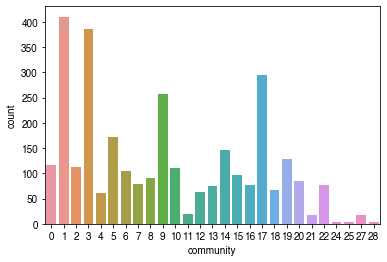

In [85]:
sns.countplot(x='community', data=filtered.obs)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

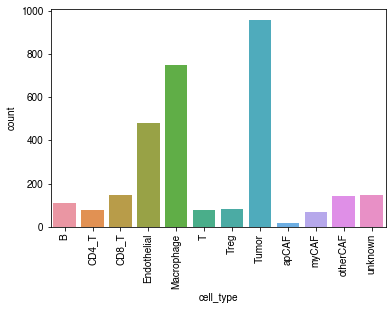

In [86]:
sns.countplot(x='cell_type', data=filtered.obs)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

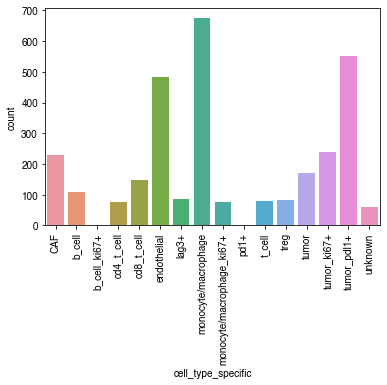

In [87]:
sns.countplot(x='cell_type_specific', data=filtered.obs)
plt.xticks(rotation=90)

In [88]:

# ax = sc.pl.dotplot(adata, markers, groupby='cell_type', dendrogram=True, log=True)

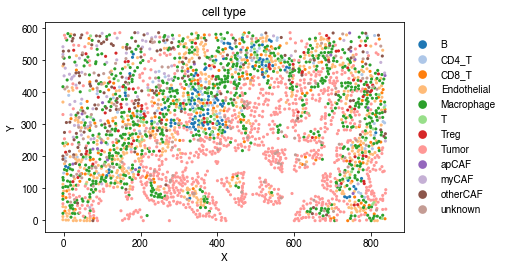

In [89]:
sc.pl.scatter(filtered, x='X', y='Y', color='cell_type')

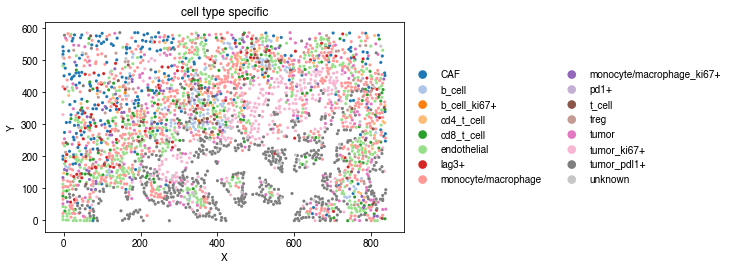

In [90]:
sc.pl.scatter(filtered, x='X', y='Y', color='cell_type_specific')

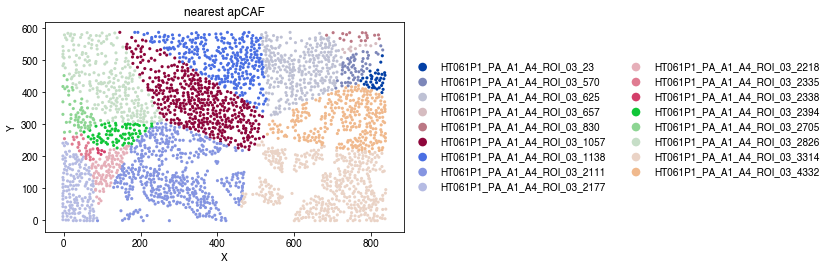

In [93]:
sc.pl.scatter(filtered, x='X', y='Y', color='nearest_apCAF')

###### distance to tumor interface

###### distance histogram

In [94]:
# ## stacked histo
# import matplotlib.pyplot as plt 
# import seaborn as sns 
# tips = sns.load_dataset("tips") 
# sns.distplot(tips.total_bill, color="gold", kde=False, hist_kws={"alpha": 1}) 
# sns.distplot(tips[tips.sex == "Female"].total_bill, color="blue", kde=False, hist_kws={"alpha":1}) 
# plt.show()

In [128]:
# temp = None
# def stacked_histogram(df, x, hue, palette=sns.color_palette(), log=False, xlim=None,
#                      bins=None):
#     order = sorted(set(df[hue]), reverse=True)
    
#     ## filter nan
#     df = df[~pd.isnull(df[x])]
    
#     to_keep = [order[:i] for i in range(len(order), 0, -1)]
#     print(to_keep)
#     for i, labels in enumerate(to_keep):
#         mask = [True if value in labels else False for value in df[hue]]
#         filtered = df[mask]
#         ax = sns.distplot(filtered[x], color=palette[i], kde=False, hist_kws={"alpha": 1}, bins=bins)
#         if xlim is not None: plt.xlim(xlim)
#         if log: ax.set_yscale('log')
#     ax.legend(np.flip(to_keep[0]))
#     return ax

def stacked_histogram(df, x, hue, palette=sns.color_palette(), log=False, xlim=None, ylim=None,
                     bins=None, downsample=False, figsize=(6, 1)):
    order = sorted(set(df[hue]), reverse=False)
    

    
    ## filter nan
    df = df[~pd.isnull(df[x])]
    
    counts = Counter(df[hue])
    
#     to_keep = [order[:i] for i in range(len(order), 0, -1)]
    to_keep = [[o] for o in order]
    print(to_keep)
    ls = []
    for i, labels in enumerate(to_keep):
        mask = [True if value in labels else False for value in df[hue]]
        filtered = df[mask]
        if downsample:
            if len(filtered[x]) > 10:
                ls.append(np.random.choice(filtered[x], max(counts.most_common()[-1][1], 10), replace=False))
            else:
                ls.append(filtered[x])
        else:
            ls.append(filtered[x])
            
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    if bins is None: bins = int(max([x for xs in ls for x in xs]) / 2)
    ax.hist(ls,
           stacked=True, label=[str(o).split('_')[-1] for o in order], bins=bins)

    if log: ax.set_yscale('log')
    if xlim is not None: plt.xlim(xlim)
    if ylim is not None: plt.ylim(ylim)
    ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.))
    return ax

[[1], [2], [3], [4], [5], [6]]


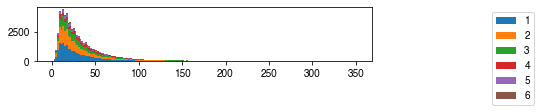

In [110]:
ax = stacked_histogram(adata[adata.obs['cell_type']!='Tumor'].obs, 'nearest_Tumor_distance', 'roi')


In [99]:
set(adata.obs['sample_id'])

{'HT055P1_PA',
 'HT056P1_PA',
 'HT056P1_PB',
 'HT060P1_PA',
 'HT060P1_PB',
 'HT060P1_REMAIN',
 'HT061P1_PA',
 'HT061P1_PB',
 'HT061P1_PC',
 'HT062B1_PA',
 'HT062B1_PB',
 'HT064B1_H1',
 'HT064B1_H7',
 'HT064B1_H9',
 'HT065B1_H1',
 'HT065B1_H3',
 'HT065B1_H7',
 'HT068B1_H1',
 'HT068B1_H2',
 'HT081B1_H5',
 'human_spleen'}

In [100]:
set(adata.obs['case_id'])

{'HT055P1',
 'HT056P1',
 'HT060P1',
 'HT061P1',
 'HT062B1',
 'HT064B1',
 'HT065B1',
 'HT068B1',
 'HT081B1',
 'human'}

In [101]:
# no_tumor = adata.copy()
# mask = [False if s in exclude else True for s in [f'{x}_{y}'
#                                                   for x, y in zip(no_tumor.obs['sample_id'], no_tumor.obs['roi'])]]
# no_tumor = no_tumor[mask]

# no_tumor = no_tumor[no_tumor.obs['cell_type']!='Tumor']
# # Counter([f'{x}' for x, y, c in zip(no_tumor.obs['sample_id'], adata.obs['roi'],
# #         no_tumor.obs['cell_type']) if c == 'Fibroblast']).most_common()
# Counter([f'{x}' for x, y, c in zip(no_tumor.obs['sample_id'], adata.obs['roi'],
#         no_tumor.obs['cell_type'])]).most_common()

In [102]:
# case = 'HT061P1'
# no_tumor = adata[adata.obs['case_id']==case]
# mask = [False if s in exclude else True for s in [f'{x}_{y}'
#                                                   for x, y in zip(no_tumor.obs['sample_id'], no_tumor.obs['roi'])]]
# no_tumor = no_tumor[mask]

# no_tumor = no_tumor[no_tumor.obs['cell_type']!='Tumor']
# Counter([f'{x}' for x, y, c in zip(no_tumor.obs['sample_id'], adata.obs['roi'],
#         no_tumor.obs['cell_type']) if c == 'Fibroblast']).most_common()

In [ ]:
tumor_counts = Counter([f'{x}_{y}' for x, y, c in zip(adata.obs['sample_id'], adata.obs['roi'],
        adata.obs['cell_type']) if c == 'Tumor'])
counts = Counter([f'{x}_{y}' for x, y, c in zip(adata.obs['sample_id'], adata.obs['roi'],
        adata.obs['cell_type'])])

In [107]:
tumor_counts = Counter([f'{x}_{y}' for x, y, c in zip(adata.obs['sample_id'], adata.obs['roi'],
        adata.obs['cell_type']) if c == 'Tumor'])
counts = Counter([f'{x}_{y}' for x, y, c in zip(adata.obs['sample_id'], adata.obs['roi'],
        adata.obs['cell_type'])])
exclude, counts = zip(*[(s, tumor_counts[s] / counts[s])
        for s in sorted(set([f'{x}_{y}' for x, y, c in zip(adata.obs['sample_id'], adata.obs['roi'],
        adata.obs['cell_type'])])) if tumor_counts[s] / counts[s] <= .05])
exclude, counts
# [(s, count)
#         for s, count in Counter([f'{x}_{y}' for x, y, c in zip(adata.obs['sample_id'], adata.obs['roi'],
#         adata.obs['cell_type']) if c == 'Tumor']).most_common()]

(('HT055P1_PA_3',
  'HT055P1_PA_4',
  'HT056P1_PA_1',
  'HT056P1_PB_2',
  'HT056P1_PB_3',
  'HT060P1_REMAIN_4',
  'HT062B1_PB_3',
  'HT062B1_PB_4',
  'HT064B1_H1_2',
  'HT064B1_H9_1',
  'HT064B1_H9_2',
  'HT065B1_H3_2',
  'HT068B1_H2_2',
  'HT068B1_H2_3',
  'HT081B1_H5_3',
  'human_spleen_1',
  'human_spleen_2',
  'human_spleen_3'),
 (0.02723146747352496,
  0.03465658475110271,
  0.031994554118447927,
  0.04712041884816754,
  0.03228228228228228,
  0.0,
  0.0,
  0.04878048780487805,
  0.018633540372670808,
  0.014363885088919288,
  0.00630119722747322,
  0.04156597390043499,
  0.011025358324145534,
  0.024793388429752067,
  0.02074688796680498,
  0.0,
  0.0,
  0.0030721966205837174))

HT056P1_PA


/Users/erikstorrs/miniconda3/envs/scanpy/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


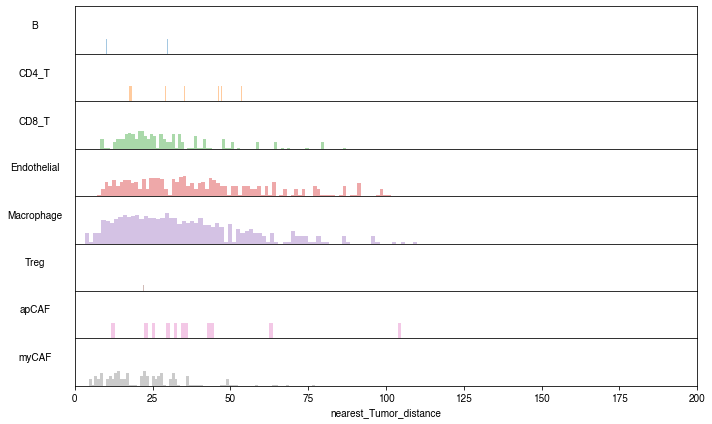

HT056P1_PB


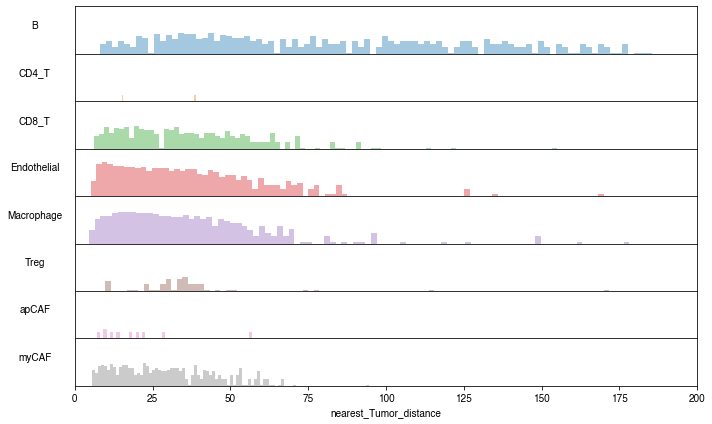

HT060P1_PA


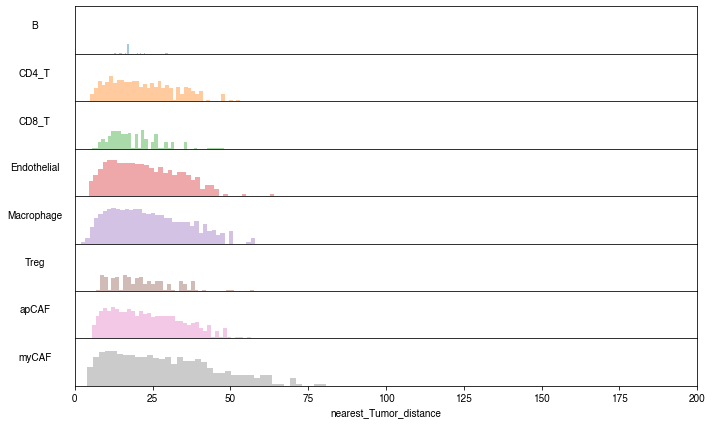

HT060P1_PB


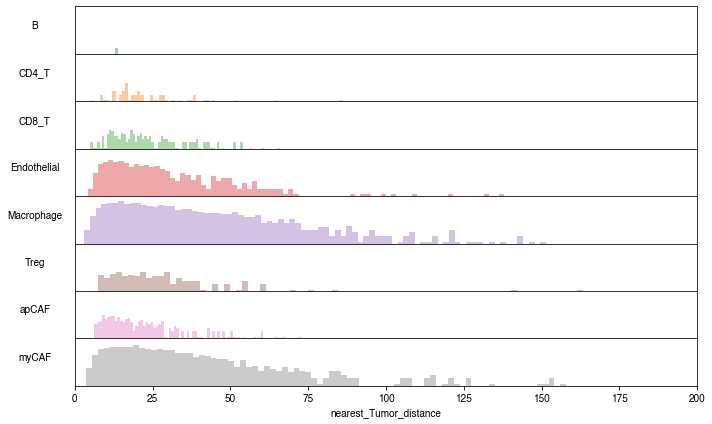

HT060P1_REMAIN


/Users/erikstorrs/miniconda3/envs/scanpy/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


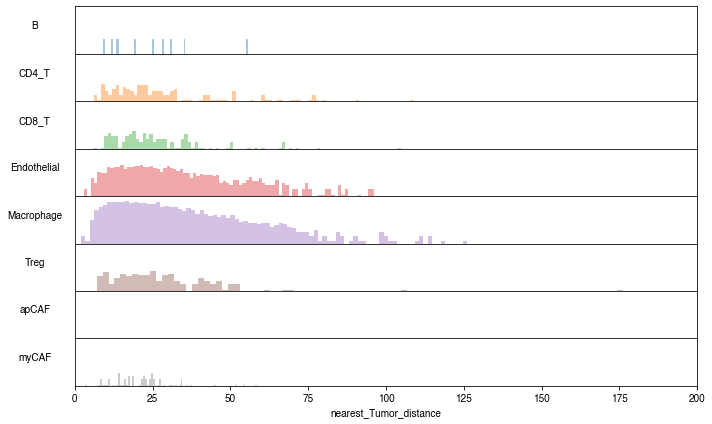

HT061P1_PA


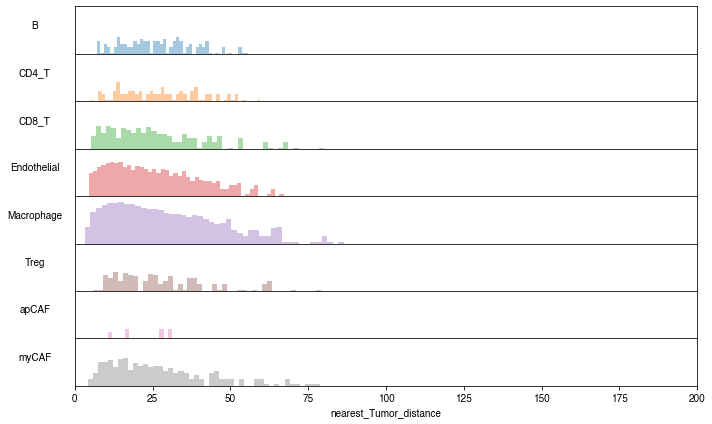

HT061P1_PB


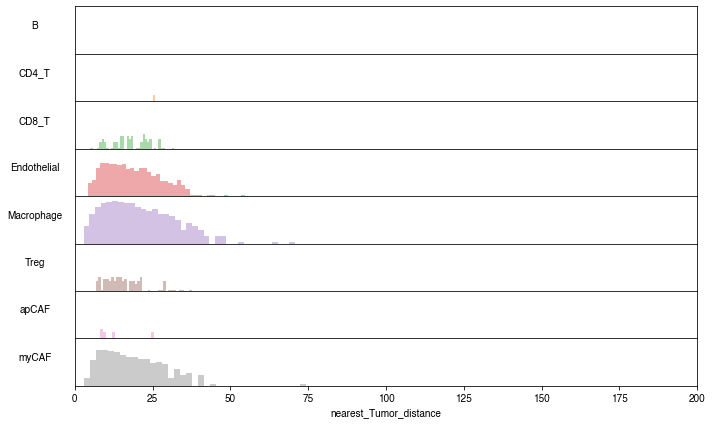

HT061P1_PC


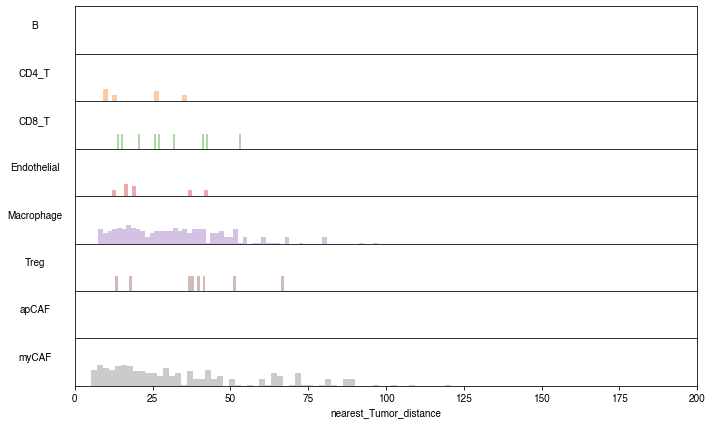

In [175]:
# case = 'HT061P1'
for case in ['HT056P1', 'HT060P1', 'HT061P1']:

# for case in ['HT056P1']:

    no_tumor = adata.copy()[adata.obs['case_id']==case]

    ## exclude low tumor

    mask = [False if s in exclude else True for s in [f'{x}_{y}'
            for x, y in zip(no_tumor.obs['sample_id'], no_tumor.obs['roi'])]]
    no_tumor = no_tumor[mask]

    no_tumor = no_tumor[no_tumor.obs['cell_type']!='Tumor']
    
    sample_ids = sorted(set(no_tumor.obs['sample_id']))
    order = [x for x in sorted(set(adata.obs['cell_type'])) if x not in ['Tumor', 'otherCAF', 'T', 'unknown']]
    
    cell_to_downsample = {}
    for cell_type in order:
        ls = []
        for sample_id in sample_ids:
            filtered = no_tumor.obs[no_tumor.obs['sample_id']==sample_id]
            filtered = filtered[filtered['cell_type']==cell_type]
            ls.append(len(filtered['nearest_Tumor_distance']))
        cell_to_downsample[cell_type] = max(min(ls), 10)
    
    for sample_id in sample_ids:
        
        filtered = no_tumor[no_tumor.obs['sample_id']==sample_id].obs
#         fig, axs = plt.subplots(len(order), 1, figsize=(10, 10))
        fig, axs = plt.subplots(len(order), 1, figsize=(10, 6),gridspec_kw={'hspace': 0, 'wspace': 0})
        print(sample_id)
        
#                                sharex='col', sharey='row',)
        for i, cell_type in enumerate(order):
            
            bins = int(max(filtered['nearest_Tumor_distance']) / 2)
            sampled = filtered[filtered['cell_type']==cell_type]['nearest_Tumor_distance']
#             if len(sampled) > cell_to_downsample[cell_type]:
#                 sampled = np.random.choice(sampled,
#                                            cell_to_downsample[cell_type], replace=False)
            
            sns.distplot(sampled, kde=False,
                              bins=bins, hist=True, color=sns.color_palette()[i], ax=axs[i]
                        )

            axs[i].set_yscale('log')
            axs[i].set_xlim((0, 200))
            axs[i].set_ylim((0, 250))
            axs[i].set_ylabel(cell_type, rotation=0, labelpad=40)
            axs[i].set_yticks([])
            if i != len(order) - 1:
                axs[i].set_xticks([])
                axs[i].set_xlabel(None)
#                 ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.))

        plt.tight_layout()
        plt.savefig(f'./figures/{sample_id}_tumor_distance.pdf')
        plt.show()
#     plt.legend(sorted(set(adata.obs['cell_type'])))

In [145]:
# # case = 'HT061P1'
# for case in ['HT056P1', 'HT060P1', 'HT061P1']:

#     no_tumor = adata.copy()[adata.obs['case_id']==case]

#     ## exclude low tumor

#     mask = [False if s in exclude else True for s in [f'{x}_{y}'
#             for x, y in zip(no_tumor.obs['sample_id'], no_tumor.obs['roi'])]]
#     no_tumor = no_tumor[mask]

#     no_tumor = no_tumor[no_tumor.obs['cell_type']!='Tumor']



#     for cell_type in sorted(set(adata.obs['cell_type'])):
#         if cell_type != 'Tumor':
#             print(cell_type)
#             stacked_histogram(no_tumor[no_tumor.obs['cell_type']==cell_type].obs, 'nearest_Tumor_distance', 'sample_id',
#                      log=True,
#     #                  xlim=(0, max([x for x in no_tumor.obs['nearest_Tumor_distance'] if not pd.isnull(x)])),
#                      xlim=(0, 150), ylim=(0, 250),
#     #                  bins=int(max(no_tumor[no_tumor.obs['cell_type']==cell_type].obs['nearest_Tumor_distance'])/2),
#                               bins=None,
#                      downsample=True)
#             plt.tight_layout()
#             plt.savefig(f'./figures/{case}_{cell_type}_log_tumor_distance.pdf')
#             plt.show()

In [ ]:

# case = 'HT061P1'
# no_tumor = adata[adata.obs['case_id']==case]
# no_tumor = no_tumor[no_tumor.obs['cell_type']!='Tumor']
# for cell_type in sorted(set(adata.obs['cell_type'])):
#     if cell_type != 'Tumor':
#         print(cell_type)
#         for i, sample_id in enumerate(sorted(set(no_tumor.obs['sample_id']))):
#             df = no_tumor[no_tumor.obs['sample_id']==sample_id].obs
#             sns.distplot(df[df['cell_type']==cell_type]['nearest_Tumor_distance'], kde=True,
#                         color=sns.color_palette()[i], hist=True)
#             plt.xlim(0, 700)
#     #         stacked_histogram(no_tumor[no_tumor.obs['cell_type']==cell_type].obs, 'nearest_Tumor_distance', 'sample_id',
#     #                          log=True, xlim=(0, max(no_tumor.obs['nearest_Tumor_distance'])), bins=200)
#         plt.show()

In [ ]:
# mac = adata[adata.obs['cell_type']=='Macrophage']
# mac = mac[~pd.isnull(mac.obs['nearest_Tumor_distance'])]
# sns.distplot(mac[mac.obs['sample_id']=='HT061P1_PC'].obs['nearest_Tumor_distance'], kde=False)

In [ ]:
# stacked_histogram(adata.obs, 'nearest_Tumor_distance', 'roi')

In [ ]:
adata.obs['nearest_Tumor_distance']

###### distance matrix

In [178]:
adata.obs

image_id     sample_id  \
cell_id                                                                  
HT055P1_PA_A1_A4_ROI_01_1        HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_11       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_23       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_25       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_27       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
...                                                  ...           ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03  human_spleen   

                               case_id  roi  Cell Area (µm²) community  \
cell_id                                                                  
HT055P1_PA_A1_A4_ROI_01_1      HT055P1    1            35.75        13   
HT055P1_PA_A1_A4_ROI_01_11     HT055P1    1            51.25        20   
HT055P1_PA_A1_A4_ROI_01_23     HT055P1    1           109.00         5   
HT055P1_PA_A1_A4_ROI_01_25     HT055P1    1            28.50         0   
HT055P1_PA_A1_A4_ROI_01_27     HT055P1    1            44.00         0   
...                                ...  ...              ...       ...   
human_spleen_HT093_ROI_03_926    human    3            82.25        26   
human_spleen_HT093_ROI_03_927    human    3           124.25        26   
human_spleen_HT093_ROI_03_937    human    3            96.50         5   
human_spleen_HT093_ROI_03_942    human    3            42.25        26   
human_spleen_HT093_ROI_03_944    human    3            32.75         1   

                                cell_type_specific caf_subtype   cell_type  \
cell_id                                                                      
HT055P1_PA_A1_A4_ROI_01_1      monocyte/macrophage         nan  Macrophage   
HT055P1_PA_A1_A4_ROI_01_11                    treg         nan        Treg   
HT055P1_PA_A1_A4_ROI_01_23     monocyte/macrophage         nan  Macrophage   
HT055P1_PA_A1_A4_ROI_01_25                     CAF       myCAF       myCAF   
HT055P1_PA_A1_A4_ROI_01_27                     CAF       myCAF       myCAF   
...                                            ...         ...         ...   
human_spleen_HT093_ROI_03_926              unknown         nan     unknown   
human_spleen_HT093_ROI_03_927              unknown         nan     unknown   
human_spleen_HT093_ROI_03_937  monocyte/macrophage         nan  Macrophage   
human_spleen_HT093_ROI_03_942              unknown         nan     unknown   
human_spleen_HT093_ROI_03_944  monocyte/macrophage         nan  Macrophage   

                               XMin  ...      CD8a       PD1    CD45RA  \
cell_id                              ...                                 
HT055P1_PA_A1_A4_ROI_01_1        42  ...  0.018418  0.004006  0.002377   
HT055P1_PA_A1_A4_ROI_01_11      222  ...  0.008161  0.008338  0.002227   
HT055P1_PA_A1_A4_ROI_01_23       90  ...  0.004266  0.001616  0.000955   
HT055P1_PA_A1_A4_ROI_01_25      300  ...  0.019962  0.005336  0.000000   
HT055P1_PA_A1_A4_ROI_01_27      306  ...  0.013362  0.006118  0.000000   
...                             ...  ...       ...       ...       ...   
human_spleen_HT093_ROI_03_926    67  ...  0.030876  0.001925  0.002477   
human_spleen_HT093_ROI_03_927   221  ...  0.021873  0.002342  0.002026   
human_spleen_HT093_ROI_03_937   183  ...  0.005991  0.000674  0.001834   
human_spleen_HT093_ROI_03_942   101  ...  0.099802  0.013212  0.010832   
human_spleen_HT093_ROI_03_944   109  ...  0.056133  0.006951  0.006082   

                               Granzyme B  T1 Collagen     PD-L2       CD3  \
cell_id                                                           

In [185]:
import scipy

In [186]:


X = np.random.random((100,2))
tree = scipy.spatial.KDTree(X)

In [188]:
tree.query((.5, .5), k=1)

(0.01695331538601, 72)

In [189]:
X[72]

array([0.48655655, 0.48967098])

In [207]:
distance_dict = calculate_distance_to_nearest(adata.copy(), cell_type_key='community')
distance_dict

HT061P1_PA_A1_A4_ROI_03
HT056P1_PA_A1_A4_ROI_01
HT056P1_PA_A1_A4_ROI_03
HT081B1_H5_A1_ROI_02
HT060P1_PB_A1_A4_ROI_01
HT056P1_PB_A1_A4_ROI_03
HT055P1_PA_A1_A4_ROI_02
HT068B1_H1_ROI_02
HT068B1_H2_ROI_04
HT065B1_H3_A1_A4_ROI_01
human_spleen_HT093_ROI_02
HT081B1_H5_A4_ROI_02
HT060P1_PA_A1_A4_ROI_02
HT062B1_PB_A1_A4_ROI_01
HT068B1_H2_ROI_05
HT062B1_PB_A1_A4_ROI_02
HT065B1_H3_A1_A4_ROI_02
HT064B1_H9_A1_A4_ROI_02
HT060P1_REMAIN_ROI_02
HT081B1_H5_A4_ROI_03
HT061P1_PC_A1_A4_ROI_01
HT068B1_H2_ROI_01
HT065B1_H1_A4_ROI_02
HT065B1_H1_A4_ROI_01
HT064B1_H1_A1_A4_ROI_01
HT055P1_PA_A1_A4_ROI_05
HT061P1_PB_A1_A4_ROI_03
HT068B1_H1_ROI_01
HT064B1_H7_A1_A4_ROI_02
HT055P1_PA_A1_A4_ROI_04
HT064B1_H1_A1_A4_ROI_03
HT065B1_H1_A1_ROI_01
HT061P1_PC_A1_A4_ROI_03
HT056P1_PA_A1_A4_ROI_02
HT056P1_PB_A1_A4_ROI_01
HT060P1_PB_A1_A4_ROI_04
HT061P1_PB_A1_A4_ROI_02
HT068B1_H2_ROI_02
HT065B1_H7_A1_A4_ROI_01
human_spleen_HT093_ROI_03
HT060P1_PB_A1_A4_ROI_05
HT060P1_REMAIN_ROI_03
HT081B1_H5_A4_ROI_01
HT056P1_PB_A1_A4_ROI_02
H

nearest_0  \
cell_id                                                      
HT055P1_PA_A1_A4_ROI_01_1      HT055P1_PA_A1_A4_ROI_01_336   
HT055P1_PA_A1_A4_ROI_01_11      HT055P1_PA_A1_A4_ROI_01_93   
HT055P1_PA_A1_A4_ROI_01_23     HT055P1_PA_A1_A4_ROI_01_315   
HT055P1_PA_A1_A4_ROI_01_25      HT055P1_PA_A1_A4_ROI_01_25   
HT055P1_PA_A1_A4_ROI_01_27      HT055P1_PA_A1_A4_ROI_01_27   
...                                                    ...   
human_spleen_HT093_ROI_03_926                          NaN   
human_spleen_HT093_ROI_03_927                          NaN   
human_spleen_HT093_ROI_03_937                          NaN   
human_spleen_HT093_ROI_03_942                          NaN   
human_spleen_HT093_ROI_03_944                          NaN   

                               nearest_0_distance  \
cell_id                                             
HT055P1_PA_A1_A4_ROI_01_1              100.900942   
HT055P1_PA_A1_A4_ROI_01_11              77.491935   
HT055P1_PA_A1_A4_ROI_01_23              89.050547   
HT055P1_PA_A1_A4_ROI_01_25               0.000000   
HT055P1_PA_A1_A4_ROI_01_27               0.000000   
...                                           ...   
human_spleen_HT093_ROI_03_926                 NaN   
human_spleen_HT093_ROI_03_927                 NaN   
human_spleen_HT093_ROI_03_937                 NaN   
human_spleen_HT093_ROI_03_942                 NaN   
human_spleen_HT093_ROI_03_944                 NaN   

                                                   nearest_1  \
cell_id                                                        
HT055P1_PA_A1_A4_ROI_01_1        HT055P1_PA_A1_A4_ROI_01_130   
HT055P1_PA_A1_A4_ROI_01_11       HT055P1_PA_A1_A4_ROI_01_318   
HT055P1_PA_A1_A4_ROI_01_23       HT055P1_PA_A1_A4_ROI_01_263   
HT055P1_PA_A1_A4_ROI_01_25       HT055P1_PA_A1_A4_ROI_01_318   
HT055P1_PA_A1_A4_ROI_01_27       HT055P1_PA_A1_A4_ROI_01_318   
...                                                      ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03_944   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03_904   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03_904   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03_944   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03_944   

                               nearest_1_distance  \
cell_id                                             
HT055P1_PA_A1_A4_ROI_01_1               41.880783   
HT055P1_PA_A1_A4_ROI_01_11              88.141931   
HT055P1_PA_A1_A4_ROI_01_23              72.006944   
HT055P1_PA_A1_A4_ROI_01_25             112.805142   
HT055P1_PA_A1_A4_ROI_01_27             116.777566   
...                                           ...   
human_spleen_HT093_ROI_03_926           42.190046   
human_spleen_HT093_ROI_03_927           51.662365   
human_spleen_HT093_ROI_03_937           18.439089   
human_spleen_HT093_ROI_03_942            8.000000   
human_spleen_HT093_ROI_03_944            0.000000   

                                                nearest_10  \
cell_id                                                      
HT055P1_PA_A1_A4_ROI_01_1      HT055P1_PA_A1_A4_ROI_01_469   
HT055P1_PA_A1_A4_ROI_01_11     HT055P1_PA_A1_A4_ROI_01_469   
HT055P1_PA_A1_A4_ROI_01_23     HT055P1_PA_A1_A4_ROI_01_469   
HT055P1_PA_A1_A4_ROI_01_25     HT055P1_PA_A1_A4_ROI_01_469   
HT055P1_PA_A1_A4_ROI_01_27     HT055P1_PA_A1_A4_ROI_01_469   
...                                                    ...   
human_spleen_HT093_ROI_03_926                          NaN   
human_spleen_HT093_ROI_03_927                          NaN   
human_spleen_HT093_ROI_03_937                          NaN   
human_spleen_HT093_ROI_03_942                          NaN   
human_spleen_HT093_ROI_03_944                          NaN   

                               nearest_10_distance nearest_11  \
cell_id                                                         
HT055P1_PA_A1_A4_ROI_01_1               266.552059        NaN   
HT055P1_PA_A1_A4_ROI_01_11 

In [208]:
adata.obs = pd.merge(adata.obs, distance_dict, left_index=True, right_index=True)
adata.obs

image_id     sample_id  \
cell_id                                                                  
HT055P1_PA_A1_A4_ROI_01_1        HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_11       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_23       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_25       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_27       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
...                                                  ...           ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03  human_spleen   

                               case_id  roi  Cell Area (µm²) community  \
cell_id                                                                  
HT055P1_PA_A1_A4_ROI_01_1      HT055P1    1            35.75        13   
HT055P1_PA_A1_A4_ROI_01_11     HT055P1    1            51.25        20   
HT055P1_PA_A1_A4_ROI_01_23     HT055P1    1           109.00         5   
HT055P1_PA_A1_A4_ROI_01_25     HT055P1    1            28.50         0   
HT055P1_PA_A1_A4_ROI_01_27     HT055P1    1            44.00         0   
...                                ...  ...              ...       ...   
human_spleen_HT093_ROI_03_926    human    3            82.25        26   
human_spleen_HT093_ROI_03_927    human    3           124.25        26   
human_spleen_HT093_ROI_03_937    human    3            96.50         5   
human_spleen_HT093_ROI_03_942    human    3            42.25        26   
human_spleen_HT093_ROI_03_944    human    3            32.75         1   

                                cell_type_specific caf_subtype   cell_type  \
cell_id                                                                      
HT055P1_PA_A1_A4_ROI_01_1      monocyte/macrophage         nan  Macrophage   
HT055P1_PA_A1_A4_ROI_01_11                    treg         nan        Treg   
HT055P1_PA_A1_A4_ROI_01_23     monocyte/macrophage         nan  Macrophage   
HT055P1_PA_A1_A4_ROI_01_25                     CAF       myCAF       myCAF   
HT055P1_PA_A1_A4_ROI_01_27                     CAF       myCAF       myCAF   
...                                            ...         ...         ...   
human_spleen_HT093_ROI_03_926              unknown         nan     unknown   
human_spleen_HT093_ROI_03_927              unknown         nan     unknown   
human_spleen_HT093_ROI_03_937  monocyte/macrophage         nan  Macrophage   
human_spleen_HT093_ROI_03_942              unknown         nan     unknown   
human_spleen_HT093_ROI_03_944  monocyte/macrophage         nan  Macrophage   

                               XMin  ...                      nearest_5  \
cell_id                              ...                                  
HT055P1_PA_A1_A4_ROI_01_1        42  ...     HT055P1_PA_A1_A4_ROI_01_23   
HT055P1_PA_A1_A4_ROI_01_11      222  ...     HT055P1_PA_A1_A4_ROI_01_23   
HT055P1_PA_A1_A4_ROI_01_23       90  ...     HT055P1_PA_A1_A4_ROI_01_23   
HT055P1_PA_A1_A4_ROI_01_25      300  ...    HT055P1_PA_A1_A4_ROI_01_359   
HT055P1_PA_A1_A4_ROI_01_27      306  ...    HT055P1_PA_A1_A4_ROI_01_359   
...                             ...  ...                            ...   
human_spleen_HT093_ROI_03_926    67  ...  human_spleen_HT093_ROI_03_828   
human_spleen_HT093_ROI_03_927   221  ...  human_spleen_HT093_ROI_03_937   
human_spleen_HT093_ROI_03_937   183  ...  human_spleen_HT093_ROI_03_937   
human_spleen_HT093_ROI_03_942   101  ...  human_spleen_HT093_ROI_03_828   
human_spleen_HT093_ROI_03_944   109  ...  human_spleen_HT093_ROI_03_828   

                               nearest_5_distance  \
cell_id                                             
HT055P1_PA_A1_A4_ROI_01_1

In [227]:
def construct_distance_matrix(adata, cell_type_key='cell_type', metric=np.mean):
    order = sorted(set(adata.obs[cell_type_key]))
    distance_cols = [f'nearest_{cell_type}_distance' for cell_type in order]
    cols = [cell_type_key]
    cols += distance_cols
    df = adata.obs[cols]
    
    cell_type_to_distance = {ct:{} for ct in order}
    for cell_type in order:
        cell_type_df = df[df[cell_type_key]==cell_type]
        for distance_type in [c for c in distance_cols if cell_type not in c]:
            identifier = re.sub(r'^nearest_(.*)_distance$', r'\1', distance_type)
#             print(identifier)
            distances = [d for d in cell_type_df[distance_type] if not pd.isnull(d)]
            cell_type_to_distance[cell_type][identifier] = metric(distances)
    data = []
    for c1 in order:
        data.append([cell_type_to_distance[c1].get(c2, np.nan) for c2 in order])
    return pd.DataFrame(data=data, columns=order, index=order)
            
#         for cell_type_2 in order:
#             cell_type_2_df = df[df['cell_type']==cell_type_2]
            

Text(0.5, 15.0, 'to nearest')

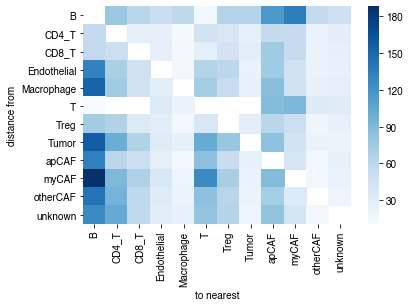

In [232]:
matrix = construct_distance_matrix(adata, cell_type_key='cell_type', metric=np.median)
sns.heatmap(matrix, cmap='Blues')
plt.ylabel('distance from')
plt.xlabel('to nearest')

Text(0.5, 15.0, 'to nearest')

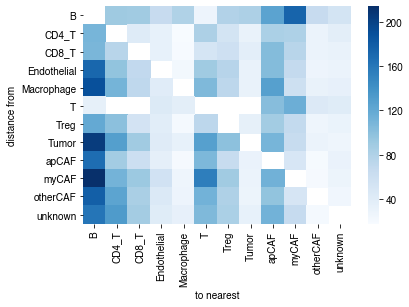

In [231]:
matrix = construct_distance_matrix(adata, cell_type_key='cell_type', metric=np.mean)
sns.heatmap(matrix, cmap='Blues')
plt.ylabel('distance from')
plt.xlabel('to nearest')

Text(0.5, 15.0, 'to')

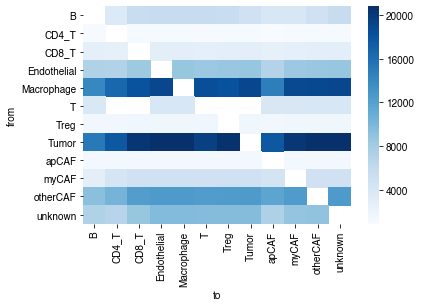

In [230]:
matrix = construct_distance_matrix(adata, cell_type_key='cell_type', metric=len)
sns.heatmap(matrix, cmap='Blues')
plt.ylabel('from')
plt.xlabel('to')

In [ ]:
color_map 

In [225]:
cell_type_specific_to_community

{'1': 'monocyte/macrophage',
 '5': 'monocyte/macrophage',
 '13': 'monocyte/macrophage',
 '27': 'monocyte/macrophage',
 '16': 'monocyte/macrophage_ki67+',
 '14': 'cd8_t_cell',
 '22': 'cd4_t_cell',
 '7': 't_cell',
 '20': 'treg',
 '8': 'tumor',
 '11': 'tumor',
 '12': 'tumor',
 '9': 'tumor_pdl1+',
 '17': 'tumor_pdl1+',
 '10': 'tumor_ki67+',
 '19': 'tumor_ki67+',
 '0': 'CAF',
 '2': 'CAF',
 '23': 'CAF',
 '3': 'endothelial',
 '15': 'endothelial',
 '6': 'b_cell',
 '25': 'b_cell',
 '24': 'b_cell_ki67+',
 '18': 'lag3+',
 '21': 'lag3+',
 '28': 'pd1+',
 '4': 'unknown',
 '26': 'unknown',
 '29': 'unknown'}

Text(0.5, 15.0, 'to')

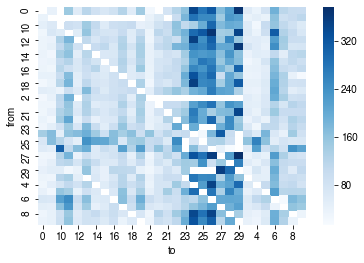

In [224]:
matrix = construct_distance_matrix(adata, cell_type_key='community', metric=np.mean)
sns.heatmap(matrix, cmap='Blues')
plt.ylabel('from')
plt.xlabel('to')

In [214]:
matrix

B  CD4_T  CD8_T  Endothelial  Macrophage   T  Treg  Tumor  \
B           NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
CD4_T       NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
CD8_T       NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
Endothelial NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
Macrophage  NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
T           NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
Treg        NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
Tumor       NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
apCAF       NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
myCAF       NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
otherCAF    NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   
unknown     NaN    NaN    NaN          NaN         NaN NaN   NaN    NaN   

             apCAF  myCAF  otherCAF  unknown  
B              NaN    NaN       NaN      NaN  
CD4_T          NaN    NaN       NaN      NaN  
CD8_T          NaN    NaN       NaN      NaN  
Endothelial    NaN    NaN       NaN      NaN  
Macrophage     NaN    NaN       NaN      NaN  
T              NaN    NaN       NaN      NaN  
Treg           NaN    NaN       NaN      NaN  
Tumor          NaN    NaN       NaN      NaN  
apCAF          NaN    NaN       NaN      NaN  
myCAF          NaN    NaN       NaN      NaN  
otherCAF       NaN    NaN       NaN      NaN  
unknown        NaN    NaN       NaN      NaN

###### single cell correlations

###### gene expression

In [268]:
df = pd.read_csv('/Users/erikstorrs/Downloads/HTAN_PDAC_fpkm_uq_log2+1_filtered.tsv',
                sep='\t', index_col='Gene')
df.columns = [c.replace('_S1', '_') for c in df.columns]
df.columns = [c.replace('_R1', '_REMAIN') for c in df.columns]
df = df[[c for c in sorted(set((adata.obs['sample_id']))) if c in df.columns]]
df = df.transpose()
df

Gene            DDX11L1  WASH7P  MIR6859-1  MIR1302-2HG  FAM138A  OR4G4P  \
HT056P1_PA        12.69   16.68      16.10        10.87     0.00   10.15   
HT056P1_PB        12.51   15.06       0.00         0.00     9.57    0.00   
HT060P1_PA        10.71   15.37      14.80         0.00     0.00    0.00   
HT060P1_PB        11.11   15.64      15.78        10.87     0.00    0.00   
HT060P1_REMAIN    11.67   15.38      15.12         0.00    10.96    0.00   
HT061P1_PB        11.42   15.99       0.00         0.00     0.00    0.00   
HT061P1_PC        11.21   15.57      13.89         0.00     0.00    0.00   

Gene            OR4G11P  OR4F5  AL627309.1  CICP27  ...  MT-ND4  MT-TH  \
HT056P1_PA         0.00    0.0        9.01   10.97  ...   28.45  13.76   
HT056P1_PB         9.35    0.0        7.96   10.92  ...   28.69  16.29   
HT060P1_PA         0.00    0.0        8.03    9.58  ...   28.09  14.78   
HT060P1_PB         0.00    0.0       10.81   10.78  ...   28.23  14.76   
HT060P1_REMAIN     0.00    0.0        8.77    9.73  ...   28.10  13.52   
HT061P1_PB         0.00    0.0        8.32   12.19  ...   28.77  15.66   
HT061P1_PC         0.00    0.0       10.70   12.66  ...   28.96   0.00   

Gene            MT-TS2  MT-TL2  MT-ND5  MT-ND6  MT-TE  MT-CYB  MT-TT  MT-TP  
HT056P1_PA       15.98   14.72   27.06   26.75  18.71   27.40  15.82  24.29  
HT056P1_PB       13.93   16.25   26.76   26.61  17.51   27.36  17.86  24.43  
HT060P1_PA        0.00    0.00   27.06   26.97  19.07   27.64  14.84  24.12  
HT060P1_PB        0.00    0.00   27.20   27.19  20.08   27.82  13.82  24.32  
HT060P1_REMAIN    0.00    0.00   27.08   27.12  20.09   27.64   0.00  24.26  
HT061P1_PB        0.00   14.03   27.32   27.62  19.72   27.12  16.72  24.54  
HT061P1_PC        0.00    0.00   27.36   27.36  17.32   26.94   0.00  25.07  

[7 rows x 57854 columns]

In [269]:
to_check = {
 'SMA': ['ACTA2'],
 'Vimentin': ['VIM'],
 'CD163': ['CD163'],
 'PanKeratin': ['KRT6A', 'KRT18'],
 'CD11b': ['ITGAM'],
 'PD-L1': ['CD274'],
 'CD31': ['PECAM1'],
 'CD45': ['PTPRC'],
 'Lag3': ['LAG3'],
 'FoxP3': ['FOXP3'],
 'CD4': ['CD4'],
 'Ecadherin': ['EPCAM'],
 'CD68': ['CD68'],
 'CD20': ['MS4A1'],
 'CD8a': ['CD8A'],
 'PD1': ['PDCD1'],
 'Granzyme B': ['GZMB'],
 'T1 Collagen': ['COL1A1'],
 'PD-L2': ['PDCD1LG2'],
 'CD3': ['CD3G'],
 'Ki67': ['MKI67'],
 'HLADR': ['HLA-DRA']
}
to_check = [v for k, vs in to_check.items() for v in vs]
df = df[to_check]
df

Gene            ACTA2    VIM  CD163  KRT6A  KRT18  ITGAM  CD274  PECAM1  \
HT056P1_PA      18.95  21.46  20.34  23.59  21.23  18.08  14.99   18.69   
HT056P1_PB      19.39  21.91  21.19  23.76  20.51  18.20  15.55   20.10   
HT060P1_PA      21.40  21.03  19.78  18.37  20.24  17.90  14.82   20.01   
HT060P1_PB      20.61  20.40  19.09  16.49  20.50  17.33  14.95   19.69   
HT060P1_REMAIN  21.44  21.11  19.85  18.37  19.63  17.81  15.02   20.07   
HT061P1_PB      20.46  19.28  17.20  14.62  20.44  16.36  15.03   18.36   
HT061P1_PC      19.92  18.92  16.98  14.48  20.56  16.24  14.18   17.67   

Gene            PTPRC   LAG3  ...   CD68  MS4A1   CD8A  PDCD1   GZMB  COL1A1  \
HT056P1_PA      18.41  15.64  ...  11.11   9.65  15.18  14.53  16.43   23.66   
HT056P1_PB      18.63  15.63  ...  11.32  11.50  15.51  15.24  16.94   23.86   
HT060P1_PA      18.51  14.12  ...  12.51  12.06  15.59  14.58  14.60   25.44   
HT060P1_PB      18.11  14.59  ...  11.96  13.17  15.51  14.48  13.86   24.63   
HT060P1_REMAIN  18.73  14.54  ...  10.13  13.93  16.50  15.24  14.72   24.99   
HT061P1_PB      16.90  12.41  ...  11.42   7.97  13.88  13.39  14.24   23.45   
HT061P1_PC      16.03  11.98  ...   9.90   7.76  13.05  12.53  10.51   23.46   

Gene            PDCD1LG2   CD3G  MKI67  HLA-DRA  
HT056P1_PA         16.35  13.35  19.02    23.91  
HT056P1_PB         16.66  13.37  19.74    24.09  
HT060P1_PA         16.10  15.03  16.87    24.73  
HT060P1_PB         15.68  15.20  16.76    24.16  
HT060P1_REMAIN     16.11  15.26  16.54    24.55  
HT061P1_PB         14.39  12.73  17.81    23.10  
HT061P1_PC         13.63  11.98  17.65    22.01  

[7 rows x 23 columns]

In [270]:
# sorted(set((adata.obs['sample_id'])))

In [271]:
# list(df.columns)

In [272]:
import scipy

In [273]:
samples = df.index
samples

Index(['HT056P1_PA', 'HT056P1_PB', 'HT060P1_PA', 'HT060P1_PB',
       'HT060P1_REMAIN', 'HT061P1_PB', 'HT061P1_PC'],
      dtype='object')

In [274]:
list(adata.obs.columns)

['image_id',
 'sample_id',
 'case_id',
 'roi',
 'Cell Area (µm²)',
 'community',
 'cell_type_specific',
 'caf_subtype',
 'cell_type',
 'XMin',
 'XMax',
 'YMin',
 'YMax',
 'X',
 'Y',
 'nearest_B',
 'nearest_B_distance',
 'nearest_CD4_T',
 'nearest_CD4_T_distance',
 'nearest_CD8_T',
 'nearest_CD8_T_distance',
 'nearest_Endothelial',
 'nearest_Endothelial_distance',
 'nearest_Macrophage',
 'nearest_Macrophage_distance',
 'nearest_T',
 'nearest_T_distance',
 'nearest_Treg',
 'nearest_Treg_distance',
 'nearest_Tumor',
 'nearest_Tumor_distance',
 'nearest_apCAF',
 'nearest_apCAF_distance',
 'nearest_myCAF',
 'nearest_myCAF_distance',
 'nearest_otherCAF',
 'nearest_otherCAF_distance',
 'nearest_unknown',
 'nearest_unknown_distance',
 'SMA',
 'Vimentin',
 'CD163',
 'PanKeratin',
 'CD11b',
 'PD-L1',
 'CD31',
 'CD45',
 'Lag3',
 'CD11c',
 'FoxP3',
 'CD4',
 'Ecadherin',
 'CD68',
 'CD20',
 'CD8a',
 'PD1',
 'CD45RA',
 'Granzyme B',
 'T1 Collagen',
 'PD-L2',
 'CD3',
 'Ki67',
 'CD45RO',
 'HLADR']

In [275]:
intensity_df = adata.obs[['sample_id',
                          'SMA',
 'Vimentin',
 'CD163',
 'PanKeratin',
 'CD11b',
 'PD-L1',
 'CD31',
 'CD45',
 'Lag3',
 'CD11c',
 'FoxP3',
 'CD4',
 'Ecadherin',
 'CD68',
 'CD20',
 'CD8a',
 'PD1',
 'CD45RA',
 'Granzyme B',
 'T1 Collagen',
 'PD-L2',
 'CD3',
 'Ki67',
 'CD45RO',
 'HLADR']]
intensity_df = intensity_df.groupby(by='sample_id').mean()
intensity_df = intensity_df.loc[samples]
intensity_df

SMA  Vimentin     CD163  PanKeratin     CD11b     PD-L1  \
sample_id                                                                      
HT056P1_PA      0.053544  0.032809  0.022429    0.004585  0.010744  0.007977   
HT056P1_PB      0.065357  0.046286  0.023697    0.019334  0.014434  0.011953   
HT060P1_PA      0.050171  0.033565  0.011865    0.037898  0.010006  0.008944   
HT060P1_PB      0.058809  0.041226  0.015888    0.030769  0.012087  0.009717   
HT060P1_REMAIN  0.046688  0.025751  0.017438    0.009826  0.012220  0.005946   
HT061P1_PB      0.067870  0.039072  0.014026    0.043669  0.018108  0.010376   
HT061P1_PC      0.068500  0.030803  0.013215    0.023738  0.013210  0.009182   

                    CD31      CD45      Lag3     CD11c  ...      CD8a  \
sample_id                                               ...             
HT056P1_PA      0.014259  0.030758  0.016796  0.020571  ...  0.018560   
HT056P1_PB      0.017538  0.035145  0.022039  0.030488  ...  0.023252   
HT060P1_PA      0.011671  0.031581  0.013919  0.021812  ...  0.010219   
HT060P1_PB      0.013267  0.031746  0.017844  0.024485  ...  0.011923   
HT060P1_REMAIN  0.017034  0.030413  0.008733  0.013847  ...  0.008841   
HT061P1_PB      0.016452  0.035508  0.018755  0.029514  ...  0.014824   
HT061P1_PC      0.012200  0.023968  0.019157  0.026011  ...  0.011464   

                     PD1    CD45RA  Granzyme B  T1 Collagen     PD-L2  \
sample_id                                                               
HT056P1_PA      0.005450  0.001606    0.028067     0.056414  0.010966   
HT056P1_PB      0.006105  0.002381    0.037054     0.065145  0.012888   
HT060P1_PA      0.003935  0.001605    0.030301     0.056243  0.010596   
HT060P1_PB      0.004374  0.001887    0.032722     0.061316  0.014263   
HT060P1_REMAIN  0.003531  0.001789    0.031083     0.045491  0.008103   
HT061P1_PB      0.005720  0.002958    0.042568     0.064863  0.015232   
HT061P1_PC      0.005498  0.002053    0.030287     0.070887  0.010875   

                     CD3      Ki67    CD45RO     HLADR  
sample_id                                               
HT056P1_PA      0.029164  0.007461  0.029458  0.039658  
HT056P1_PB      0.034032  0.010649  0.033526  0.044695  
HT060P1_PA      0.024193  0.007736  0.030648  0.039044  
HT060P1_PB      0.025630  0.006959  0.030605  0.043787  
HT060P1_REMAIN  0.028692  0.007531  0.029455  0.027308  
HT061P1_PB      0.030332  0.013586  0.034079  0.042534  
HT061P1_PC      0.025460  0.007501  0.022068  0.034384  

[7 rows x 25 columns]

In [222]:
# from sklearn.covariance import EllipticEnvelope

In [388]:
def plot_grouped_scatter(df1, df2, mask=None, remove_outliers=False, figsize=(20, 15)):
    markers, genes = df1.columns, df2.columns
    fig, axs = plt.subplots(len(markers), len(genes),
                            figsize=figsize, gridspec_kw={'hspace': .1, 'wspace': .1})
    palette = [x for ps in [sns.color_palette('tab20'), sns.color_palette('tab20b'), sns.color_palette('tab20c')]
              for x in ps]
    for i, marker in enumerate(markers):
        for j, gene in enumerate(genes):

            ax = axs if len(markers) == 1 and len(genes) == 1 else axs[i][j]
            ax.scatter(df2[gene], df1[marker], color=palette[j])
            ax.set_xticks([])
            ax.set_yticks([])
            if j == 0: ax.set_ylabel(marker, rotation=0, labelpad=30)
            if i == len(markers)-1: ax.set_xlabel(gene, rotation=90)

            m, b = np.polyfit(df2[gene], df1[marker], 1)
            ax.plot(df2[gene], m*df2[gene] + b, '-', color='gray')
            if mask is not None and mask[i, j]:
                plt.setp(ax.spines.values(), color='red', linewidth=3)
#                 for i in ax.spines.itervalues(): [i.set_linewidth(0.1) for i in ax.spines.itervalues()]

    return fig, axs
import matplotlib.patches as mpatches
def plot_grouped_scatter_by_celltype(df1, df2, cell_types,
                                     mask=None, remove_outliers=False, figsize=(20, 15)):
    markers, genes = df1.columns, df2.columns
    fig, axs = plt.subplots(len(markers), len(genes),
                            figsize=figsize, gridspec_kw={'hspace': .1, 'wspace': .1})
    palette = [x for ps in [sns.color_palette('tab20'), sns.color_palette('tab20b'), sns.color_palette('tab20c')]
              for x in ps]
    order = sorted(set(cell_types))
    patches = [mpatches.Patch(color=palette[i], label=c)
              for i, c in enumerate(order)]

    for i, marker in enumerate(markers):
        for j, gene in enumerate(genes):
#             p_df = pd.merge(df1, df2, right_index=True, left_index=True)
#             p_df['cell_type'] = cell_types
            ax = axs if len(markers) == 1 and len(genes) == 1 else axs[i][j]
#             sns.scatterplot(y=marker, x=gene, data=p_df, hue='cell_type', ax=ax)
            ax.scatter(df2[gene], df1[marker], color=[palette[order.index(c)] for c in cell_types])
            ax.set_xticks([])
            ax.set_yticks([])
            if j == 0: ax.set_ylabel(marker, rotation=0, labelpad=30)
            if i == len(markers)-1: ax.set_xlabel(gene, rotation=90)
#             if j == len(genes) - 1 and i == len(markers) - 1:
#                 ax.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.5, 1.))

            m, b = np.polyfit(df2[gene], df1[marker], 1)
            ax.plot(df2[gene], m*df2[gene] + b, '-', color='gray')
            if mask is not None and mask[i, j]:
                plt.setp(ax.spines.values(), color='red', linewidth=3)
#                 for i in ax.spines.itervalues(): [i.set_linewidth(0.1) for i in ax.spines.itervalues()]

    return fig, axs, patches

In [324]:
def get_correlations(df1, df2, fdr=True):

    corr_dict = {}
    for marker in df1.columns:
        corr_dict[marker] = {}
        for gene in df2.columns:
            xs, ys = zip(*[(x, y) for x, y in zip(df2[gene], df1[marker])
                          if not pd.isnull(x)
                          if not pd.isnull(y)])
            corr, pval = scipy.stats.pearsonr(xs, ys)
            corr_dict[marker][gene] = (corr, pval)
    if fdr:    
        for marker, c_dict in corr_dict.items():
            genes, vals = zip(*sorted([(k, v) for k, v in c_dict.items()],
                       key=lambda x: x[1]))
            corrs, pvals = zip(*vals)
            pvals = multitest.multipletests(pvals)[1]
            for i, gene in enumerate(genes):
                corr_dict[marker][gene] = (corrs[i], pvals[i])
    return corr_dict


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


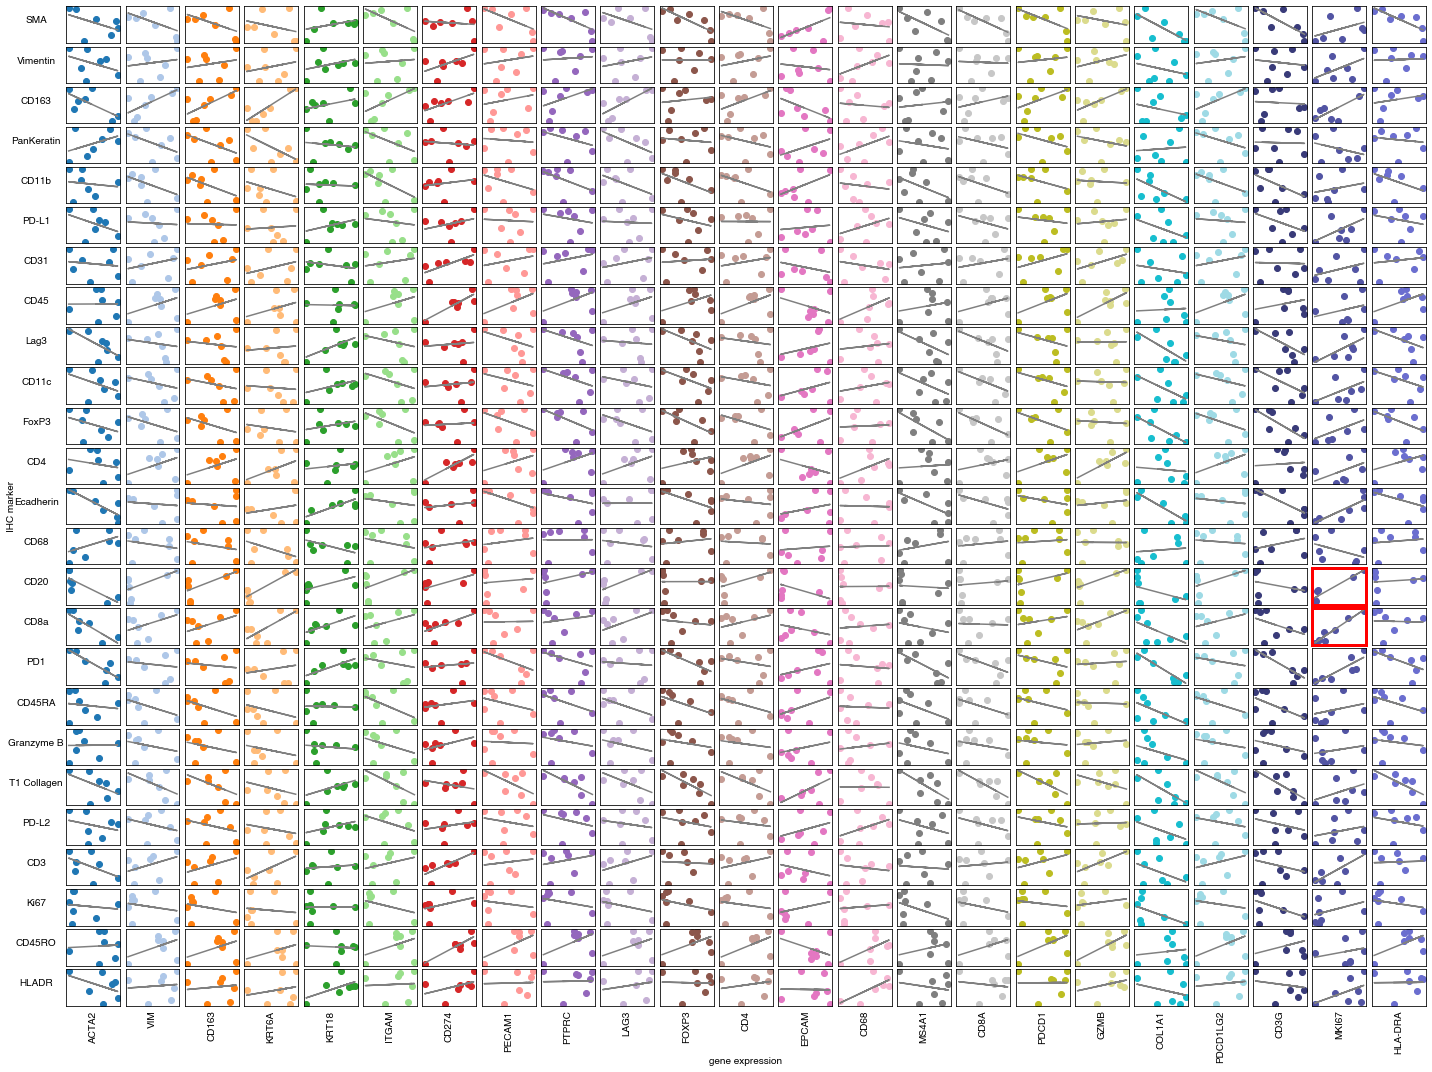

In [279]:
corr_dict = get_correlations(intensity_df, df, fdr=True)
mask = np.full((intensity_df.shape[1], df.shape[1]), False)
for i, c1 in enumerate(intensity_df.columns):
    for j, c2 in enumerate(df.columns):
        mask[i, j] = True if corr_dict[c1][c2][1] < .05 else False

fig, axs = plot_grouped_scatter(intensity_df, df, mask=mask)
fig.add_subplot(111, frameon=False)
plt.xlabel('gene expression', labelpad=50)
plt.ylabel('IHC marker', labelpad=50)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('figures/bulk_rnaseq_correlation_with_imh_imaging.pdf')

###### proteins

In [291]:
# Counter(adata.obs[adata.obs['cell_type']=='Tumor']['image_id']).most_common()

In [280]:
df = pd.read_csv('/Users/erikstorrs/Downloads/HTAN_PDAC_singleshot_log2_ratios-MD_norm_Formatted_NA20_Dedup_Filtered.tsv',
                sep='\t', index_col='Gene')
df.columns = [c.replace('_S1', '_') for c in df.columns]
df.columns = [c.replace('_R1', '_REMAIN') for c in df.columns]
df = df[[c for c in sorted(set((adata.obs['sample_id']))) if c in df.columns]]
df = df.transpose()
df

Gene                SOD2    TP53I3     MYO1C      RPL6       ANG     RPL27  \
HT056P1_PA      0.581362  0.084524 -0.584934  0.296165 -0.935809  0.204109   
HT056P1_PB     -0.175876  0.170770 -0.239735  0.436036 -0.761529  0.252993   
HT060P1_PA      0.343346 -0.036546  0.095551  0.154337 -0.067187  0.001884   
HT060P1_PB      0.346160  0.095344  0.072698  0.030048  0.052731  0.109454   
HT060P1_REMAIN  0.558677 -0.216508  0.094679 -0.046624 -0.115387  0.035286   
HT061P1_PA     -0.207402  0.524177  0.032992 -0.152311  0.519462 -0.158027   
HT061P1_PB     -0.319053  0.480434 -0.154552 -0.285847  0.332233  0.004721   
HT061P1_PC     -0.722509  0.450879 -0.077566 -0.179307  0.416395 -0.096087   

Gene              EIF4G1    SP140L    NAP1L1     RPL12  ...     MAT2B  \
HT056P1_PA      0.266697  0.112900 -0.238053  0.060337  ...  0.030493   
HT056P1_PB      0.454095 -0.293749 -0.252084  0.166552  ... -0.029233   
HT060P1_PA      0.134441 -0.084636 -0.127654 -0.025300  ...  0.097075   
HT060P1_PB      0.065226 -0.002116  0.127803 -0.023014  ...  0.018842   
HT060P1_REMAIN  0.118186 -0.478557  0.143147  0.111241  ...  0.065179   
HT061P1_PA     -0.161943       NaN -0.258304  0.081887  ...  0.188697   
HT061P1_PB     -0.209619       NaN -0.230868 -0.018046  ...  0.301246   
HT061P1_PC      0.055229       NaN -0.541423 -0.040286  ...  0.191447   

Gene               PLOD1     PARVA     NUCB2  ATP6V1C1     PLOD2    RPL18A  \
HT056P1_PA      0.686004 -0.381191  0.057051  0.192602  1.159632  0.630162   
HT056P1_PB      0.386186 -0.285889  0.165850  0.097185  0.524934  0.581402   
HT060P1_PA     -0.287858  0.039280  0.002781  0.235114 -0.675119 -0.022665   
HT060P1_PB     -0.107635  0.037465  0.083428  0.138387 -0.501059  0.082786   
HT060P1_REMAIN -0.067102 -0.195540 -0.153582  0.090458 -0.457473  0.042533   
HT061P1_PA     -0.318915 -0.147222  0.427142 -0.095416 -0.227518  0.138571   
HT061P1_PB     -0.142601 -0.053965 -0.074168  0.168096  0.054281  0.152848   
HT061P1_PC     -0.181225 -0.094598  0.026869 -0.173989  0.101559  0.169840   

Gene                RALA    ATP5PO    CAVIN1  
HT056P1_PA      0.195814 -0.117646 -0.866665  
HT056P1_PB      0.103850 -0.079616 -0.608652  
HT060P1_PA     -0.016617  0.124569  0.285198  
HT060P1_PB      0.004623  0.163163  0.371888  
HT060P1_REMAIN -0.271798  0.206691  0.391244  
HT061P1_PA      0.179692 -0.003583 -0.809306  
HT061P1_PB      0.769034  0.147900 -0.824937  
HT061P1_PC      0.787334 -0.011508 -0.931006  

[8 rows x 2020 columns]

In [281]:
'LAG3' in df.columns

False

In [282]:
to_check = {
 'SMA': ['ACTA2'],
 'Vimentin': ['VIM'],
 'CD163': ['CD163'],
 'PanKeratin': ['KRT6A', 'KRT18'],
 'CD11b': ['ITGAM'],
 'PD-L1': ['CD274'],
 'CD31': ['PECAM1'],
 'CD45': ['PTPRC'],
 'Lag3': ['LAG3'],
 'FoxP3': ['FOXP3'],
 'CD4': ['CD4'],
 'Ecadherin': ['EPCAM'],
 'CD68': ['CD68'],
 'CD20': ['MS4A1'],
 'CD8a': ['CD8A'],
 'PD1': ['PDCD1'],
 'Granzyme B': ['GZMB'],
 'T1 Collagen': ['COL1A1'],
 'PD-L2': ['PDCD1LG2'],
 'CD3': ['CD3G'],
 'Ki67': ['MKI67'],
 'HLADR': ['HLA-DRA']
}
to_check = [v for k, vs in to_check.items() for v in vs if v in df.columns]
df = df[to_check]
df

Gene               ACTA2       VIM     CD163     KRT6A     KRT18     ITGAM  \
HT056P1_PA     -0.569833  0.182777  0.934980  1.624232  0.110697  0.649509   
HT056P1_PB     -0.167116  0.358662  0.810387  1.708137 -0.020745  0.431657   
HT060P1_PA      0.024960  0.104485 -0.007949 -0.648744  0.184698  0.102012   
HT060P1_PB     -0.029360  0.165582  0.018968 -0.447843 -0.022134 -0.213885   
HT060P1_REMAIN -0.218132  0.286927  0.100822 -0.626810 -0.101349 -0.109941   
HT061P1_PA     -0.428294 -0.562772 -0.314008 -2.094813  0.439724 -0.260188   
HT061P1_PB     -0.397904 -0.713902 -0.481882 -2.556889  0.090280  0.073434   
HT061P1_PC      0.012455 -0.820136 -0.358823 -1.983029 -0.094276  0.141388   

Gene               PTPRC     EPCAM    COL1A1   HLA-DRA  
HT056P1_PA      0.131878 -0.700947 -0.586193  0.186881  
HT056P1_PB      0.123776 -0.589812 -0.422259  0.069570  
HT060P1_PA      0.025973 -0.141655  0.547845  0.627443  
HT060P1_PB      0.058755 -0.323606  0.882751  0.380863  
HT060P1_REMAIN -0.070549 -0.545445  0.172658  0.144846  
HT061P1_PA           NaN  0.558910 -0.174182  0.178255  
HT061P1_PB           NaN  0.953513 -0.456426 -0.075268  
HT061P1_PC           NaN  1.276728 -0.009864 -0.267529

In [283]:
# list(adata.obs.columns)

In [284]:
intensity_df = adata.obs[['sample_id',
                          'SMA',
 'Vimentin',
 'CD163',
 'PanKeratin',
 'CD11b',
 'PD-L1',
 'CD31',
 'CD45',
 'Lag3',
 'CD11c',
 'FoxP3',
 'CD4',
 'Ecadherin',
 'CD68',
 'CD20',
 'CD8a',
 'PD1',
 'CD45RA',
 'Granzyme B',
 'T1 Collagen',
 'PD-L2',
 'CD3',
 'Ki67',
 'CD45RO',
 'HLADR']]
intensity_df = intensity_df.groupby(by='sample_id').mean()
intensity_df = intensity_df.loc[samples]
intensity_df

SMA  Vimentin     CD163  PanKeratin     CD11b     PD-L1  \
sample_id                                                                      
HT056P1_PA      0.053544  0.032809  0.022429    0.004585  0.010744  0.007977   
HT056P1_PB      0.065357  0.046286  0.023697    0.019334  0.014434  0.011953   
HT060P1_PA      0.050171  0.033565  0.011865    0.037898  0.010006  0.008944   
HT060P1_PB      0.058809  0.041226  0.015888    0.030769  0.012087  0.009717   
HT060P1_REMAIN  0.046688  0.025751  0.017438    0.009826  0.012220  0.005946   
HT061P1_PB      0.067870  0.039072  0.014026    0.043669  0.018108  0.010376   
HT061P1_PC      0.068500  0.030803  0.013215    0.023738  0.013210  0.009182   

                    CD31      CD45      Lag3     CD11c  ...      CD8a  \
sample_id                                               ...             
HT056P1_PA      0.014259  0.030758  0.016796  0.020571  ...  0.018560   
HT056P1_PB      0.017538  0.035145  0.022039  0.030488  ...  0.023252   
HT060P1_PA      0.011671  0.031581  0.013919  0.021812  ...  0.010219   
HT060P1_PB      0.013267  0.031746  0.017844  0.024485  ...  0.011923   
HT060P1_REMAIN  0.017034  0.030413  0.008733  0.013847  ...  0.008841   
HT061P1_PB      0.016452  0.035508  0.018755  0.029514  ...  0.014824   
HT061P1_PC      0.012200  0.023968  0.019157  0.026011  ...  0.011464   

                     PD1    CD45RA  Granzyme B  T1 Collagen     PD-L2  \
sample_id                                                               
HT056P1_PA      0.005450  0.001606    0.028067     0.056414  0.010966   
HT056P1_PB      0.006105  0.002381    0.037054     0.065145  0.012888   
HT060P1_PA      0.003935  0.001605    0.030301     0.056243  0.010596   
HT060P1_PB      0.004374  0.001887    0.032722     0.061316  0.014263   
HT060P1_REMAIN  0.003531  0.001789    0.031083     0.045491  0.008103   
HT061P1_PB      0.005720  0.002958    0.042568     0.064863  0.015232   
HT061P1_PC      0.005498  0.002053    0.030287     0.070887  0.010875   

                     CD3      Ki67    CD45RO     HLADR  
sample_id                                               
HT056P1_PA      0.029164  0.007461  0.029458  0.039658  
HT056P1_PB      0.034032  0.010649  0.033526  0.044695  
HT060P1_PA      0.024193  0.007736  0.030648  0.039044  
HT060P1_PB      0.025630  0.006959  0.030605  0.043787  
HT060P1_REMAIN  0.028692  0.007531  0.029455  0.027308  
HT061P1_PB      0.030332  0.013586  0.034079  0.042534  
HT061P1_PC      0.025460  0.007501  0.022068  0.034384  

[7 rows x 25 columns]

In [285]:
samples = sorted(set(df.index).intersection(set(intensity_df.index)))
df = df.loc[samples]
intensity_df = intensity_df.loc[samples]

samples

['HT056P1_PA',
 'HT056P1_PB',
 'HT060P1_PA',
 'HT060P1_PB',
 'HT060P1_REMAIN',
 'HT061P1_PB',
 'HT061P1_PC']

/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


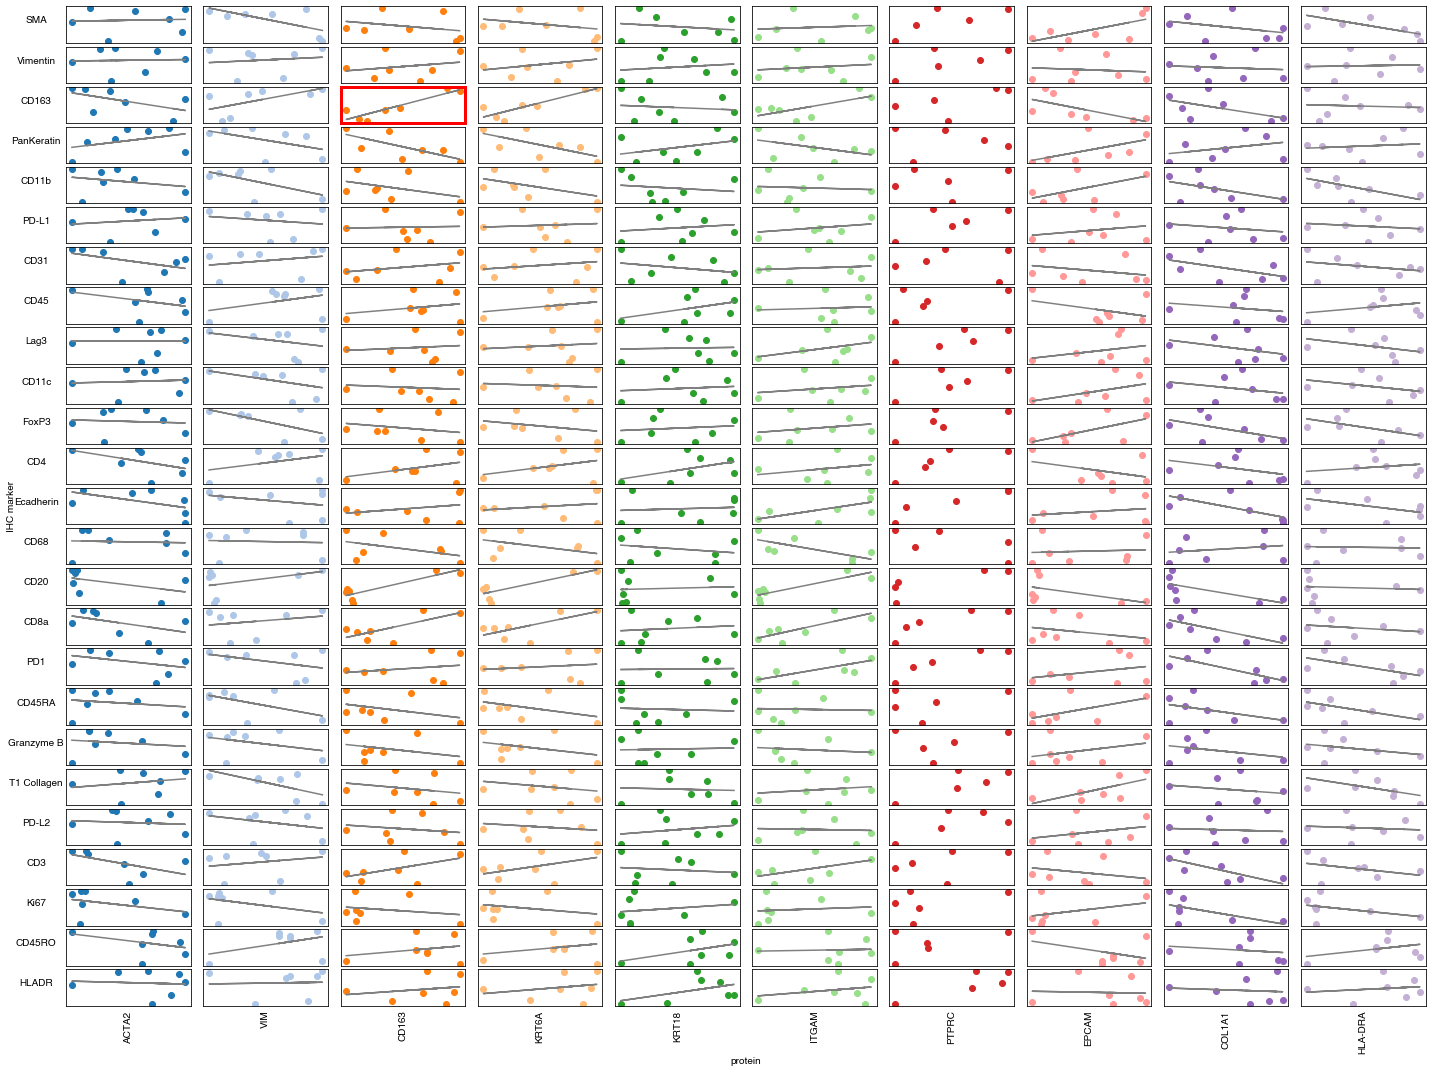

In [287]:
corr_dict = get_correlations(intensity_df, df, fdr=True)
mask = np.full((intensity_df.shape[1], df.shape[1]), False)
for i, c1 in enumerate(intensity_df.columns):
    for j, c2 in enumerate(df.columns):
        mask[i, j] = True if corr_dict[c1][c2][1] < .05 else False

fig, axs = plot_grouped_scatter(intensity_df, df, mask=mask)
fig.add_subplot(111, frameon=False)
plt.xlabel('protein', labelpad=50)
plt.ylabel('IHC marker', labelpad=50)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('figures/protein_correlation_with_imh_imaging.pdf')

###### single cell

In [365]:
df = pd.read_csv('/Users/erikstorrs/Downloads/Everything_merge_average_expression_orig.ident_cell_type_erik.tsv.gz',
                sep='\t')
df.columns = [c.replace('TWCE-', '') for c in df.columns]
df.columns = [re.sub(r'^(HT.+)\-S1(..).*1_(.+)$', r'\1-\2-\3', c) for c in df.columns]
df.columns = [c.replace('P-', 'P1-') for c in df.columns]
# df.columns = [c.replace('_R1', '_REMAIN') for c in df.columns]
# df = df[[c for c in sorted(set((adata.obs['sample_id']))) if c in df.columns]]
df = df.transpose()
df = df.loc[~df.index.duplicated(keep='first')]
df

OR4F5  AL627309.1  AL627309.3  \
HT056P1-PA-Macrophage                   0.0    0.003799         0.0   
HT056P1-PA-Fibroblast                   0.0    0.005089         0.0   
HT056P1-PA-CD8_T                        0.0    0.000000         0.0   
HT056P1-PA-Treg                         0.0    0.000000         0.0   
HT056P1-PA-Epithelial                   0.0    0.000000         0.0   
...                                     ...         ...         ...   
HT168P1-BC4-HT168P1-BC4_1_CD8_T         0.0    0.000000         0.0   
HT168P1-BC4-HT168P1-BC4_1_B             0.0    0.000000         0.0   
HT168P1-BC4-HT168P1-BC4_1_Mast          0.0    0.000000         0.0   
HT168P1-BC4-HT168P1-BC4_1_Epithelial    0.0    0.000000         0.0   
HT168P1-BC4-HT168P1-BC4_1_Acinar        0.0    0.000000         0.0   

                                      AL627309.4  AL669831.2  AL669831.5  \
HT056P1-PA-Macrophage                        0.0         0.0    0.018993   
HT056P1-PA-Fibroblast                        0.0         0.0    0.020356   
HT056P1-PA-CD8_T                             0.0         0.0    0.051378   
HT056P1-PA-Treg                              0.0         0.0    0.037801   
HT056P1-PA-Epithelial                        0.0         0.0    0.007194   
...                                          ...         ...         ...   
HT168P1-BC4-HT168P1-BC4_1_CD8_T              0.0         0.0    0.035714   
HT168P1-BC4-HT168P1-BC4_1_B                  0.0         0.0    0.095238   
HT168P1-BC4-HT168P1-BC4_1_Mast               0.0         0.0    0.000000   
HT168P1-BC4-HT168P1-BC4_1_Epithelial         0.0         0.0    0.142857   
HT168P1-BC4-HT168P1-BC4_1_Acinar             0.0         0.0    0.000000   

                                       FAM87B  LINC00115    FAM41C  \
HT056P1-PA-Macrophage                 0.00095   0.004748  0.010446   
HT056P1-PA-Fibroblast                 0.00000   0.012723  0.007634   
HT056P1-PA-CD8_T                      0.00000   0.002506  0.011278   
HT056P1-PA-Treg                       0.00000   0.006873  0.020619   
HT056P1-PA-Epithelial                 0.00000   0.000000  0.003597   
...                                       ...        ...       ...   
HT168P1-BC4-HT168P1-BC4_1_CD8_T       0.00000   0.011905  0.011905   
HT168P1-BC4-HT168P1-BC4_1_B           0.00000   0.000000  0.015873   
HT168P1-BC4-HT168P1-BC4_1_Mast        0.00000   0.000000  0.000000   
HT168P1-BC4-HT168P1-BC4_1_Epithelial  0.00000   0.000000  0.000000   
HT168P1-BC4-HT168P1-BC4_1_Acinar      0.00000   0.000000  0.000000   

                                      AL645608.7  ...  AL592183.1  AC007325.1  \
HT056P1-PA-Macrophage                        0.0  ...    0.008547         0.0   
HT056P1-PA-Fibroblast                        0.0  ...    0.002545         0.0   
HT056P1-PA-CD8_T                             0.0  ...    0.018797         0.0   
HT056P1-PA-Treg                              0.0  ...    0.024055         0.0   
HT056P1-PA-Epithelial                        0.0  ...    0.000000         0.0   
...                                          ...  ...         ...         ...   
HT168P1-BC4-HT168P1-BC4_1_CD8_T              0.0  ...    0.047619         0.0   
HT168P1-BC4-HT168P1-BC4_1_B                  0.0  ...    0.111111         0.0   
HT168P1-BC4-HT168P1-BC4_1_Mast               0.0  ...    0.400000         0.0   
HT168P1-BC4-HT168P1-BC4_1_Epithelial         0.0  ...    0.071429         0.0   
HT168P1-BC4-HT168P1-BC4_1_Acinar             0.0  ...    0.000000         0.0   

                                      AC007325.4  AC007325.2  AL354822.1  \
HT056P1-PA-Macrophage                   0.007597    0.000000    0.008547   
HT056P1-PA-Fibroblast                   0.010178    0.000000    0.040712   
HT056P1-PA-CD8_T                        0.020050    0.000000    0.017544   
HT056P1-PA-Treg                         0.003436    0.000000    0.010309   
HT056P1-PA-Epithelial                   0.010791    0.007194    0.003597   
..

In [366]:
sorted(df.index)

['HT056P1-PA-Acinar',
 'HT056P1-PA-B',
 'HT056P1-PA-CD8_T',
 'HT056P1-PA-DC',
 'HT056P1-PA-Endothelial',
 'HT056P1-PA-Epithelial',
 'HT056P1-PA-Erythrocyte',
 'HT056P1-PA-Fibroblast',
 'HT056P1-PA-Macrophage',
 'HT056P1-PA-NK',
 'HT056P1-PA-Plasma',
 'HT056P1-PA-T_Naive',
 'HT056P1-PA-Treg',
 'HT056P1-PA-Tuft',
 'HT056P1-PA-Tumor',
 'HT056P1-PA-Unknown',
 'HT056P1-PB-Acinar',
 'HT056P1-PB-B',
 'HT056P1-PB-CD8_T',
 'HT056P1-PB-DC',
 'HT056P1-PB-Endothelial',
 'HT056P1-PB-Epithelial',
 'HT056P1-PB-Erythrocyte',
 'HT056P1-PB-Fibroblast',
 'HT056P1-PB-Islet',
 'HT056P1-PB-Macrophage',
 'HT056P1-PB-NK',
 'HT056P1-PB-Plasma',
 'HT056P1-PB-T_Naive',
 'HT056P1-PB-Treg',
 'HT056P1-PB-Tuft',
 'HT056P1-PB-Tumor',
 'HT056P1-PB-Unknown',
 'HT056P1-R1-Acinar',
 'HT056P1-R1-B',
 'HT056P1-R1-CD8_T',
 'HT056P1-R1-DC',
 'HT056P1-R1-Endothelial',
 'HT056P1-R1-Epithelial',
 'HT056P1-R1-Erythrocyte',
 'HT056P1-R1-Fibroblast',
 'HT056P1-R1-Islet',
 'HT056P1-R1-Macrophage',
 'HT056P1-R1-NK',
 'HT056P1-R1-Pla

In [367]:
marker_map = {
 'SMA': ['ACTA2'],
 'Vimentin': ['VIM'],
 'CD163': ['CD163'],
 'PanKeratin': ['KRT18'],
 'CD11b': ['ITGAM'],
 'PD-L1': ['CD274'],
 'CD31': ['PECAM1'],
 'CD45': ['PTPRC'],
 'Lag3': ['LAG3'],
 'FoxP3': ['FOXP3'],
 'CD4': ['CD4'],
 'Ecadherin': ['CDH1'],
 'CD68': ['CD68'],
 'CD20': ['MS4A1'],
 'CD8a': ['CD8A'],
 'PD1': ['PDCD1'],
 'Granzyme B': ['GZMB'],
 'T1 Collagen': ['COL1A1'],
 'PD-L2': ['PDCD1LG2'],
 'CD3': ['CD3G'],
 'Ki67': ['MKI67'],
 'HLADR': ['HLA-DRA']
}
to_check = [v for k, vs in marker_map.items() for v in vs if v in df.columns]
df = df[to_check]
df

ACTA2        VIM     CD163  \
HT056P1-PA-Macrophage                  0.008547  23.808167  7.652422   
HT056P1-PA-Fibroblast                 10.692112  40.244275  0.038168   
HT056P1-PA-CD8_T                       0.125313  12.865915  0.065163   
HT056P1-PA-Treg                        0.226804   9.329897  0.068729   
HT056P1-PA-Epithelial                  0.104317  11.604317  0.104317   
...                                         ...        ...       ...   
HT168P1-BC4-HT168P1-BC4_1_CD8_T        0.226190  12.500000  0.000000   
HT168P1-BC4-HT168P1-BC4_1_B            0.063492   3.000000  0.000000   
HT168P1-BC4-HT168P1-BC4_1_Mast         0.200000  43.400000  0.000000   
HT168P1-BC4-HT168P1-BC4_1_Epithelial   0.214286   3.500000  0.000000   
HT168P1-BC4-HT168P1-BC4_1_Acinar       0.000000   2.000000  0.000000   

                                          KRT18     ITGAM     CD274    PECAM1  \
HT056P1-PA-Macrophage                  0.078822  0.739791  0.044634  0.603989   
HT056P1-PA-Fibroblast                  0.264631  0.012723  0.007634  0.007634   
HT056P1-PA-CD8_T                       0.129073  0.033835  0.028822  0.251880   
HT056P1-PA-Treg                        0.082474  0.109966  0.164948  0.048110   
HT056P1-PA-Epithelial                 13.169065  0.021583  0.000000  0.064748   
...                                         ...       ...       ...       ...   
HT168P1-BC4-HT168P1-BC4_1_CD8_T        0.023810  0.095238  0.000000  0.130952   
HT168P1-BC4-HT168P1-BC4_1_B            0.047619  0.015873  0.000000  0.111111   
HT168P1-BC4-HT168P1-BC4_1_Mast         0.000000  0.200000  0.000000  0.000000   
HT168P1-BC4-HT168P1-BC4_1_Epithelial  23.714286  0.000000  0.071429  0.000000   
HT168P1-BC4-HT168P1-BC4_1_Acinar       0.000000  0.000000  0.000000  0.000000   

                                         PTPRC      LAG3     FOXP3  ...  \
HT056P1-PA-Macrophage                 3.030389  0.127255  0.008547  ...   
HT056P1-PA-Fibroblast                 0.119593  0.053435  0.000000  ...   
HT056P1-PA-CD8_T                      8.208020  1.231830  0.041353  ...   
HT056P1-PA-Treg                       8.405498  0.539519  1.422680  ...   
HT056P1-PA-Epithelial                 0.352518  0.046763  0.003597  ...   
...                                        ...       ...       ...  ...   
HT168P1-BC4-HT168P1-BC4_1_CD8_T       5.773810  0.547619  0.000000  ...   
HT168P1-BC4-HT168P1-BC4_1_B           1.761905  0.015873  0.000000  ...   
HT168P1-BC4-HT168P1-BC4_1_Mast        0.600000  0.000000  0.000000  ...   
HT168P1-BC4-HT168P1-BC4_1_Epithelial  0.000000  0.000000  0.000000  ...   
HT168P1-BC4-HT168P1-BC4_1_Acinar      0.000000  0.000000  0.000000  ...   

                                          CD68     MS4A1      CD8A     PDCD1  \
HT056P1-PA-Macrophage                 5.176638  0.000950  0.034188  0.000950   
HT056P1-PA-Fibroblast                 0.226463  0.000000  0.022901  0.002545   
HT056P1-PA-CD8_T                      0.081454  0.006266  2.567669  0.308271   
HT056P1-PA-Treg                       0.130584  0.003436  0.089347  0.171821   
HT056P1-PA-Epithelial                 0.161871  0.000000  0.079137  0.003597   
...                                        ...       ...       ...       ...   
HT168P1-BC4-HT168P1-BC4_1_CD8_T       0.000000  0.083333  1.880952  0.202381   
HT168P1-BC4-HT168P1-BC4_1_B           0.079365  2.492063  0.000000  0.015873   
HT168P1-BC4-HT168P1-BC4_1_Mast        0.600000  0.000000  0.000000  0.000000   
HT168P1-BC4-HT168P1-BC4_1_Epithelial  0.071429  0.000000  0.000000  0.000000   
HT168P1-BC4-HT168P1-BC4_1_Acinar      0.000000  0.000000  0.000000  0.000000   

                                          GZMB     COL1A1  PDCD1LG2      CD3G  \
HT056P1-PA-Macrophage                 0.141500   0.282051  0.096866  0.066477   
HT056P1-PA-Fibroblast                 0.078880  81.188295  0.025445  0.040712   
HT056P1-PA-CD8_T                      6.249373   0.266917  0.002506  3.310777   
HT056P1-PA-Treg   

In [368]:
def transorm_cell_type(c):
    if 'CAF' in c: return 'Fibroblast'
    return c

In [369]:
intensity_df = adata.obs.copy()[['sample_id',
                          'cell_type',
                          'SMA',
 'Vimentin',
 'CD163',
 'PanKeratin',
 'CD11b',
 'PD-L1',
 'CD31',
 'CD45',
 'Lag3',
 'CD11c',
 'FoxP3',
 'CD4',
 'Ecadherin',
 'CD68',
 'CD20',
 'CD8a',
 'PD1',
 'CD45RA',
 'Granzyme B',
 'T1 Collagen',
 'PD-L2',
 'CD3',
 'Ki67',
 'CD45RO',
 'HLADR']]
intensity_df['sample_id'] = [s.replace('_', '-') for s in intensity_df['sample_id']]
intensity_df['sample_plus_cell_type'] = [f'{s}-{transorm_cell_type(c)}'
        for s, c in zip(intensity_df['sample_id'], intensity_df['cell_type'])]
intensity_df = intensity_df.groupby(by='sample_plus_cell_type').mean()
intensity_df

SMA  Vimentin     CD163  PanKeratin     CD11b  \
sample_plus_cell_type                                                         
HT055P1-PA-B             0.042186  0.034362  0.017757    0.003253  0.010546   
HT055P1-PA-CD4_T         0.046392  0.033384  0.015430    0.003497  0.010447   
HT055P1-PA-CD8_T         0.040970  0.031678  0.019535    0.003811  0.009911   
HT055P1-PA-Endothelial   0.075263  0.050821  0.013462    0.006274  0.014770   
HT055P1-PA-Fibroblast    0.072698  0.040682  0.012729    0.007737  0.014820   
...                           ...       ...       ...         ...       ...   
human-spleen-Macrophage  0.049403  0.025998  0.048777    0.012423  0.015079   
human-spleen-T           0.126935  0.059739  0.065464    0.022025  0.031143   
human-spleen-Treg        0.022067  0.015953  0.020202    0.003709  0.007113   
human-spleen-Tumor       0.005814  0.005502  0.007639    0.001361  0.004742   
human-spleen-unknown     0.025940  0.027963  0.041431    0.009763  0.015385   

                            PD-L1      CD31      CD45      Lag3     CD11c  \
sample_plus_cell_type                                                       
HT055P1-PA-B             0.007176  0.010569  0.034561  0.014927  0.018517   
HT055P1-PA-CD4_T         0.007085  0.008599  0.041415  0.009757  0.019086   
HT055P1-PA-CD8_T         0.007099  0.010336  0.035712  0.014648  0.018080   
HT055P1-PA-Endothelial   0.009750  0.039755  0.031045  0.019558  0.035541   
HT055P1-PA-Fibroblast    0.007975  0.009376  0.030754  0.011231  0.027376   
...                           ...       ...       ...       ...       ...   
human-spleen-Macrophage  0.010046  0.031440  0.034541  0.019299  0.018359   
human-spleen-T           0.023770  0.076770  0.142704  0.064569  0.050396   
human-spleen-Treg        0.005430  0.019633  0.039207  0.019407  0.010223   
human-spleen-Tumor       0.001621  0.006778  0.005251  0.003523  0.002409   
human-spleen-unknown     0.011861  0.038406  0.022753  0.023685  0.015113   

                         ...      CD8a       PD1    CD45RA  Granzyme B  \
sample_plus_cell_type    ...                                             
HT055P1-PA-B             ...  0.021218  0.004874  0.001561    0.025310   
HT055P1-PA-CD4_T         ...  0.013925  0.004733  0.001700    0.023847   
HT055P1-PA-CD8_T         ...  0.035960  0.004477  0.002134    0.023952   
HT055P1-PA-Endothelial   ...  0.016035  0.005236  0.002116    0.039413   
HT055P1-PA-Fibroblast    ...  0.013866  0.004198  0.001666    0.030553   
...                      ...       ...       ...       ...         ...   
human-spleen-Macrophage  ...  0.019220  0.007039  0.004355    0.045186   
human-spleen-T           ...  0.094231  0.014493  0.010066    0.129571   
human-spleen-Treg        ...  0.013148  0.005005  0.002582    0.031464   
human-spleen-Tumor       ...  0.007230  0.000718  0.000915    0.010663   
human-spleen-unknown     ...  0.038416  0.007236  0.003048    0.043355   

                         T1 Collagen     PD-L2       CD3      Ki67    CD45RO  \
sample_plus_cell_type                                                          
HT055P1-PA-B                0.054856  0.011053  0.028045  0.007660  0.033543   
HT055P1-PA-CD4_T            0.056613  0.010641  0.035992  0.006086  0.040595   
HT055P1-PA-CD8_T            0.052599  0.010583  0.031283  0.015467  0.034828   
HT055P1-PA-Endothelial      0.057676  0.012601  0.052486  0.009440  0.029645   
HT055P1-PA-Fibroblast       0.075467  0.011971  0.022605  0.007428  0.029581   
...                              ...       ...       ...       ...       ...   
human-spleen-Macrophage     0.037213  0.010230  0.046451  0.020717  0.031613   
human-spleen-T              0.042661  0.034742  0.136160  0.038124  0.135645   
human-spleen-Treg           0.011470  0.008380  0.043309  0.015565  0.037851   
human-spleen-Tumor          0.004328  0.001501  0.010358  0.002284  0.004376   
human-spleen-unknown        0.018822  0.010640  0.050675  0.009847  0.019369 

In [370]:
sorted(df.index)

['HT056P1-PA-Acinar',
 'HT056P1-PA-B',
 'HT056P1-PA-CD8_T',
 'HT056P1-PA-DC',
 'HT056P1-PA-Endothelial',
 'HT056P1-PA-Epithelial',
 'HT056P1-PA-Erythrocyte',
 'HT056P1-PA-Fibroblast',
 'HT056P1-PA-Macrophage',
 'HT056P1-PA-NK',
 'HT056P1-PA-Plasma',
 'HT056P1-PA-T_Naive',
 'HT056P1-PA-Treg',
 'HT056P1-PA-Tuft',
 'HT056P1-PA-Tumor',
 'HT056P1-PA-Unknown',
 'HT056P1-PB-Acinar',
 'HT056P1-PB-B',
 'HT056P1-PB-CD8_T',
 'HT056P1-PB-DC',
 'HT056P1-PB-Endothelial',
 'HT056P1-PB-Epithelial',
 'HT056P1-PB-Erythrocyte',
 'HT056P1-PB-Fibroblast',
 'HT056P1-PB-Islet',
 'HT056P1-PB-Macrophage',
 'HT056P1-PB-NK',
 'HT056P1-PB-Plasma',
 'HT056P1-PB-T_Naive',
 'HT056P1-PB-Treg',
 'HT056P1-PB-Tuft',
 'HT056P1-PB-Tumor',
 'HT056P1-PB-Unknown',
 'HT056P1-R1-Acinar',
 'HT056P1-R1-B',
 'HT056P1-R1-CD8_T',
 'HT056P1-R1-DC',
 'HT056P1-R1-Endothelial',
 'HT056P1-R1-Epithelial',
 'HT056P1-R1-Erythrocyte',
 'HT056P1-R1-Fibroblast',
 'HT056P1-R1-Islet',
 'HT056P1-R1-Macrophage',
 'HT056P1-R1-NK',
 'HT056P1-R1-Pla

In [357]:
[c for c in intensity_df.index if 'HT061' in c], [c for c in df.index if 'HT061' in c]

(['HT061P1-PA-B',
  'HT061P1-PA-CD4_T',
  'HT061P1-PA-CD8_T',
  'HT061P1-PA-Endothelial',
  'HT061P1-PA-Fibroblast',
  'HT061P1-PA-Macrophage',
  'HT061P1-PA-T',
  'HT061P1-PA-Treg',
  'HT061P1-PA-Tumor',
  'HT061P1-PA-unknown',
  'HT061P1-PB-B',
  'HT061P1-PB-CD4_T',
  'HT061P1-PB-CD8_T',
  'HT061P1-PB-Endothelial',
  'HT061P1-PB-Fibroblast',
  'HT061P1-PB-Macrophage',
  'HT061P1-PB-T',
  'HT061P1-PB-Treg',
  'HT061P1-PB-Tumor',
  'HT061P1-PB-unknown',
  'HT061P1-PC-CD4_T',
  'HT061P1-PC-CD8_T',
  'HT061P1-PC-Endothelial',
  'HT061P1-PC-Fibroblast',
  'HT061P1-PC-Macrophage',
  'HT061P1-PC-T',
  'HT061P1-PC-Treg',
  'HT061P1-PC-Tumor',
  'HT061P1-PC-unknown'],
 ['HT061P1-PA-B',
  'HT061P1-PA-CD4_T',
  'HT061P1-PA-CD8_T',
  'HT061P1-PA-Endothelial',
  'HT061P1-PA-Macrophage',
  'HT061P1-PA-Treg',
  'HT061P1-PA-Tumor',
  'HT061P1-PB-CD4_T',
  'HT061P1-PB-CD8_T',
  'HT061P1-PB-Endothelial',
  'HT061P1-PB-Macrophage',
  'HT061P1-PB-Treg',
  'HT061P1-PB-Tumor',
  'HT061P1-PC-CD4_T',
  'HT0

In [371]:
samples = sorted(set(df.index).intersection(set(intensity_df.index)))
df = df.loc[samples]
intensity_df = intensity_df.loc[samples]

samples

['HT056P1-PA-B',
 'HT056P1-PA-CD8_T',
 'HT056P1-PA-Endothelial',
 'HT056P1-PA-Fibroblast',
 'HT056P1-PA-Macrophage',
 'HT056P1-PA-Treg',
 'HT056P1-PA-Tumor',
 'HT056P1-PB-B',
 'HT056P1-PB-CD8_T',
 'HT056P1-PB-Endothelial',
 'HT056P1-PB-Fibroblast',
 'HT056P1-PB-Macrophage',
 'HT056P1-PB-Treg',
 'HT056P1-PB-Tumor',
 'HT060P1-PA-B',
 'HT060P1-PA-CD4_T',
 'HT060P1-PA-CD8_T',
 'HT060P1-PA-Endothelial',
 'HT060P1-PA-Fibroblast',
 'HT060P1-PA-Macrophage',
 'HT060P1-PA-Treg',
 'HT060P1-PA-Tumor',
 'HT060P1-PB-B',
 'HT060P1-PB-CD4_T',
 'HT060P1-PB-CD8_T',
 'HT060P1-PB-Endothelial',
 'HT060P1-PB-Fibroblast',
 'HT060P1-PB-Macrophage',
 'HT060P1-PB-Treg',
 'HT060P1-PB-Tumor',
 'HT061P1-PA-B',
 'HT061P1-PA-CD4_T',
 'HT061P1-PA-CD8_T',
 'HT061P1-PA-Endothelial',
 'HT061P1-PA-Fibroblast',
 'HT061P1-PA-Macrophage',
 'HT061P1-PA-Treg',
 'HT061P1-PA-Tumor',
 'HT061P1-PB-CD4_T',
 'HT061P1-PB-CD8_T',
 'HT061P1-PB-Endothelial',
 'HT061P1-PB-Fibroblast',
 'HT061P1-PB-Macrophage',
 'HT061P1-PB-Treg',
 'HT06

In [372]:
df.shape, intensity_df.shape

((52, 22), (52, 25))

In [373]:
from sklearn.neighbors import LocalOutlierFactor

/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


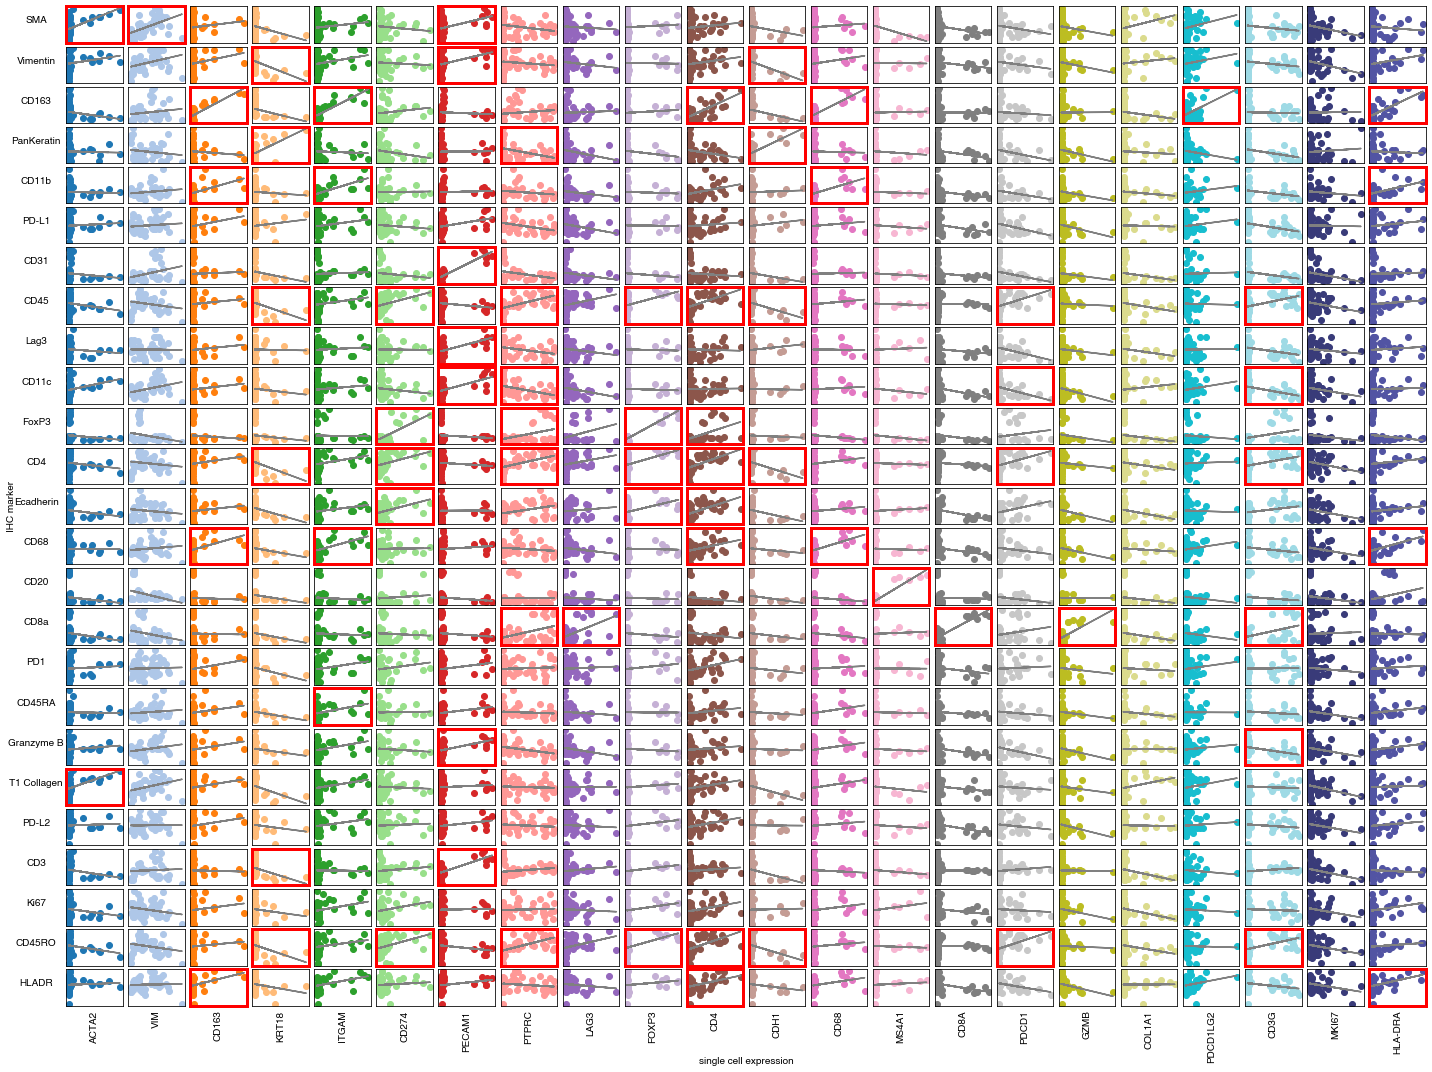

In [389]:
corr_dict = get_correlations(intensity_df, df, fdr=True)
mask = np.full((intensity_df.shape[1], df.shape[1]), False)
for i, c1 in enumerate(intensity_df.columns):
    for j, c2 in enumerate(df.columns):
        mask[i, j] = True if corr_dict[c1][c2][1] < .05 else False

fig, axs = plot_grouped_scatter(intensity_df, df, mask=mask, remove_outliers=False)
fig.add_subplot(111, frameon=False)
plt.xlabel('single cell expression', labelpad=50)
plt.ylabel('IHC marker', labelpad=50)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('figures/single_cell_correlation_with_imh_imaging.pdf')

In [375]:
# cell_types = sorted(set([c.split('-')[-1] for c in intensity_df.index]))
# for cell_type in cell_types:
#     print(cell_type)
#     df1 = intensity_df.loc[[x for x in intensity_df.index if cell_type in x.split('-')[-1]]]
#     df2 = df.loc[[x for x in df.index if cell_type in x.split('-')[-1]]]
#     corr_dict = get_correlations(df1, df2, fdr=True)
#     mask = np.full((df1.shape[1], df2.shape[1]), False)
#     for i, c1 in enumerate(df1.columns):
#         for j, c2 in enumerate(df2.columns):
#             mask[i, j] = True if corr_dict[c1][c2][1] < .05 else False

#     fig, axs = plot_grouped_scatter(df1, df2, mask=mask, remove_outliers=False)
#     fig.add_subplot(111, frameon=False)
#     plt.xlabel('single cell expression', labelpad=50)
#     plt.ylabel('IHC marker', labelpad=50)
#     plt.xticks([])
#     plt.yticks([])
#     plt.tight_layout()
#     plt.show()


In [305]:
sorted(set(adata.obs['cell_type']))

['B',
 'CD4_T',
 'CD8_T',
 'Endothelial',
 'Macrophage',
 'T',
 'Treg',
 'Tumor',
 'apCAF',
 'myCAF',
 'otherCAF',
 'unknown']

In [376]:
cell_to_markers = {
    'B': {
        'IHC': ['CD20'],
        'expression': ['MS4A1']
    },
    'CD4_T': {
        'IHC': ['CD3', 'CD4'],
        'expression': ['CD3G', 'CD4']
    },
    'CD_8': {
        'IHC': ['CD8a', 'Granzyme B'],
        'expression': ['CD3G', 'CD8A', 'GZMB']
    },
    'Endothelial': {
        'IHC': ['CD31'],
        'expression': ['PECAM1']
    },
    'Macrophage': {
        'IHC': ['CD11b', 'CD68', 'CD163'],
        'expression': ['ITGAM', 'CD68', 'CD163']
    },
    'T': {
        'IHC': ['CD3'],
        'expression': ['CD3G']
    },
    'Treg': {
        'IHC': ['FoxP3'],
        'expression': ['FOXP3']
    },
    'Tumor': {
        'IHC': ['PanKeratin', 'Ecadherin'],
        'expression': ['KRT18', 'CDH1']
    },
    'Fibroblast': {
        'IHC': ['SMA', 'Vimentin', 'T1 Collagen', 'HLADR'],
        'expression': ['ACTA2', 'HLA-DRA', 'VIM', 'COL1A1']
    },
}

B


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


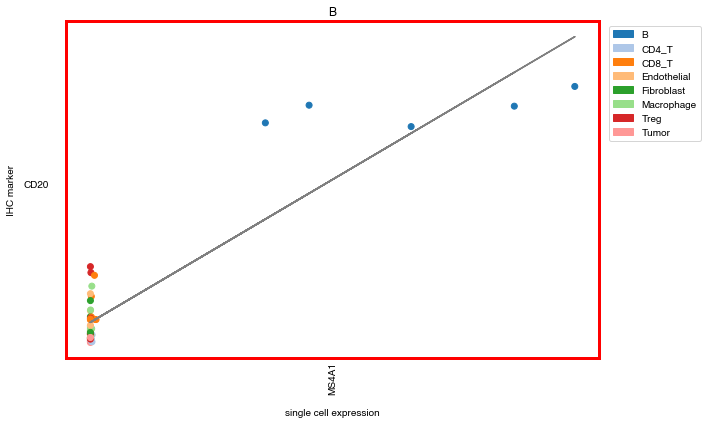

CD4_T


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


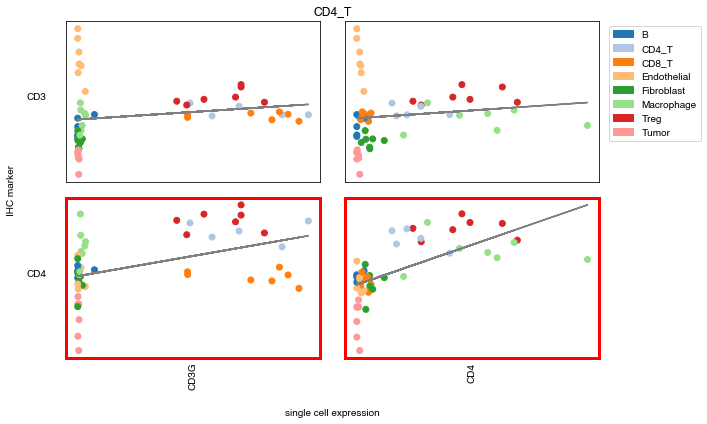

CD_8


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


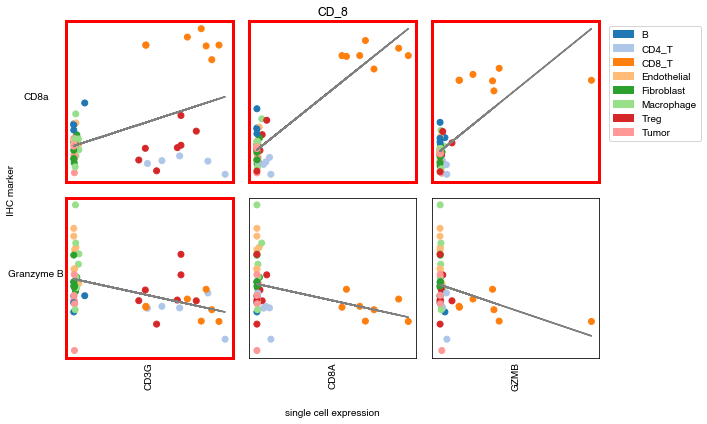

Endothelial


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


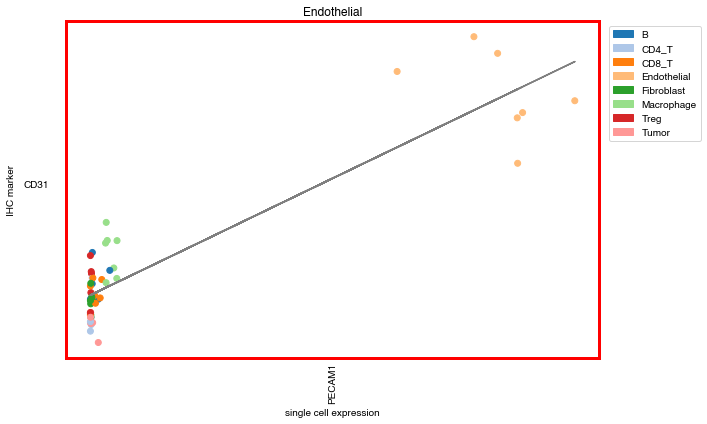

Macrophage


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


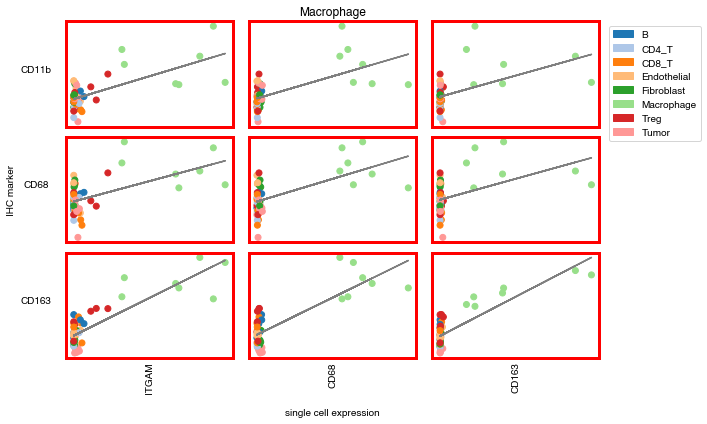

T


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


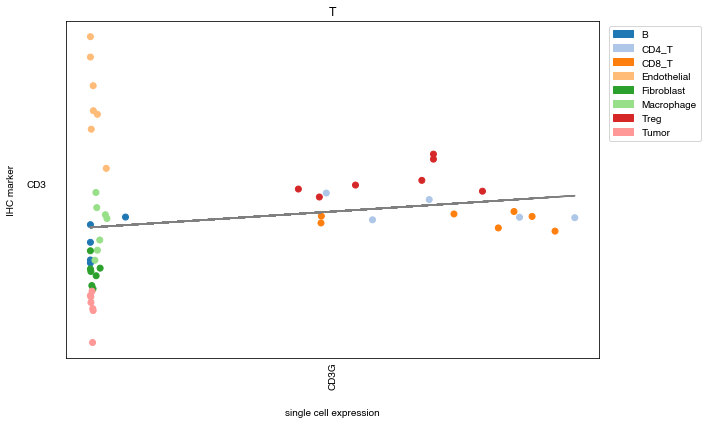

Treg


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


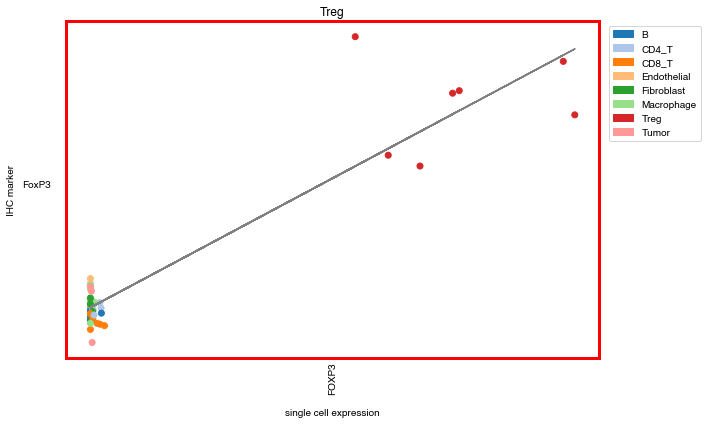

Tumor


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


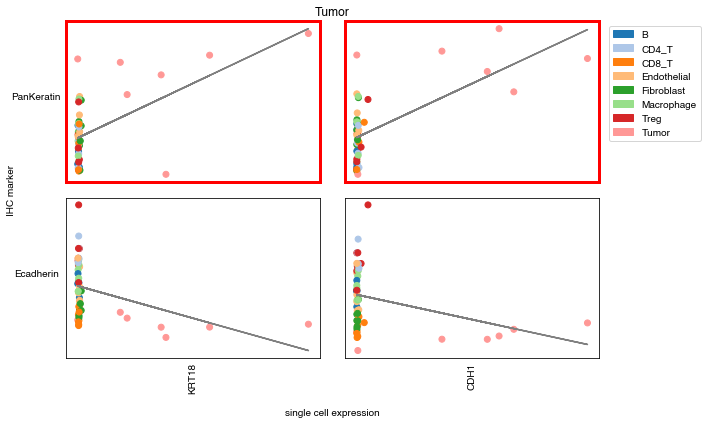

Fibroblast


/Users/erikstorrs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


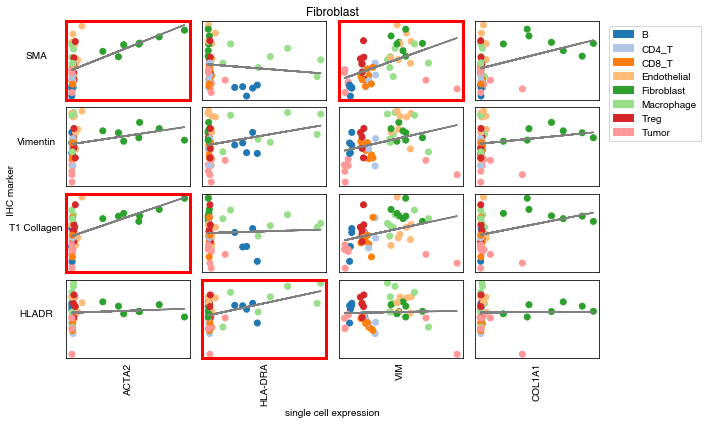

In [390]:
for cell_type, d in cell_to_markers.items():
    print(cell_type)
    df1 = intensity_df[d['IHC']]
    df2 = df[d['expression']]
    
    mask = np.full((df1.shape[1], df2.shape[1]), False)
    for i, c1 in enumerate(df1.columns):
        for j, c2 in enumerate(df2.columns):
            mask[i, j] = True if corr_dict[c1][c2][1] < .05 else False
            
            
    fig, axs, patches = plot_grouped_scatter_by_celltype(df1, df2, [x.split('-')[-1] for x in df1.index],
                                                mask=mask, remove_outliers=False, figsize=(10, 6))
    fig.add_subplot(111, frameon=False)
    plt.title(cell_type)
    plt.xlabel('single cell expression', labelpad=50)
    plt.ylabel('IHC marker', labelpad=50)
    plt.xticks([])
    plt.yticks([])
    plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.2, 1.))
    plt.tight_layout()
    plt.savefig(f'figures/single_cell_correlation_with_imh_imaging_{cell_type}.pdf')
    plt.show()

###### export data

In [294]:
adata.obs[['image_id', 'PanKeratin']].groupby('image_id').sum()

PanKeratin
image_id                             
HT055P1_PA_A1_A4_ROI_01      1.721641
HT055P1_PA_A1_A4_ROI_02     25.465428
HT055P1_PA_A1_A4_ROI_03      3.729011
HT055P1_PA_A1_A4_ROI_04     11.038079
HT055P1_PA_A1_A4_ROI_05     19.599423
...                               ...
HT081B1_H5_A4_ROI_03         2.474639
HT081B1_H5_A4_ROI_04        15.390483
human_spleen_HT093_ROI_01    0.224900
human_spleen_HT093_ROI_02    3.362695
human_spleen_HT093_ROI_03    6.443377

[76 rows x 1 columns]

In [24]:
## add intensity back in
df = pd.DataFrame(data=adata.raw.X, columns=adata.var.index, index=adata.obs.index)
adata.obs = pd.merge(adata.obs, df, left_index=True, right_index=True)
adata.obs

image_id     sample_id  \
index                                                                    
HT055P1_PA_A1_A4_ROI_01_1        HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_11       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_23       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_25       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
HT055P1_PA_A1_A4_ROI_01_27       HT055P1_PA_A1_A4_ROI_01    HT055P1_PA   
...                                                  ...           ...   
human_spleen_HT093_ROI_03_926  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_927  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_937  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_942  human_spleen_HT093_ROI_03  human_spleen   
human_spleen_HT093_ROI_03_944  human_spleen_HT093_ROI_03  human_spleen   

                               case_id  roi  Cell Area (µm²) community  \
index                                                                    
HT055P1_PA_A1_A4_ROI_01_1      HT055P1    1            35.75        13   
HT055P1_PA_A1_A4_ROI_01_11     HT055P1    1            51.25        20   
HT055P1_PA_A1_A4_ROI_01_23     HT055P1    1           109.00         5   
HT055P1_PA_A1_A4_ROI_01_25     HT055P1    1            28.50         0   
HT055P1_PA_A1_A4_ROI_01_27     HT055P1    1            44.00         0   
...                                ...  ...              ...       ...   
human_spleen_HT093_ROI_03_926    human    3            82.25        26   
human_spleen_HT093_ROI_03_927    human    3           124.25        26   
human_spleen_HT093_ROI_03_937    human    3            96.50         5   
human_spleen_HT093_ROI_03_942    human    3            42.25        26   
human_spleen_HT093_ROI_03_944    human    3            32.75         1   

                                cell_type_specific caf_subtype   cell_type  \
index                                                                        
HT055P1_PA_A1_A4_ROI_01_1      monocyte/macrophage         nan  Macrophage   
HT055P1_PA_A1_A4_ROI_01_11                    treg         nan        Treg   
HT055P1_PA_A1_A4_ROI_01_23     monocyte/macrophage         nan  Macrophage   
HT055P1_PA_A1_A4_ROI_01_25                     CAF       myCAF       myCAF   
HT055P1_PA_A1_A4_ROI_01_27                     CAF       myCAF       myCAF   
...                                            ...         ...         ...   
human_spleen_HT093_ROI_03_926              unknown         nan     unknown   
human_spleen_HT093_ROI_03_927              unknown         nan     unknown   
human_spleen_HT093_ROI_03_937  monocyte/macrophage         nan  Macrophage   
human_spleen_HT093_ROI_03_942              unknown         nan     unknown   
human_spleen_HT093_ROI_03_944  monocyte/macrophage         nan  Macrophage   

                               XMin  ...      CD8a       PD1    CD45RA  \
index                                ...                                 
HT055P1_PA_A1_A4_ROI_01_1        42  ...  0.018418  0.004006  0.002377   
HT055P1_PA_A1_A4_ROI_01_11      222  ...  0.008161  0.008338  0.002227   
HT055P1_PA_A1_A4_ROI_01_23       90  ...  0.004266  0.001616  0.000955   
HT055P1_PA_A1_A4_ROI_01_25      300  ...  0.019962  0.005336  0.000000   
HT055P1_PA_A1_A4_ROI_01_27      306  ...  0.013362  0.006118  0.000000   
...                             ...  ...       ...       ...       ...   
human_spleen_HT093_ROI_03_926    67  ...  0.030876  0.001925  0.002477   
human_spleen_HT093_ROI_03_927   221  ...  0.021873  0.002342  0.002026   
human_spleen_HT093_ROI_03_937   183  ...  0.005991  0.000674  0.001834   
human_spleen_HT093_ROI_03_942   101  ...  0.099802  0.013212  0.010832   
human_spleen_HT093_ROI_03_944   109  ...  0.056133  0.006951  0.006082   

                               Granzyme B  T1 Collagen     PD-L2       CD3  \
index                                                             

In [177]:
adata.obs.to_csv('/Users/erikstorrs/Downloads/pdac_halo_cell_types.tsv', sep='\t',
                index=True, header=True)

In [ ]:
adata.obs

In [ ]:
# adata.obs = adata.obs[[c for c in adata.obs.columns if '_y' != c[-2:]]]
# adata.obs.columns = [c[:-2] if '_x' == c[-2:] else c for c in adata.obs.columns]
# adata.obs = adata.obs[[c for c in adata.obs.columns if '_y' != c[-2:]]]
# ls = ['nearest_b_cell',
#  'nearest_b_cell_distance',
#  'nearest_caf',
#  'nearest_caf_distance',
#  'nearest_cd4_t_cell',
#  'nearest_cd4_t_cell_distance',
#  'nearest_cd8_t_cell',
#  'nearest_cd8_t_cell_distance',
#  'nearest_endothelial',
#  'nearest_endothelial_distance',
#  'nearest_lag3+',
#  'nearest_lag3+_distance',
#  'nearest_monocyte/macrophage',
#  'nearest_monocyte/macrophage_distance',
#  'nearest_monocyte/macrophage_ki67+',
#  'nearest_monocyte/macrophage_ki67+_distance',
#  'nearest_pd1+',
#  'nearest_pd1+_distance',
#  'nearest_treg',
#  'nearest_treg_distance',
#  'nearest_tumor',
#  'nearest_tumor_distance',
#  'nearest_tumor_ki67+',
#  'nearest_tumor_ki67+_distance',
#  'nearest_tumor_pdl1+',
#  'nearest_tumor_pdl1+_distance',
#  'nearest_unknown_x',
#  'nearest_unknown_distance_x']
# adata.obs = adata.obs[[c for c in adata.obs.columns if c not in ls]]
adata.obs

In [ ]:
list(adata.obs.columns)